In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import gseapy as gp
import os

In [28]:
# Load the correlation results

df_modules = pd.read_csv("Correlation_results\\module_correlations_leiden_maxsize1000.csv")
df_modules['cluster_l'] = df_modules['cluster'].apply(lambda x: ast.literal_eval(x))

# Filter by Leiden resolution parameter to keep only values between 0.5 and 1 (assuming there's a column named 'resolution')
#df_modules = df_modules[(df_modules['resolution'] >= 0.5) & (df_modules['resolution'] <= 1.0)]


In [29]:
df_modules.sort_values('correlation', ascending=False).head(15)

cluster  cluster size  \
8471  ['ENSG00000121903.15', 'ENSG00000198860.14', '...           941   
9106  ['ENSG00000121903.15', 'ENSG00000162733.19', '...           807   
8406  ['ENSG00000121903.15', 'ENSG00000162733.19', '...           807   
6667  ['ENSG00000121903.15', 'ENSG00000000971.17', '...           830   
7532  ['ENSG00000121903.15', 'ENSG00000000971.17', '...           830   
7102  ['ENSG00000121903.15', 'ENSG00000000971.17', '...           994   
7294  ['ENSG00000121903.15', 'ENSG00000000971.17', '...           849   
8290  ['ENSG00000121903.15', 'ENSG00000000971.17', '...           855   
9924  ['ENSG00000121903.15', 'ENSG00000175387.16', '...           905   
87    ['ENSG00000121903.15', 'ENSG00000198860.14', '...           963   
1915  ['ENSG00000121903.15', 'ENSG00000198860.14', '...          1000   
9812  ['ENSG00000121903.15', 'ENSG00000175387.16', '...           882   
7450  ['ENSG00000121903.15', 'ENSG00000000971.17', '...           892   
8160  ['ENSG00000121903.15', 'ENSG00000000971.17', '...           892   
3488  ['ENSG00000121903.15', 'ENSG00000198860.14', '...           980   

      resolution              network             method  correlation  \
8471       0.005       modified_knn_5    leiden_weighted     0.180975   
9106       0.001   modified_knn_5_pos    leiden_weighted     0.180398   
8406       0.001       modified_knn_5    leiden_weighted     0.180398   
6667       0.001       modified_knn_4    leiden_weighted     0.180190   
7532       0.001   modified_knn_4_pos    leiden_weighted     0.180190   
7102       0.500       modified_knn_4  leiden_unweighted     0.178425   
7294      20.000       modified_knn_4    leiden_weighted     0.177885   
8290      50.000   modified_knn_4_pos  leiden_unweighted     0.177059   
9924       0.010       modified_knn_6    leiden_weighted     0.176991   
87         0.005      modified_knn_10  leiden_unweighted     0.176757   
1915       1.000  modified_knn_11_pos    leiden_weighted     0.176672   
9812       0.001       modified_knn_6    leiden_weighted     0.176141   
7450     100.000       modified_knn_4    leiden_weighted     0.175923   
8160      20.000   modified_knn_4_pos    leiden_weighted     0.175923   
3488       0.010      modified_knn_13    leiden_weighted     0.175638   

                                              cluster_l  
8471  [ENSG00000121903.15, ENSG00000198860.14, ENSG0...  
9106  [ENSG00000121903.15, ENSG00000162733.19, ENSG0...  
8406  [ENSG00000121903.15, ENSG00000162733.19, ENSG0...  
6667  [ENSG00000121903.15, ENSG00000000971.17, ENSG0...  
7532  [ENSG00000121903.15, ENSG00000000971.17, ENSG0...  
7102  [ENSG00000121903.15, ENSG00000000971.17, ENSG0...  
7294  [ENSG00000121903.15, ENSG00000000971.17, ENSG0...  
8290  [ENSG00000121903.15, ENSG00000000971.17, ENSG0...  
9924  [ENSG00000121903.15, ENSG00000175387.16, ENSG0...  
87    [ENSG00000121903.15, ENSG00000198860.14, ENSG0...  
1915  [ENSG00000121903.15, ENSG00000198860.14, ENSG0...  
9812  [ENSG00000121903.15, ENSG00000175387.16, ENSG0...  
7450  [ENSG00000121903.15, ENSG00000000971.17, ENSG0...  
8160  [ENSG00000121903.15, ENSG00000000971.17, ENSG0...  
3488  [ENSG00000121903.15, ENSG00000198860.14, ENSG0...

In [30]:

# Filter by cluster size to keep only values between 30 and 1000 
#df_modules = df_modules[(df_modules['cluster size'] >= 30) & (df_modules['cluster size'] <= 1000)]

# Sort modules descending according to largest correlation and get the top 10 modules
df_modules = df_modules.sort_values('correlation', ascending=False).head(1)

In [31]:
df_modules.sort_values('correlation', ascending=False).head()

cluster  cluster size  \
8471  ['ENSG00000121903.15', 'ENSG00000198860.14', '...           941   

      resolution         network           method  correlation  \
8471       0.005  modified_knn_5  leiden_weighted     0.180975   

                                              cluster_l  
8471  [ENSG00000121903.15, ENSG00000198860.14, ENSG0...

In [32]:
print(df_modules[['correlation']])



      correlation
8471     0.180975


In [26]:
#get the merged list of all genes in the top clusters
top_genes = df_modules['cluster_l']
unique_gene_list = list(set(item for sublist in top_genes for item in sublist))

# Load annotation file
annotation_df = pd.read_csv('KBASE_datashare\\Normalization\\gene_annotation.cqn_tbl_total.24736_1140.csv')

#covert gene ids to gene names
list_gene_names=[]
for g in unique_gene_list:
    gene_name=annotation_df[annotation_df['Geneid']==g]['gene_name'].iloc[0]
    if gene_name not in list_gene_names: list_gene_names.append(gene_name)

print(f"Number of top modules selected: {len(df_modules)}")
print(f"Number of unique genes: {len(unique_gene_list)}")
print(f"Number of unique gene names: {len(list_gene_names)}")



Number of top modules selected: 1
Number of unique genes: 941
Number of unique gene names: 941


In [ ]:
# Perform enrichment analysis
output_dir = f"enrichr_results/top_1_module_sizemax1000"

enrichr_kegg = gp.enrichr(
    gene_list=list_gene_names,
    gene_sets="KEGG_2019_Human",
    organism="Human",
    outdir=output_dir
)

enrichr_go_bp = gp.enrichr(
    gene_list=list_gene_names,
    gene_sets="GO_Biological_Process_2021",
    organism="Human",
    outdir=output_dir
)

In [ ]:
# We do KEGG and GO for each of the 10 modules separately. 
for i, row in df_modules.iterrows():
    module_id = f"module_{i}"
    module_genes = row['cluster_l']  # Get gene list for the module

    # Convert gene IDs to gene names
    module_gene_names = list(set(annotation_df[annotation_df['Geneid'].isin(module_genes)]['gene_name']))

    # Create module-specific output directory
    module_output_dir = os.path.join(output_dir, module_id)
    os.makedirs(output_dir, exist_ok=True)

    # Perform enrichment analysis for KEGG
    gp.enrichr(
        gene_list=module_gene_names,
        gene_sets="KEGG_2019_Human",
        organism="Human",
        outdir=module_output_dir
    )

    # Perform enrichment analysis for GO Biological Process
    gp.enrichr(
        gene_list=module_gene_names,
        gene_sets="GO_Biological_Process_2021",
        organism="Human",
        outdir=module_output_dir
    )

    print(f"Enrichment analysis completed for {module_id}: {len(module_gene_names)} genes")

print("Enrichment analysis for all modules completed!")


Enrichment analysis completed for module_26341: 848 genes
Enrichment analysis completed for module_99084: 858 genes
Enrichment analysis completed for module_8766: 787 genes
Enrichment analysis completed for module_99020: 865 genes
Enrichment analysis completed for module_77717: 793 genes
Enrichment analysis completed for module_4636: 799 genes
Enrichment analysis completed for module_51847: 799 genes
Enrichment analysis completed for module_13330: 889 genes
Enrichment analysis completed for module_8720: 817 genes
Enrichment analysis completed for module_26392: 792 genes
Enrichment analysis for all modules completed!


Fatemeh's code starts here:

In [ ]:
corr_thresh=0.18

In [ ]:
#load the correlation results
df_modules=pd.read_csv('/Users/fsfatemi/local_AD/Correlation_results/module_correlations_leiden_all.csv')
df_modules=df_modules.sort_values('correlation',ascending=False)
df_modules['cluster_l']=df_modules['cluster'].apply(lambda x: ast.literal_eval(x))

#get the clusters with correlations more than 0.18 (this 0.18 is arbitrary and can be changed)
top_genes=df_modules[df_modules['correlation']>0.18]['cluster_l']

In [ ]:
#get the merged list of all genes in the top clusters
unique_gene_list = list(set(item for sublist in top_genes for item in sublist))
len(unique_gene_list)

1503

In [ ]:
#load the annotation file
annotation_df=pd.read_csv('/Users/fsfatemi/local_AD/KBASE_datashare/Normalization/gene_annotation.cqn_tbl_total.24736_1140.csv')
annotation_df.head()

In [ ]:
#covert gene ids to gene names
list_gene_names=[]
for g in unique_gene_list:
    gene_name=annotation_df[annotation_df['Geneid']==g]['gene_name'].iloc[0]
    if gene_name not in list_gene_names: list_gene_names.append(gene_name)

len(list_gene_names)


1503

In [ ]:
#run the GO enrichment analysis
import gseapy as gp

In [ ]:
enrichr_results = gp.enrichr(
gene_list=list_gene_names,                        
gene_sets="KEGG_2019_Human",    
organism="Human",                          
outdir=f"enrichr_results/clusters_with_corr_thresh_{corr_thresh}_number_of_genes_{len(list_gene_names)}",                  
)

In [ ]:
enrichr_results = gp.enrichr(
gene_list=list_gene_names,                        
gene_sets="GO_Biological_Process_2021",    
organism="Human",                          
outdir=f"enrichr_results/clusters_with_corr_thresh_{corr_thresh}_number_of_genes_{len(list_gene_names)}",                  
)

Heatmaps

In [44]:
df_modules=pd.read_csv('Correlation_results\\module_correlations_leiden_all.csv')
df_modules=df_modules.sort_values('correlation',ascending=False)
df_modules['cluster_l']=df_modules['cluster'].apply(lambda x: ast.literal_eval(x))

In [37]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Extract k
df_modules['k'] = df_modules['network'].str.extract(r'knn_(\d+)', expand=False).astype(int)

In [38]:
# Filter for k = 4 and resolution = 0.1
subset = df_modules[(df_modules['k'] == 4) 
                    & (df_modules['resolution'] == 0.1) 
                    & (df_modules['network']=='knn_4')
                    & (df_modules['method']=='leiden_weighted')].copy()
subset

cluster  cluster size  \
8702  ['ENSG00000256660.7', 'ENSG00000172322.14', 'E...             4   
8694  ['ENSG00000000971.17', 'ENSG00000001460.18', '...          7578   
8700  ['ENSG00000111215.12', 'ENSG00000212128.2', 'E...            16   
8706  ['ENSG00000187080.10', 'ENSG00000197454.2', 'E...             4   
8697  ['ENSG00000185271.9', 'ENSG00000196220.17', 'E...           188   
8693  ['ENSG00000000419.14', 'ENSG00000000457.14', '...          4217   
8704  ['ENSG00000170667.16', 'ENSG00000168255.20', '...             6   
8701  ['ENSG00000163293.12', 'ENSG00000198515.16', '...             4   
8705  ['ENSG00000228696.11', 'ENSG00000185829.19', '...             4   
8703  ['ENSG00000240184.7', 'ENSG00000167914.12', 'E...            11   
8699  ['ENSG00000173391.9', 'ENSG00000050628.21', 'E...            76   
8707  ['ENSG00000253731.3', 'ENSG00000253767.3', 'EN...             8   
8695  ['ENSG00000140534.14', 'ENSG00000101773.19', '...           861   
8696  ['ENSG00000075275.18', 'ENSG00000151490.15', '...           396   
8698  ['ENSG00000049323.16', 'ENSG00000127824.15', '...           230   

      resolution network           method  correlation  \
8702         0.1   knn_4  leiden_weighted     0.099437   
8694         0.1   knn_4  leiden_weighted     0.057398   
8700         0.1   knn_4  leiden_weighted     0.034514   
8706         0.1   knn_4  leiden_weighted     0.030484   
8697         0.1   knn_4  leiden_weighted     0.000241   
8693         0.1   knn_4  leiden_weighted    -0.008206   
8704         0.1   knn_4  leiden_weighted    -0.008659   
8701         0.1   knn_4  leiden_weighted    -0.013353   
8705         0.1   knn_4  leiden_weighted    -0.034407   
8703         0.1   knn_4  leiden_weighted    -0.038203   
8699         0.1   knn_4  leiden_weighted    -0.060724   
8707         0.1   knn_4  leiden_weighted    -0.063612   
8695         0.1   knn_4  leiden_weighted    -0.065230   
8696         0.1   knn_4  leiden_weighted    -0.071802   
8698         0.1   knn_4  leiden_weighted    -0.095665   

                                              cluster_l  k  
8702  [ENSG00000256660.7, ENSG00000172322.14, ENSG00...  4  
8694  [ENSG00000000971.17, ENSG00000001460.18, ENSG0...  4  
8700  [ENSG00000111215.12, ENSG00000212128.2, ENSG00...  4  
8706  [ENSG00000187080.10, ENSG00000197454.2, ENSG00...  4  
8697  [ENSG00000185271.9, ENSG00000196220.17, ENSG00...  4  
8693  [ENSG00000000419.14, ENSG00000000457.14, ENSG0...  4  
8704  [ENSG00000170667.16, ENSG00000168255.20, ENSG0...  4  
8701  [ENSG00000163293.12, ENSG00000198515.16, ENSG0...  4  
8705  [ENSG00000228696.11, ENSG00000185829.19, ENSG0...  4  
8703  [ENSG00000240184.7, ENSG00000167914.12, ENSG00...  4  
8699  [ENSG00000173391.9, ENSG00000050628.21, ENSG00...  4  
8707  [ENSG00000253731.3, ENSG00000253767.3, ENSG000...  4  
8695  [ENSG00000140534.14, ENSG00000101773.19, ENSG0...  4  
8696  [ENSG00000075275.18, ENSG00000151490.15, ENSG0...  4  
8698  [ENSG00000049323.16, ENSG00000127824.15, ENSG0...  4

In [39]:

# Reset index and assign module labels
subset = subset.reset_index(drop=True)
subset['module_name'] = ['M' + str(i + 1) for i in range(len(subset))]
subset['module_label'] = subset['module_name'] + ', res=0.1'

# Create DataFrame for heatmap
plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)


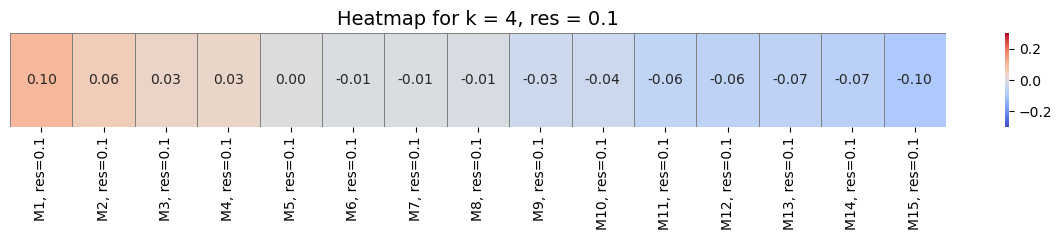

In [40]:

# Plot
plt.figure(figsize=(12, 2.5))
sns.heatmap(plot_df,
            cmap='coolwarm',
            cbar=True,
            vmin=-0.3, vmax=0.3,
            linewidths=0.5,
            linecolor='gray',
            annot=True,
            fmt=".2f")

plt.title('Heatmap for k = 4, res = 0.1', fontsize=14)
plt.yticks([])  # Hide y-axis ticks
plt.xticks(rotation=90)
plt.xlabel('')
plt.tight_layout()
plt.show()


In [41]:
# Filter for k = 4 and resolution = 0.1
subset = df_modules[(df_modules['k'] == 10) 
                    & (df_modules['resolution'] == 20) 
                    & (df_modules['network']=='knn_10')
                    & (df_modules['method']=='leiden_unweighted')].copy()

subset

cluster  cluster size  \
60802  ['ENSG00000110090.13', 'ENSG00000162885.14', '...            15   
60709  ['ENSG00000049449.10', 'ENSG00000115392.13', '...            52   
60687  ['ENSG00000221829.11', 'ENSG00000160318.6', 'E...           123   
60732  ['ENSG00000041802.11', 'ENSG00000189144.15', '...            24   
60613  ['ENSG00000168824.15', 'ENSG00000171517.6', 'E...            43   
...                                                  ...           ...   
60644  ['ENSG00000116478.12', 'ENSG00000127804.13', '...            88   
60797  ['ENSG00000104856.15', 'ENSG00000049541.11', '...            52   
60747  ['ENSG00000255154.9', 'ENSG00000128567.17', 'E...            25   
60695  ['ENSG00000107882.12', 'ENSG00000088832.18', '...            50   
60733  ['ENSG00000127666.11', 'ENSG00000196235.14', '...            54   

       resolution network             method  correlation  \
60802        20.0  knn_10  leiden_unweighted     0.219818   
60709        20.0  knn_10  leiden_unweighted     0.196426   
60687        20.0  knn_10  leiden_unweighted     0.182298   
60732        20.0  knn_10  leiden_unweighted     0.137056   
60613        20.0  knn_10  leiden_unweighted     0.134657   
...           ...     ...                ...          ...   
60644        20.0  knn_10  leiden_unweighted    -0.121615   
60797        20.0  knn_10  leiden_unweighted    -0.124595   
60747        20.0  knn_10  leiden_unweighted    -0.130169   
60695        20.0  knn_10  leiden_unweighted    -0.131328   
60733        20.0  knn_10  leiden_unweighted    -0.136553   

                                               cluster_l   k  
60802  [ENSG00000110090.13, ENSG00000162885.14, ENSG0...  10  
60709  [ENSG00000049449.10, ENSG00000115392.13, ENSG0...  10  
60687  [ENSG00000221829.11, ENSG00000160318.6, ENSG00...  10  
60732  [ENSG00000041802.11, ENSG00000189144.15, ENSG0...  10  
60613  [ENSG00000168824.15, ENSG00000171517.6, ENSG00...  10  
...                                                  ...  ..  
60644  [ENSG00000116478.12, ENSG00000127804.13, ENSG0...  10  
60797  [ENSG00000104856.15, ENSG00000049541.11, ENSG0...  10  
60747  [ENSG00000255154.9, ENSG00000128567.17, ENSG00...  10  
60695  [ENSG00000107882.12, ENSG00000088832.18, ENSG0...  10  
60733  [ENSG00000127666.11, ENSG00000196235.14, ENSG0...  10  

[240 rows x 8 columns]

In [42]:

subset = subset.reset_index(drop=True)
subset['module_name'] = ['M' + str(i + 1) for i in range(len(subset))]
subset['module_label'] = subset['module_name'] + ', res=20'

# Create DataFrame for heatmap
plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)

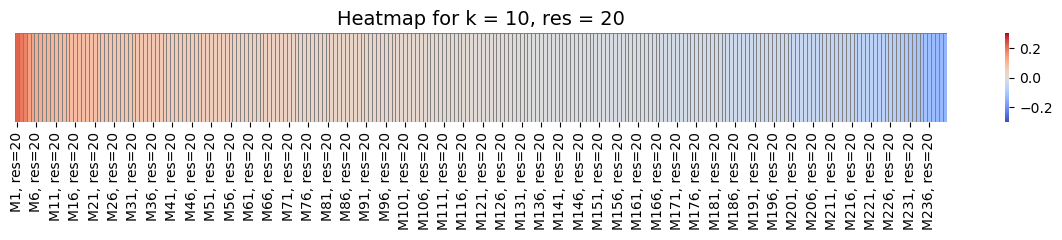

In [43]:
plt.figure(figsize=(12, 2.5))
sns.heatmap(plot_df,
            cmap='coolwarm',
            cbar=True,
            vmin=-0.3, vmax=0.3,
            linewidths=0.5,
            linecolor='gray',
            #annot=True,
            #fmt=".2f")
)

plt.title('Heatmap for k = 10, res = 20', fontsize=14)
plt.yticks([])  # Hide y-axis ticks
plt.xticks(rotation=90)
plt.xlabel('')
plt.tight_layout()
plt.show()

Top 5 res/k combos (5 highest correlation values)

In [78]:
df_modules.sort_values('correlation', ascending=False).head(10)

cluster  cluster size  \
39678  ['ENSG00000110090.13', 'ENSG00000162885.14', '...            15   
60802  ['ENSG00000110090.13', 'ENSG00000162885.14', '...            15   
97346  ['ENSG00000213809.9', 'ENSG00000184984.10', 'E...            24   
32179  ['ENSG00000151502.11', 'ENSG00000156973.14', '...            26   
9011   ['ENSG00000049449.10', 'ENSG00000136770.11', '...           150   
58468  ['ENSG00000139433.11', 'ENSG00000159111.13', '...            20   
20047  ['ENSG00000139433.11', 'ENSG00000159111.13', '...            20   
22233  ['ENSG00000197603.16', 'ENSG00000151502.11', '...            83   
651    ['ENSG00000221829.11', 'ENSG00000160318.6', 'E...           127   
64657  ['ENSG00000221829.11', 'ENSG00000265491.5', 'E...           139   

       resolution     network             method  correlation  \
39678        20.0  knn_10_pos  leiden_unweighted     0.219818   
60802        20.0      knn_10  leiden_unweighted     0.219818   
97346       100.0   knn_5_pos    leiden_weighted     0.218614   
32179        50.0   knn_7_pos  leiden_unweighted     0.215693   
9011          5.0       knn_4  leiden_unweighted     0.214472   
58468       100.0   knn_9_pos    leiden_weighted     0.213627   
20047       100.0       knn_9    leiden_weighted     0.213627   
22233        20.0      knn_15  leiden_unweighted     0.210786   
651          20.0      knn_14  leiden_unweighted     0.210003   
64657        20.0      knn_11    leiden_weighted     0.208981   

                                               cluster_l   k  
39678  [ENSG00000110090.13, ENSG00000162885.14, ENSG0...  10  
60802  [ENSG00000110090.13, ENSG00000162885.14, ENSG0...  10  
97346  [ENSG00000213809.9, ENSG00000184984.10, ENSG00...   5  
32179  [ENSG00000151502.11, ENSG00000156973.14, ENSG0...   7  
9011   [ENSG00000049449.10, ENSG00000136770.11, ENSG0...   4  
58468  [ENSG00000139433.11, ENSG00000159111.13, ENSG0...   9  
20047  [ENSG00000139433.11, ENSG00000159111.13, ENSG0...   9  
22233  [ENSG00000197603.16, ENSG00000151502.11, ENSG0...  15  
651    [ENSG00000221829.11, ENSG00000160318.6, ENSG00...  14  
64657  [ENSG00000221829.11, ENSG00000265491.5, ENSG00...  11

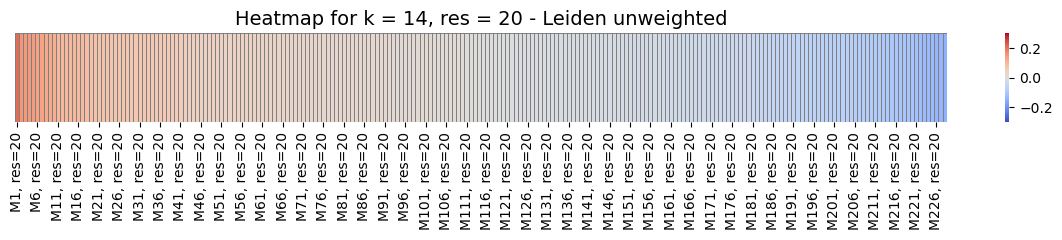

In [83]:
# k = 10, res = 20
subset = df_modules[(df_modules['k'] == 14) 
                    & (df_modules['resolution'] == 20) 
                    & (df_modules['network']=='knn_14')
                    & (df_modules['method']=='leiden_unweighted')].copy()
subset = subset.reset_index(drop=True)
subset['module_name'] = ['M' + str(i + 1) for i in range(len(subset))]
subset['module_label'] = subset['module_name'] + ', res=20'

# Create DataFrame for heatmap
plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)

plt.figure(figsize=(12, 2.5))
sns.heatmap(plot_df,
            cmap='coolwarm',
            cbar=True,
            vmin=-0.3, vmax=0.3,
            linewidths=0.5,
            linecolor='gray',
            #annot=True,
            #fmt=".2f")
)

plt.title('Heatmap for k = 14, res = 20 - Leiden unweighted', fontsize=14)
plt.yticks([])  # Hide y-axis ticks
plt.xticks(rotation=90)
plt.xlabel('')
plt.tight_layout()
plt.show()

We put it in a loop and get all of them in rows. Generation of the heatmaps for all combinations of k (from 4 to 15) and  resolutions. 

In [46]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

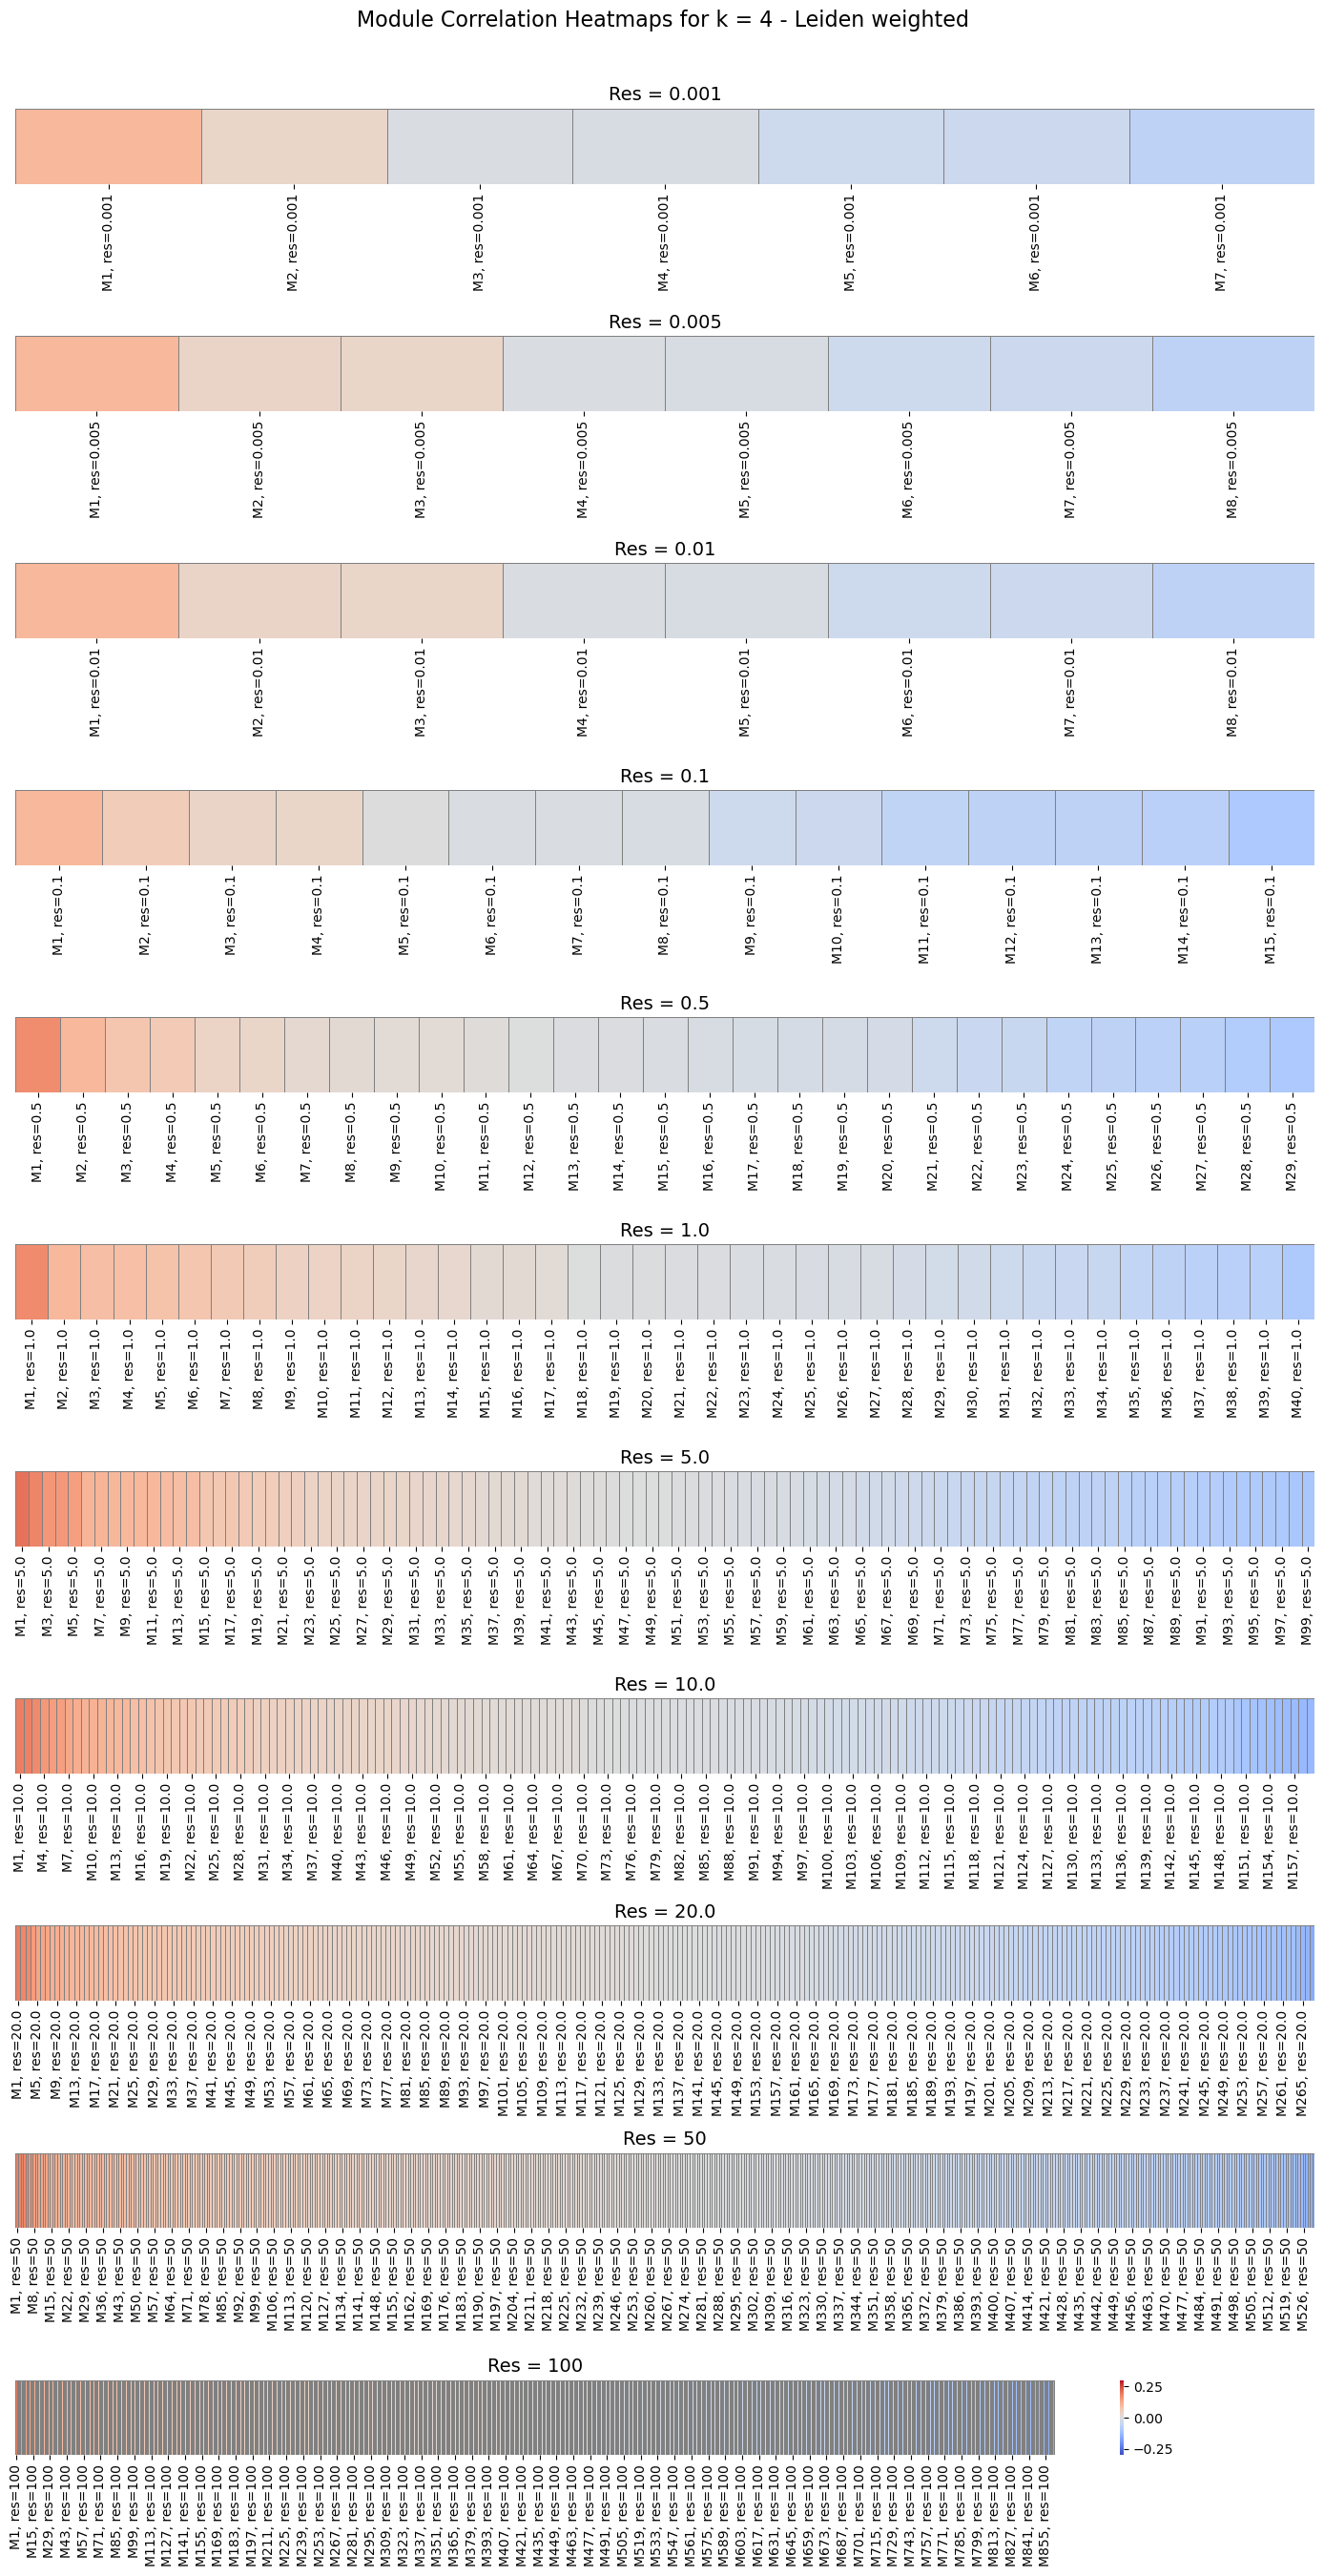

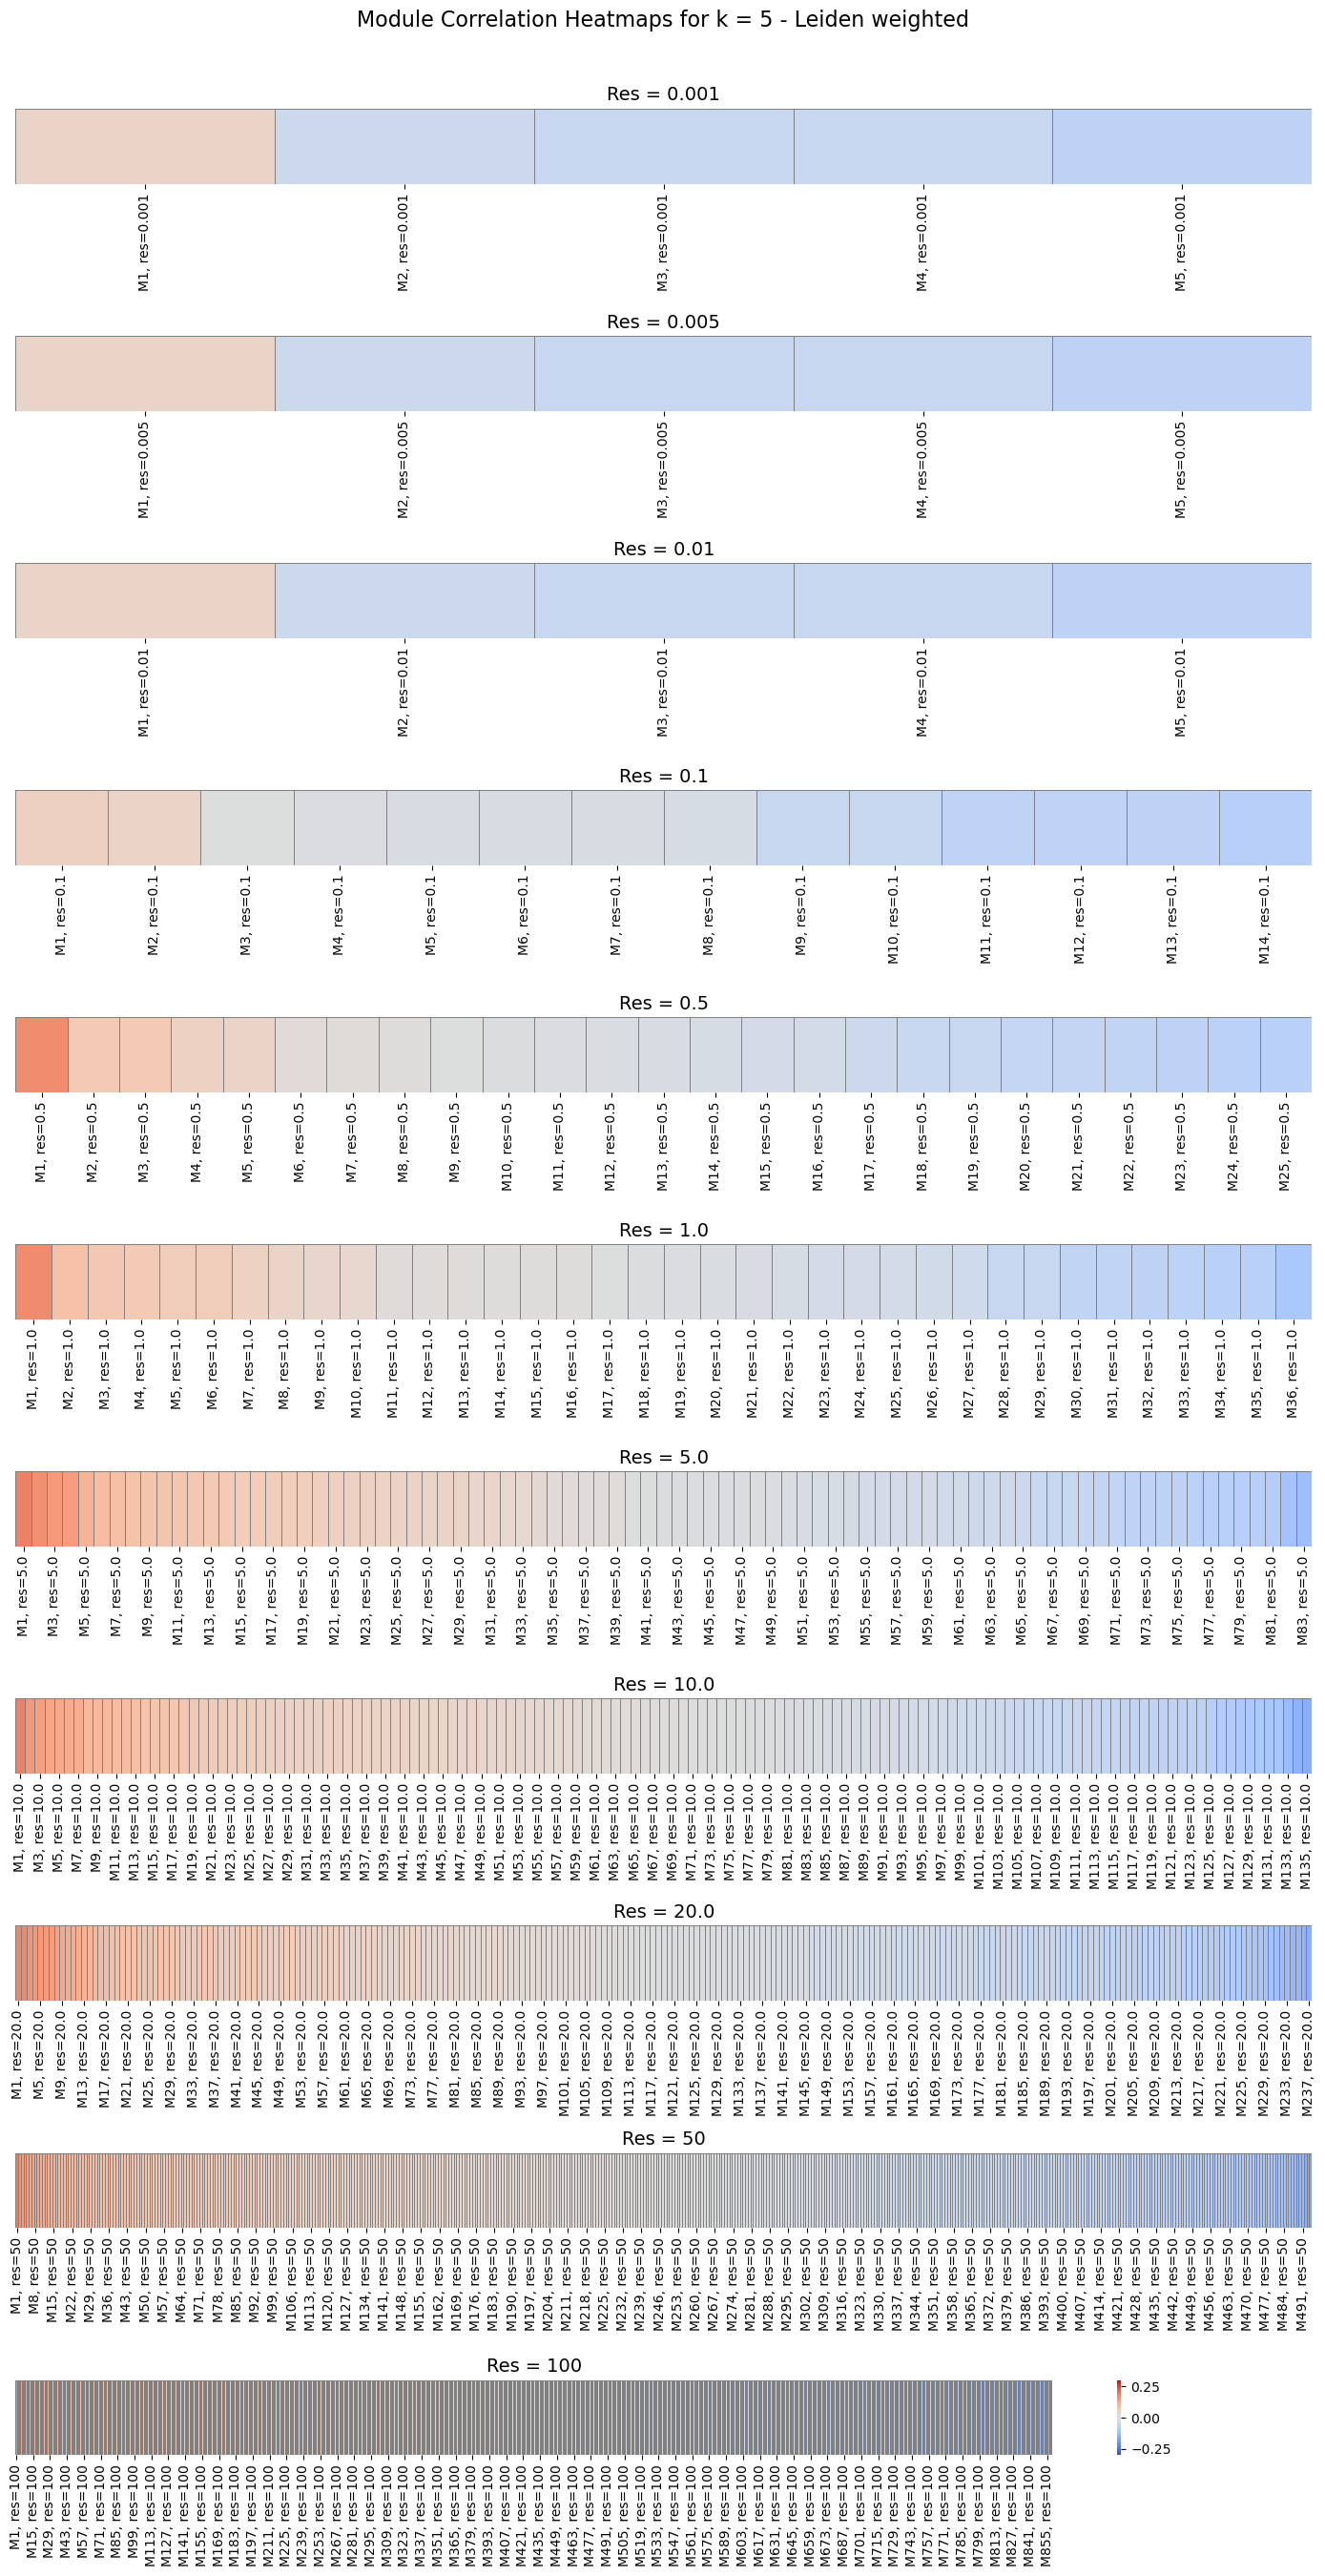

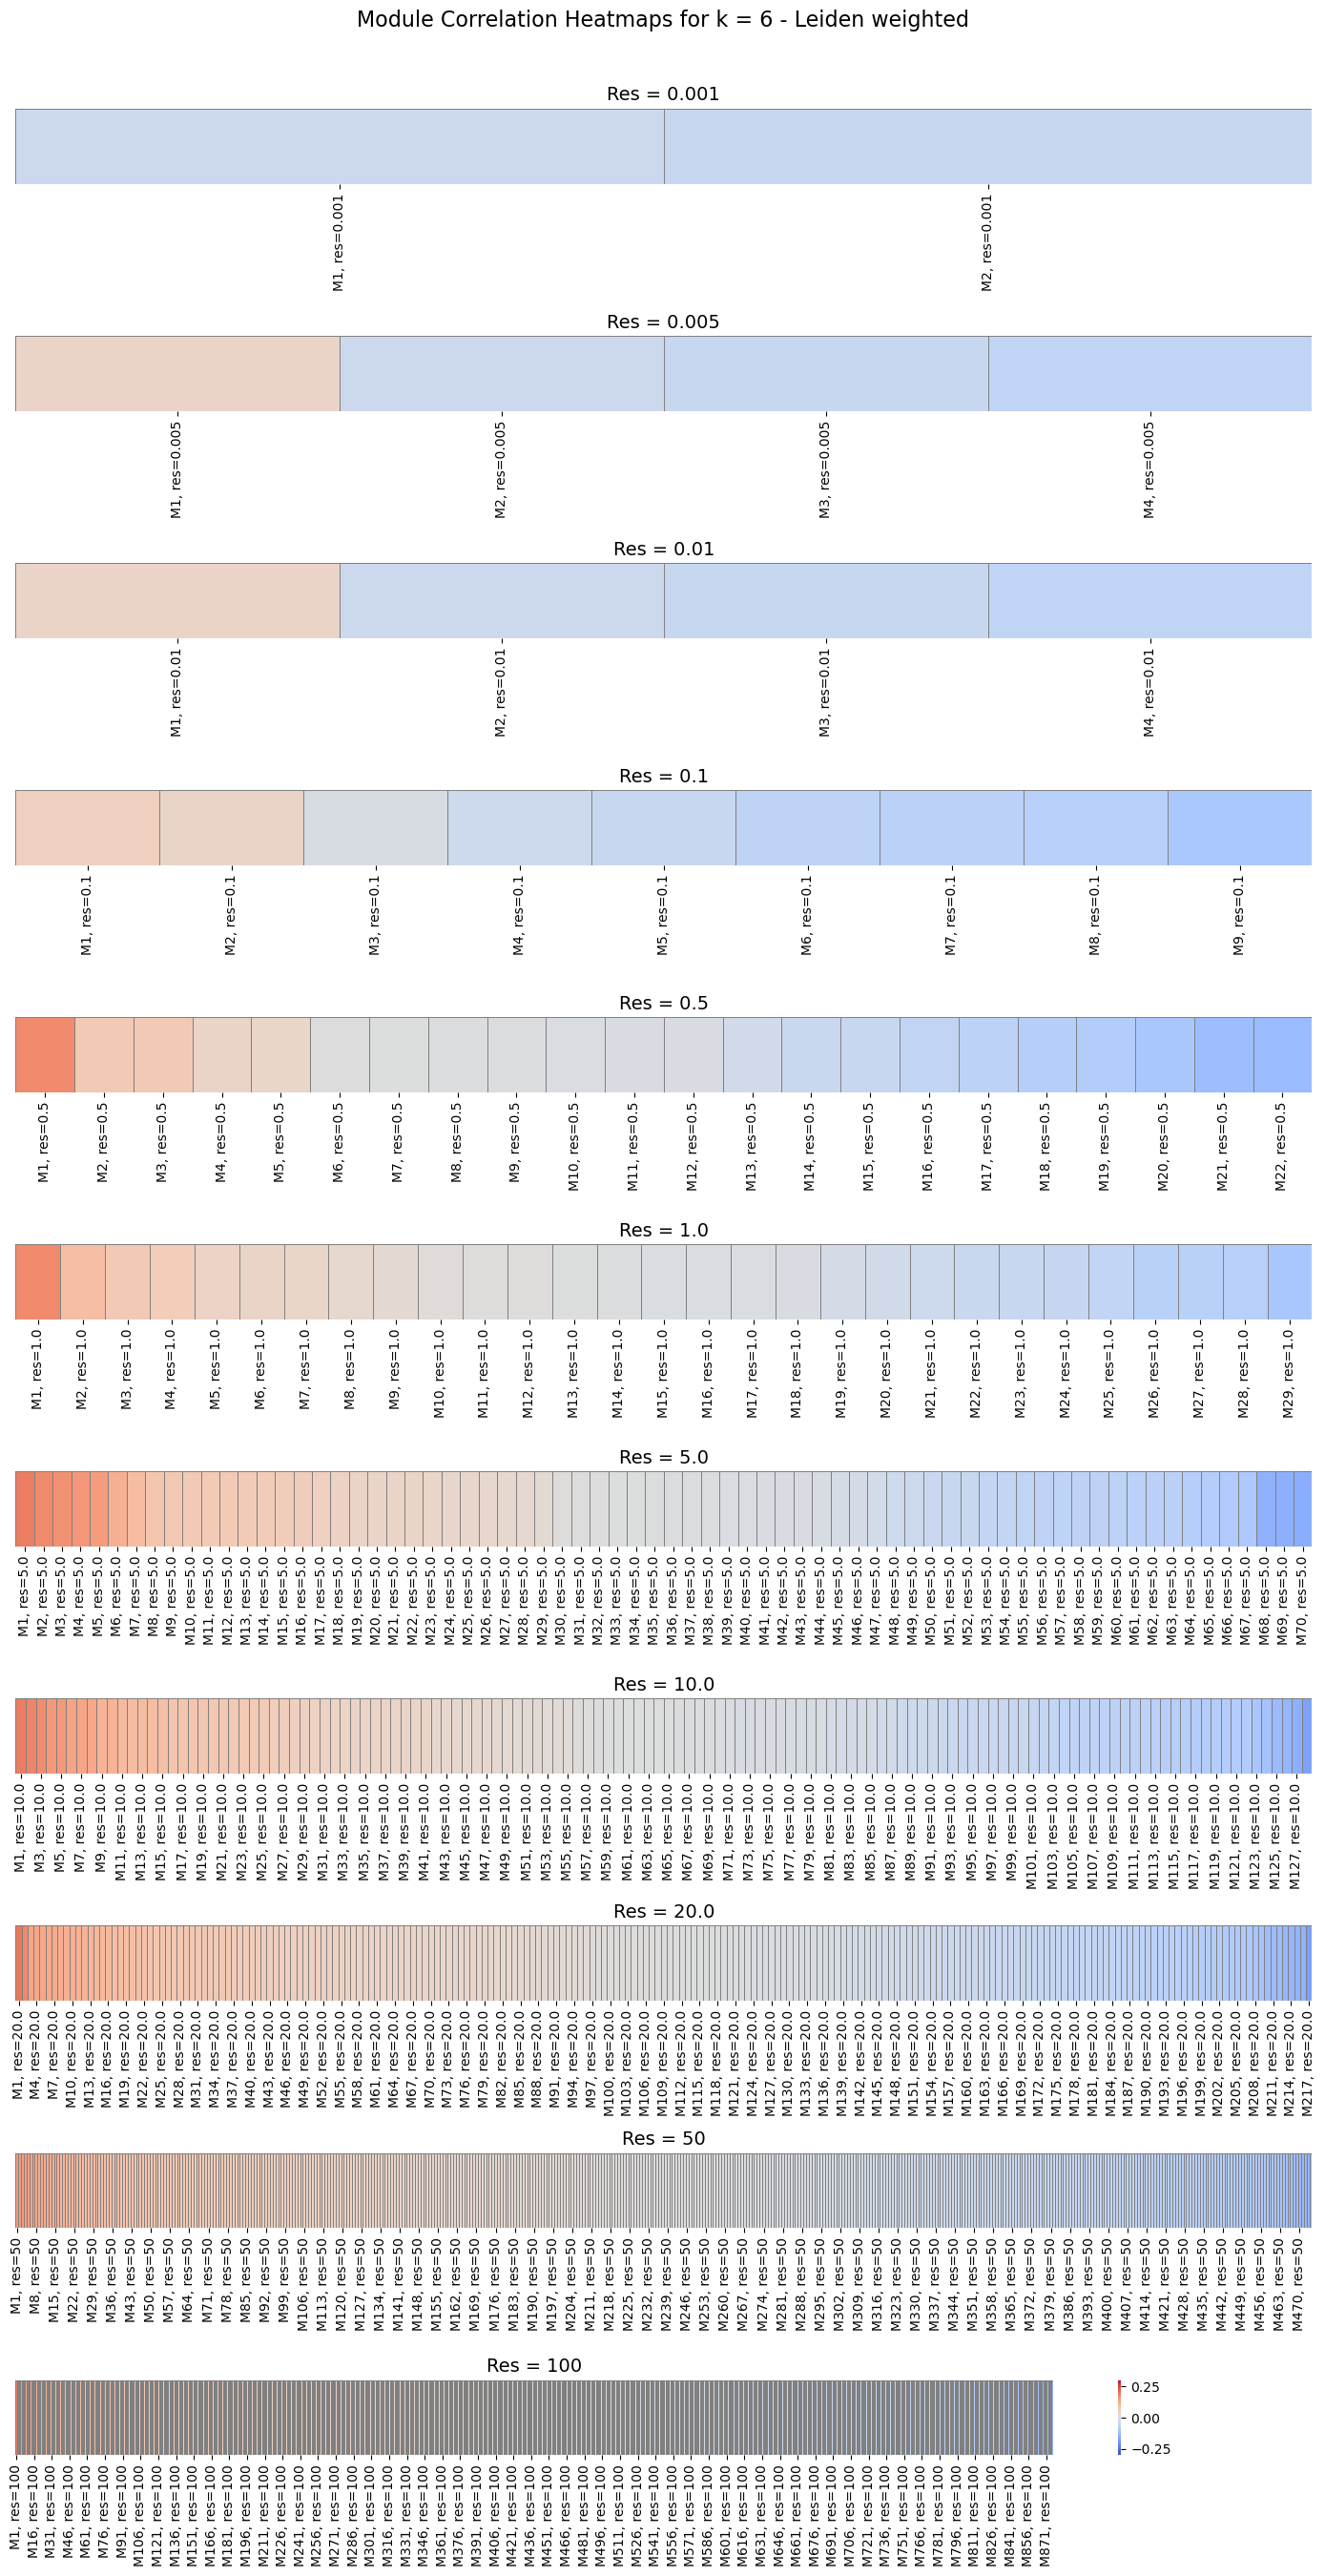

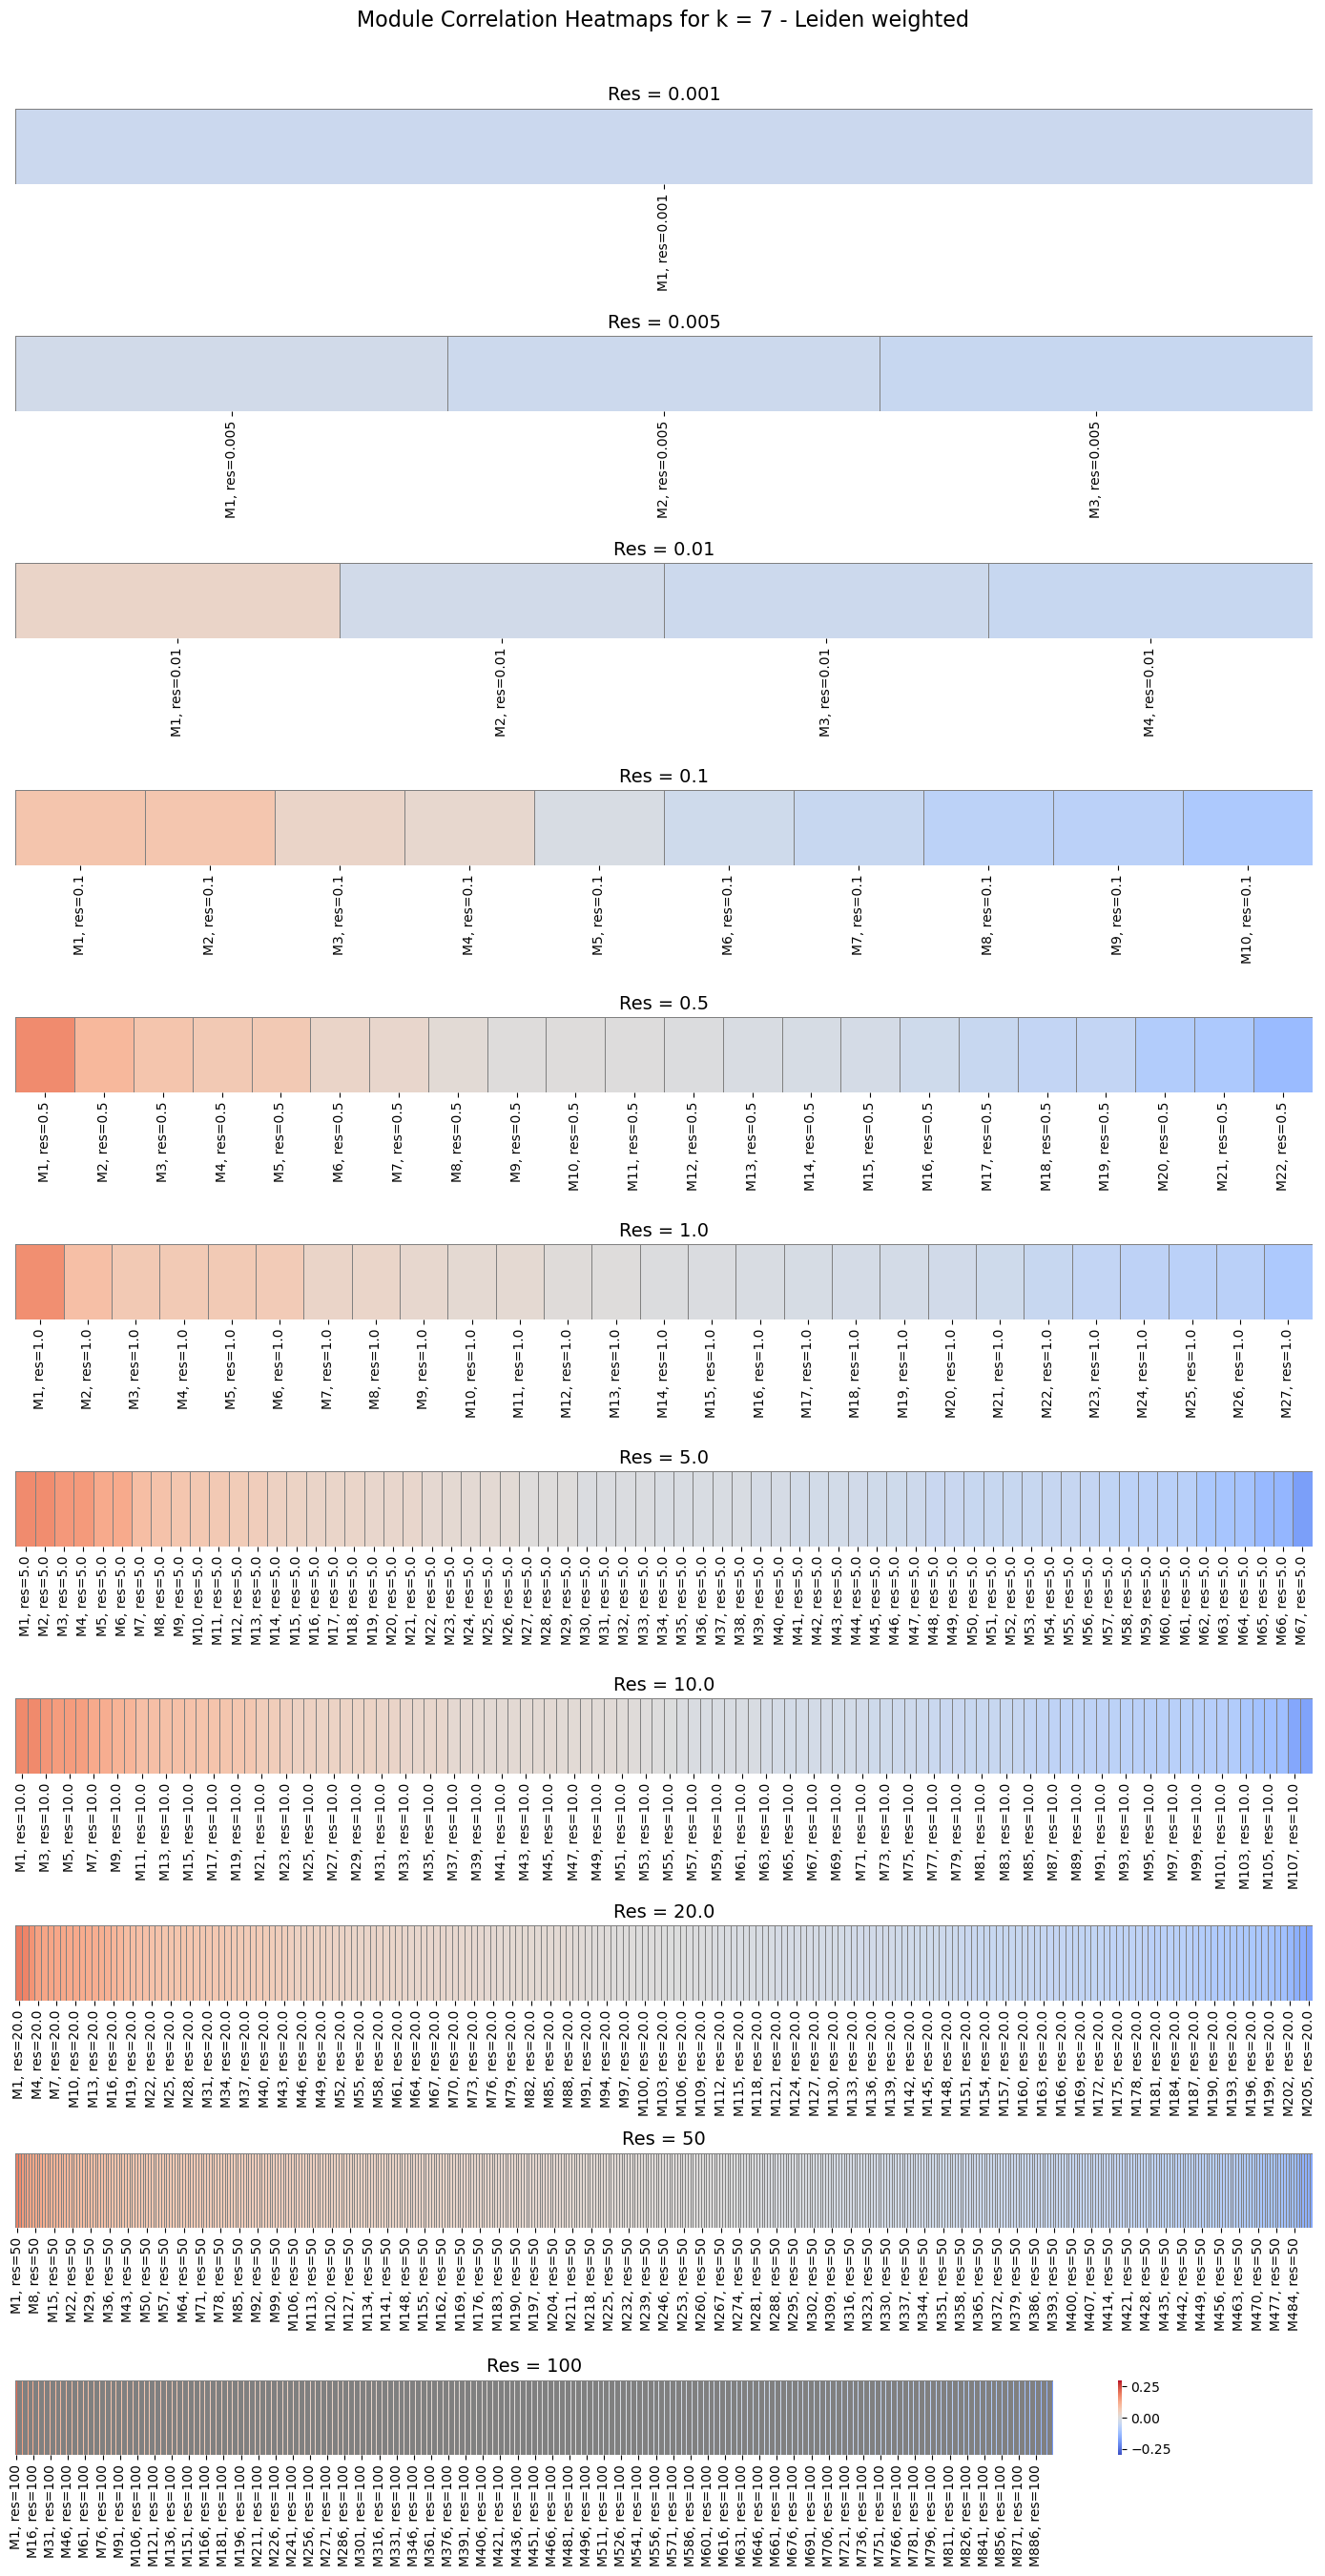

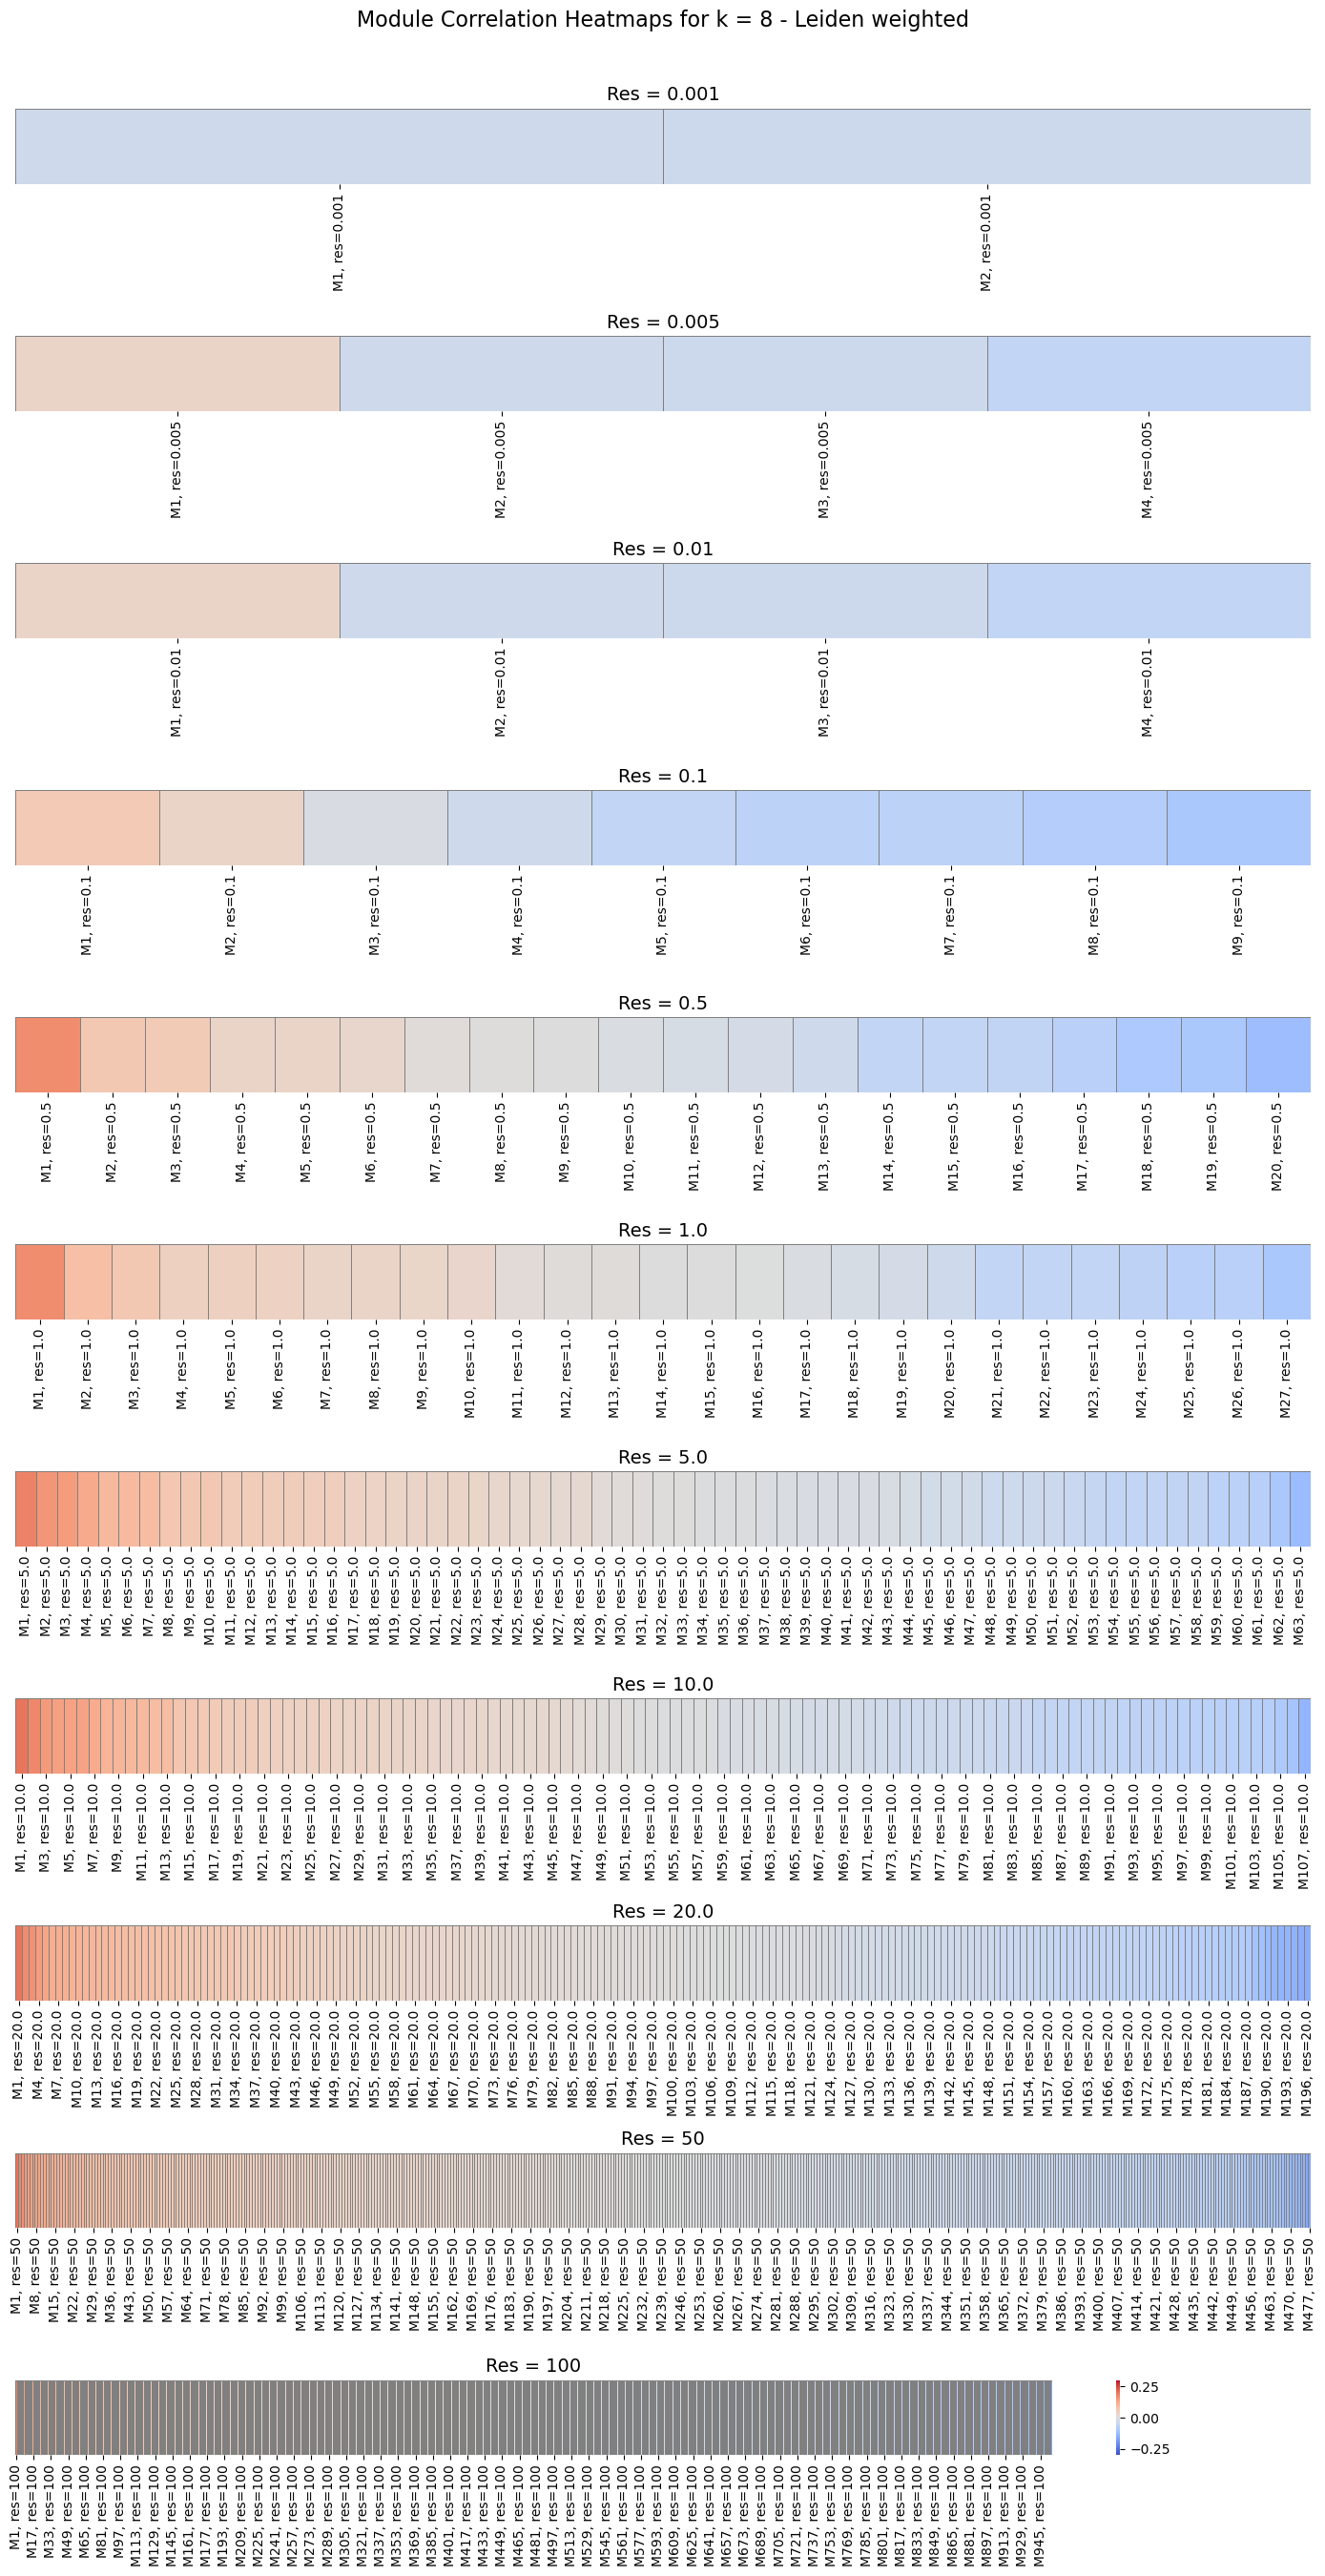

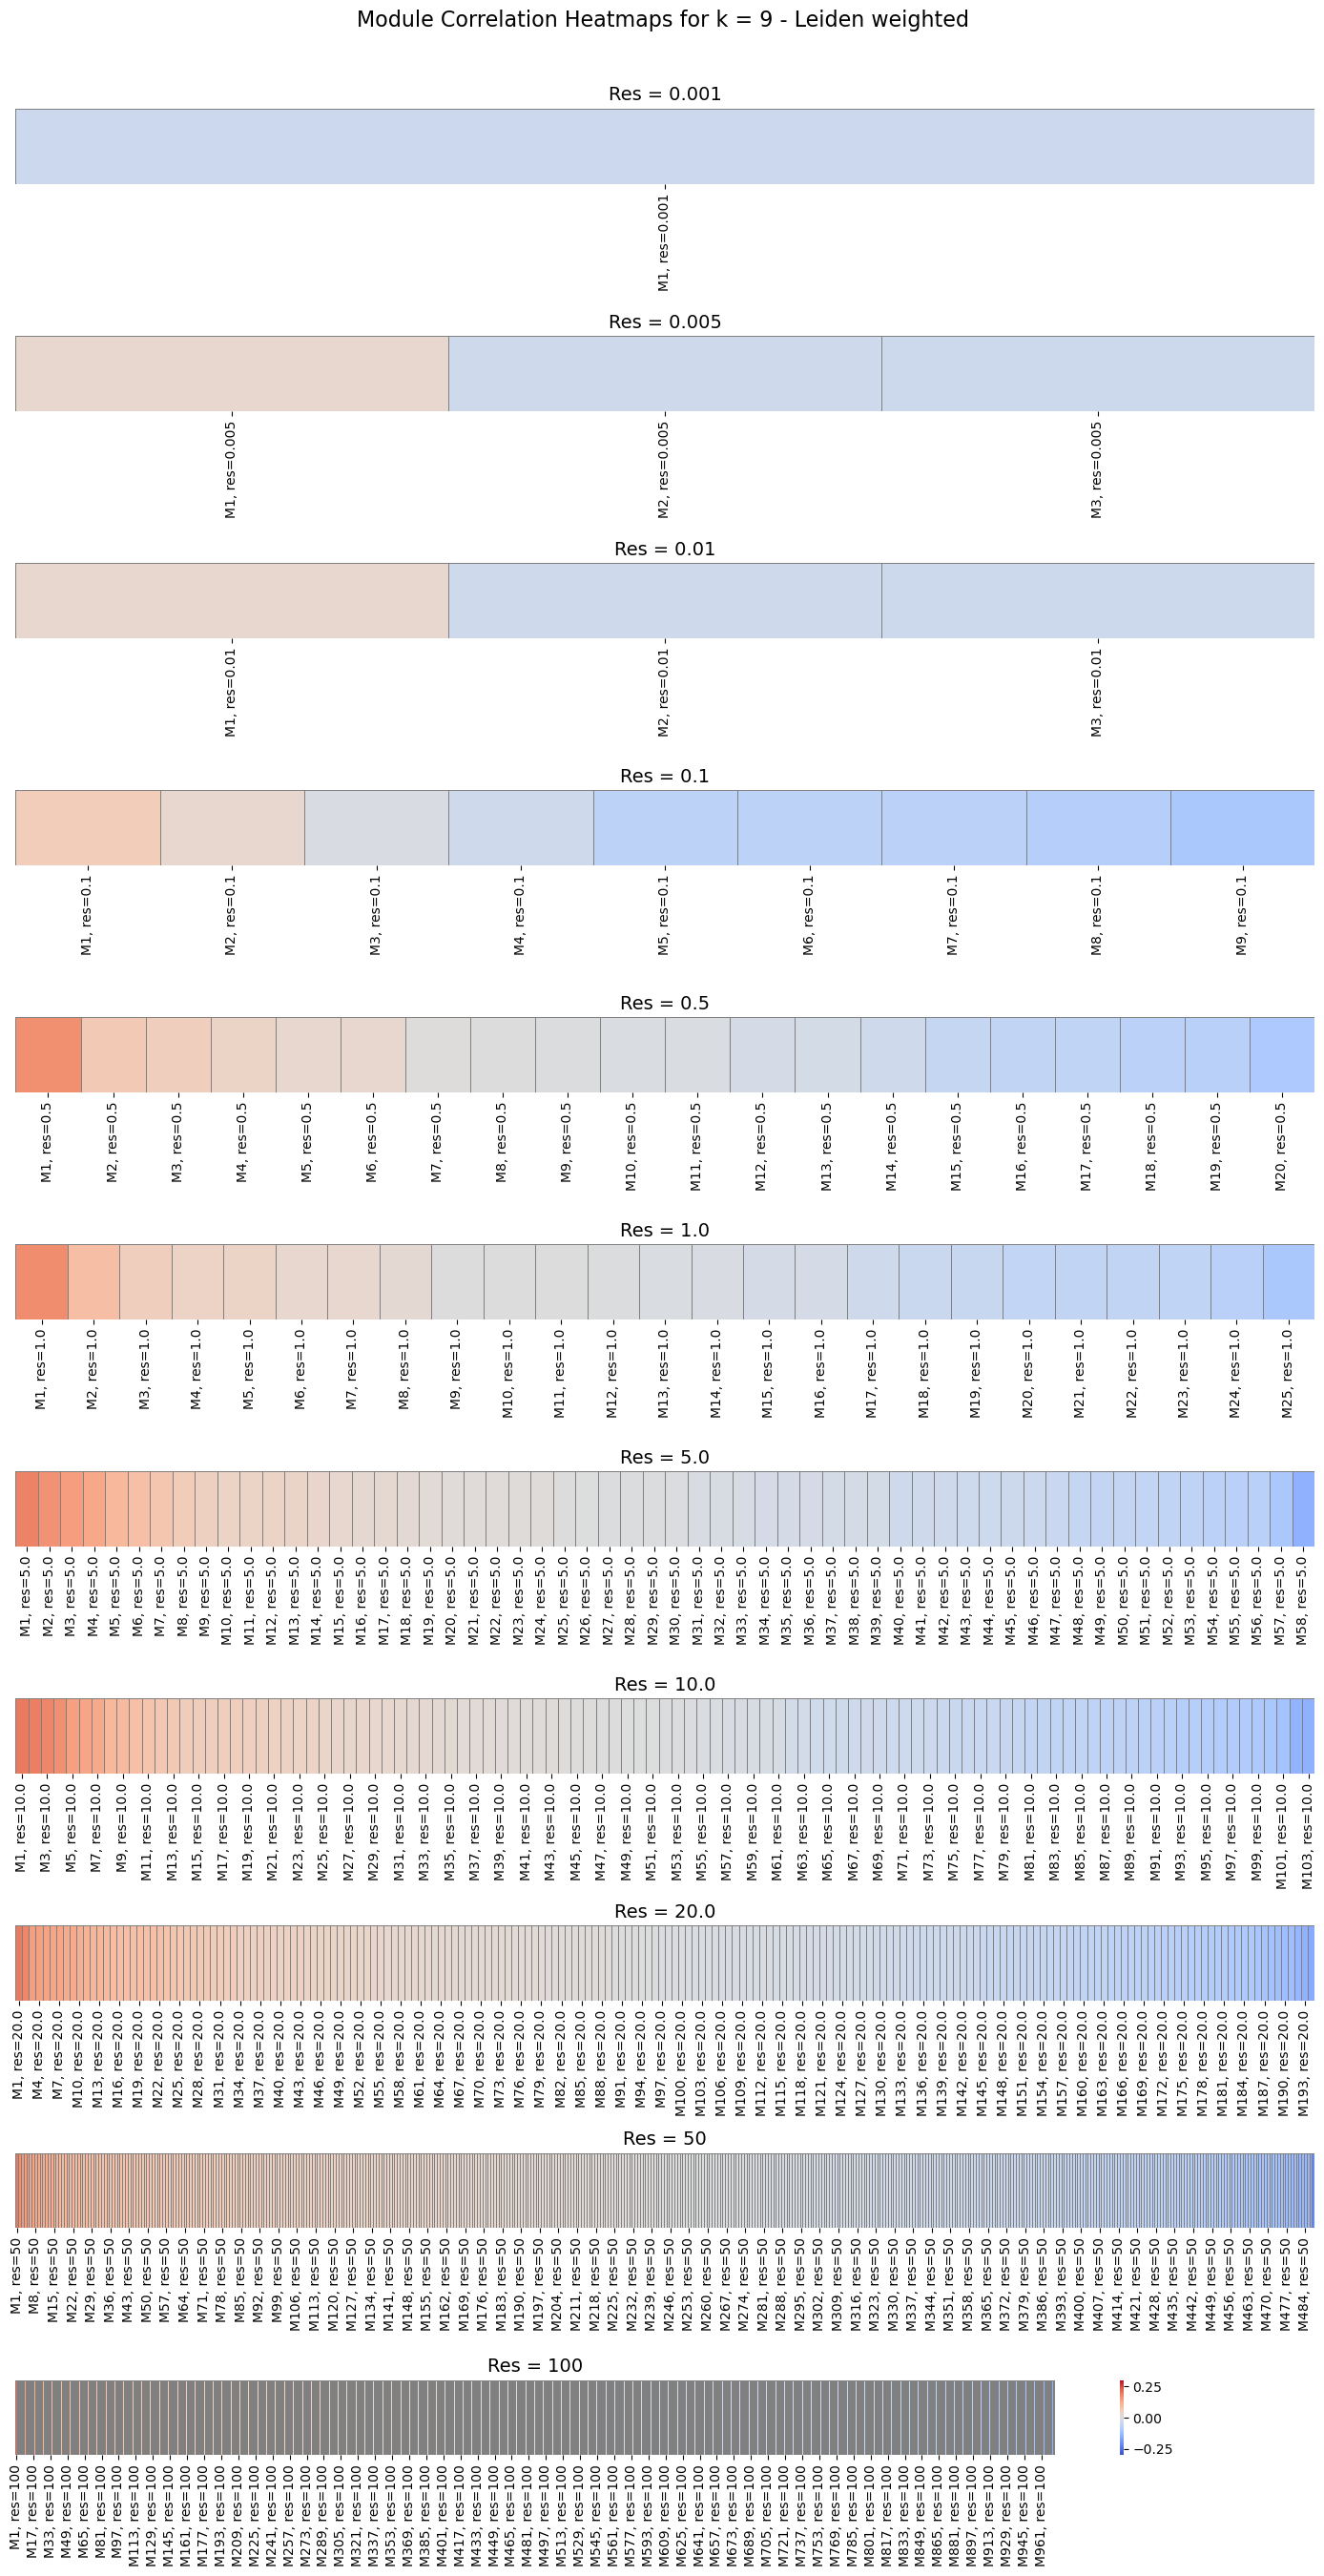

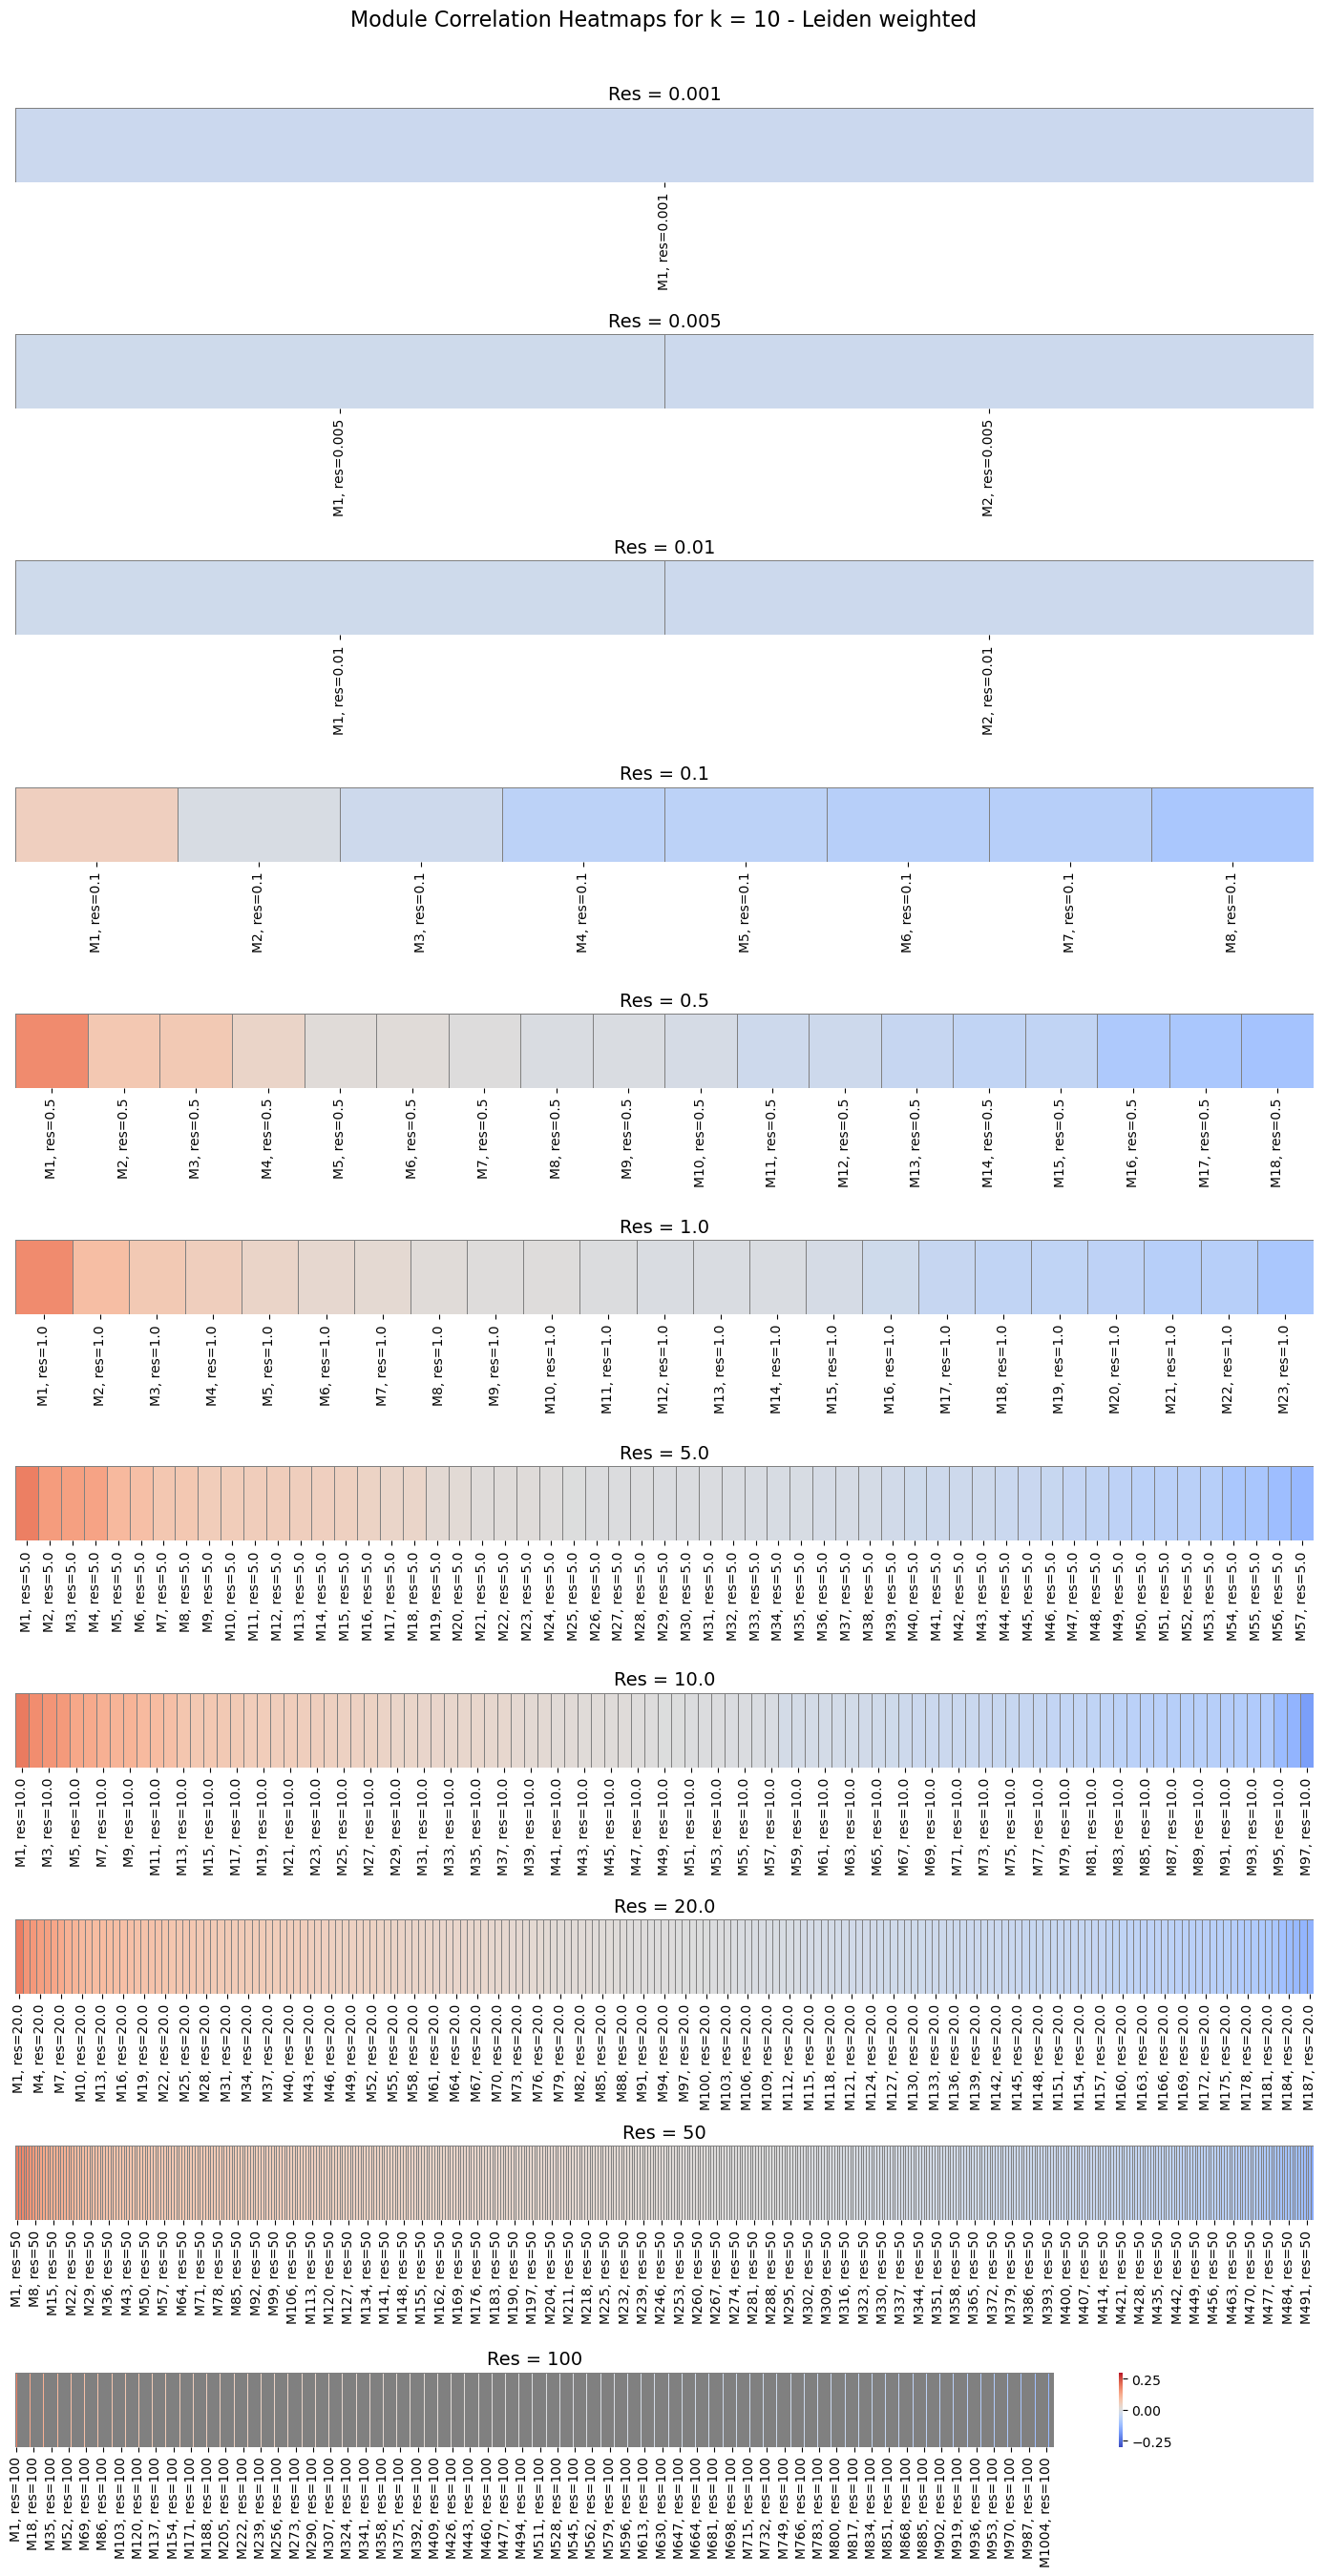

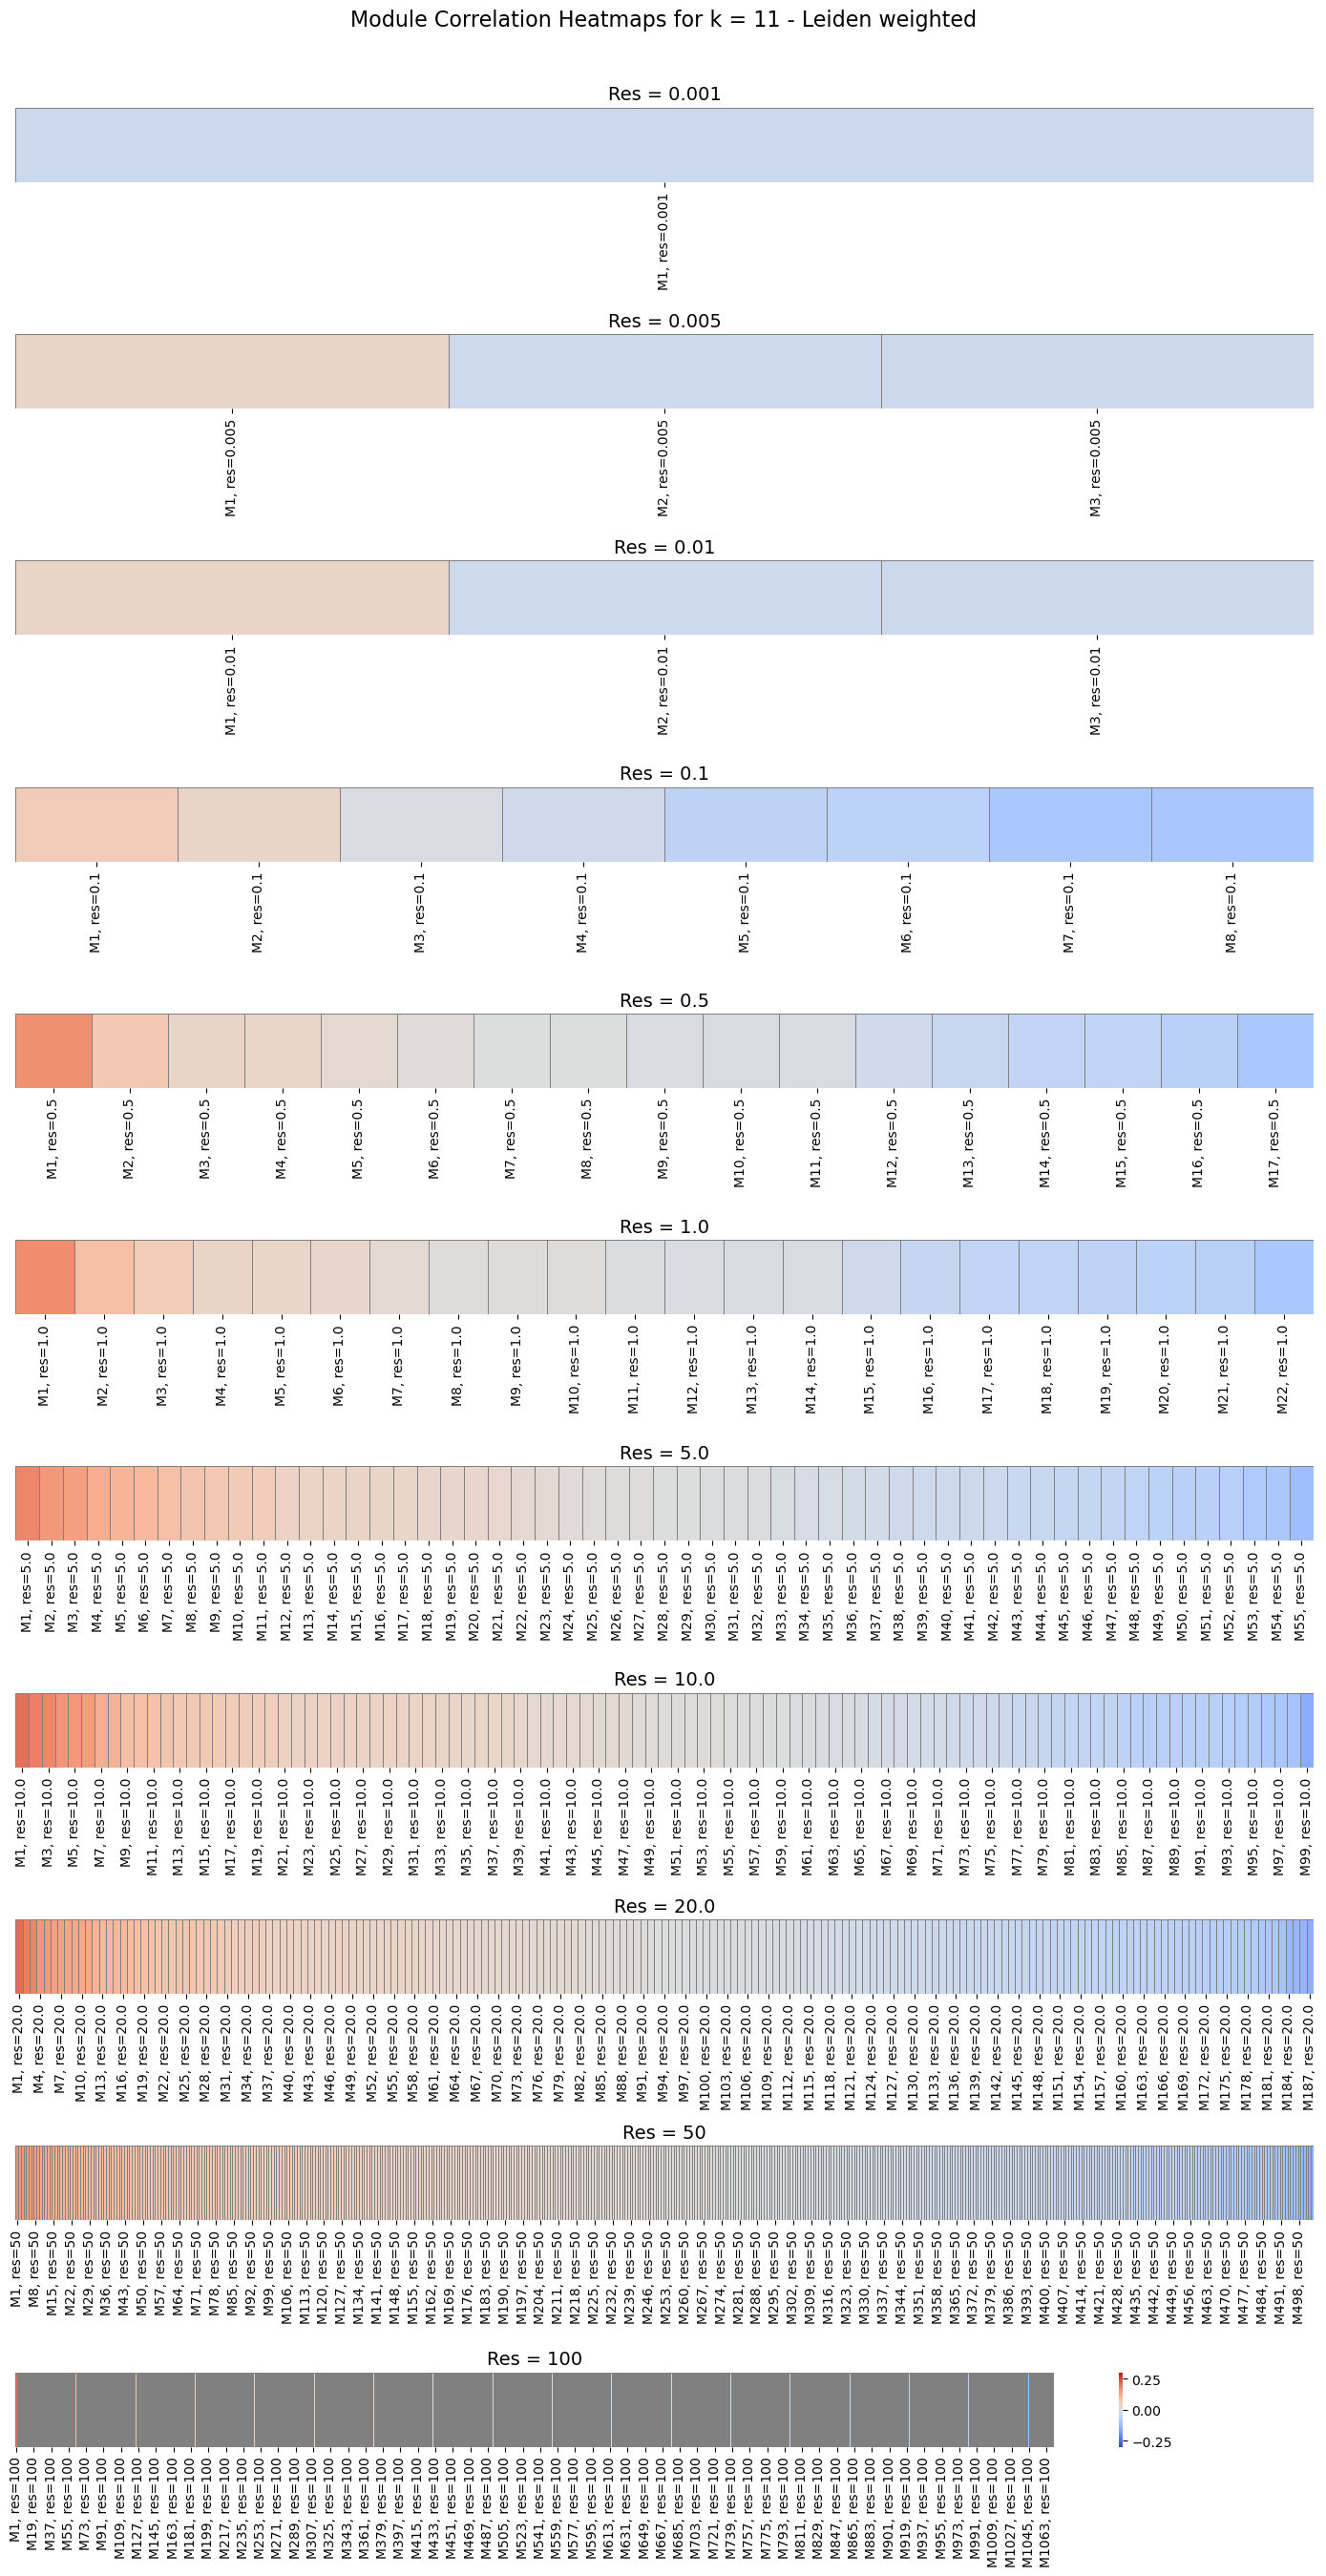

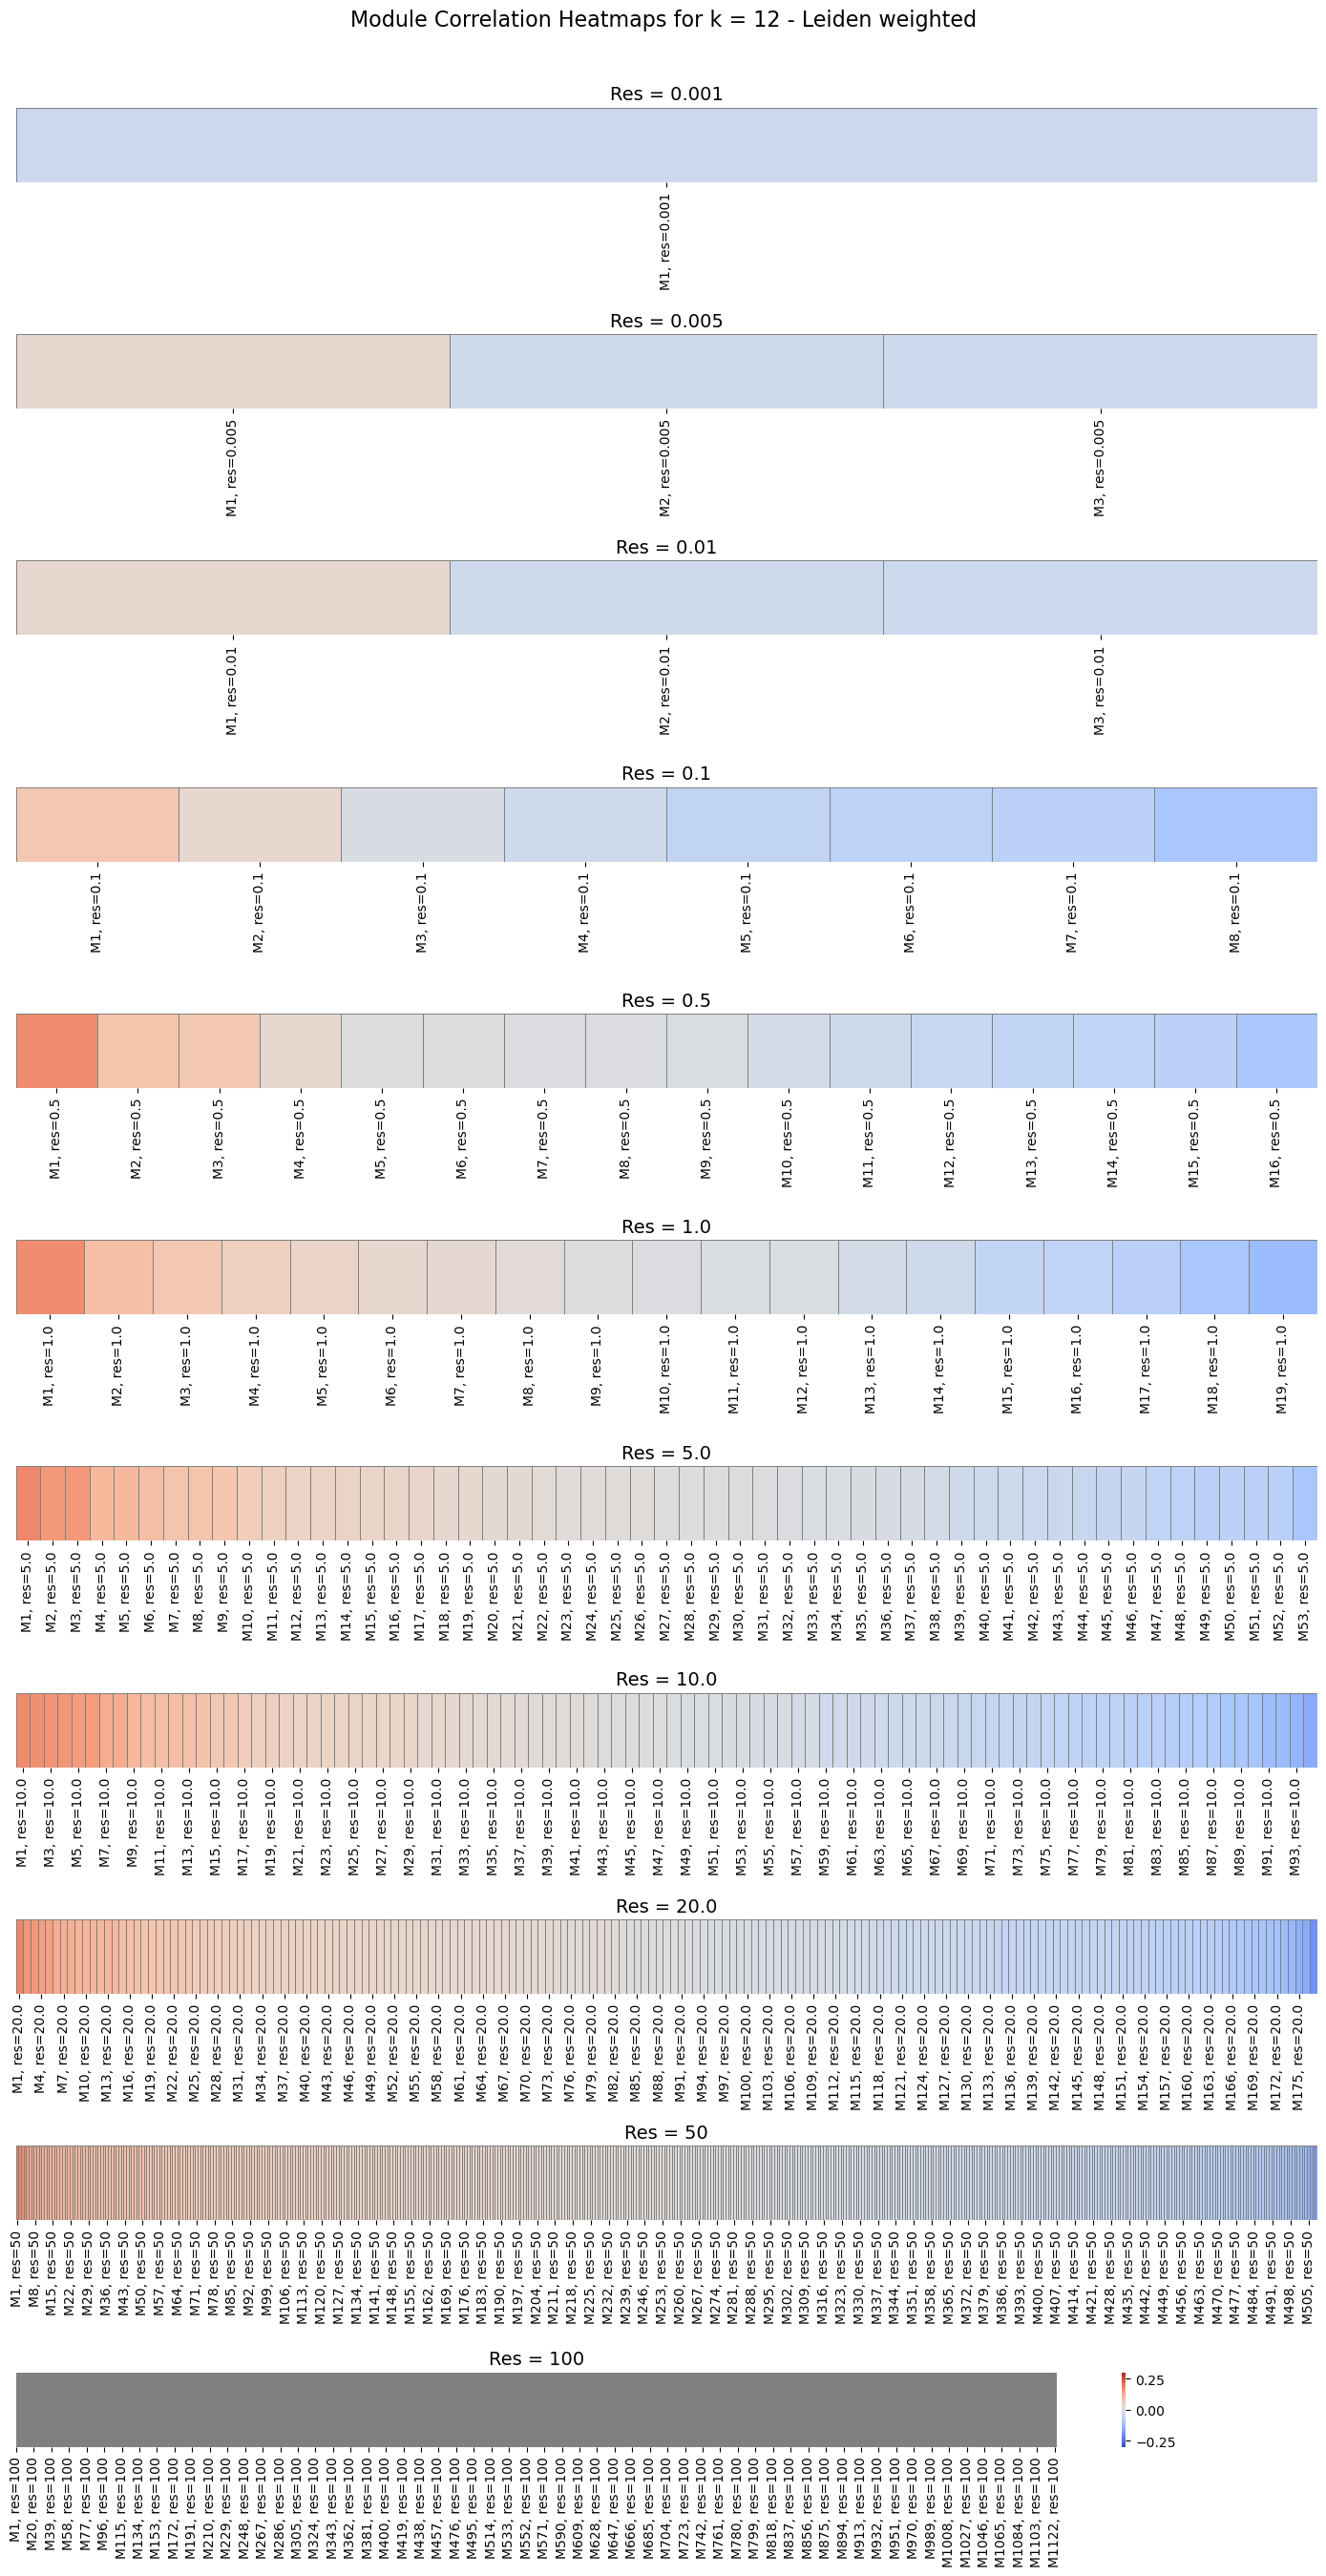

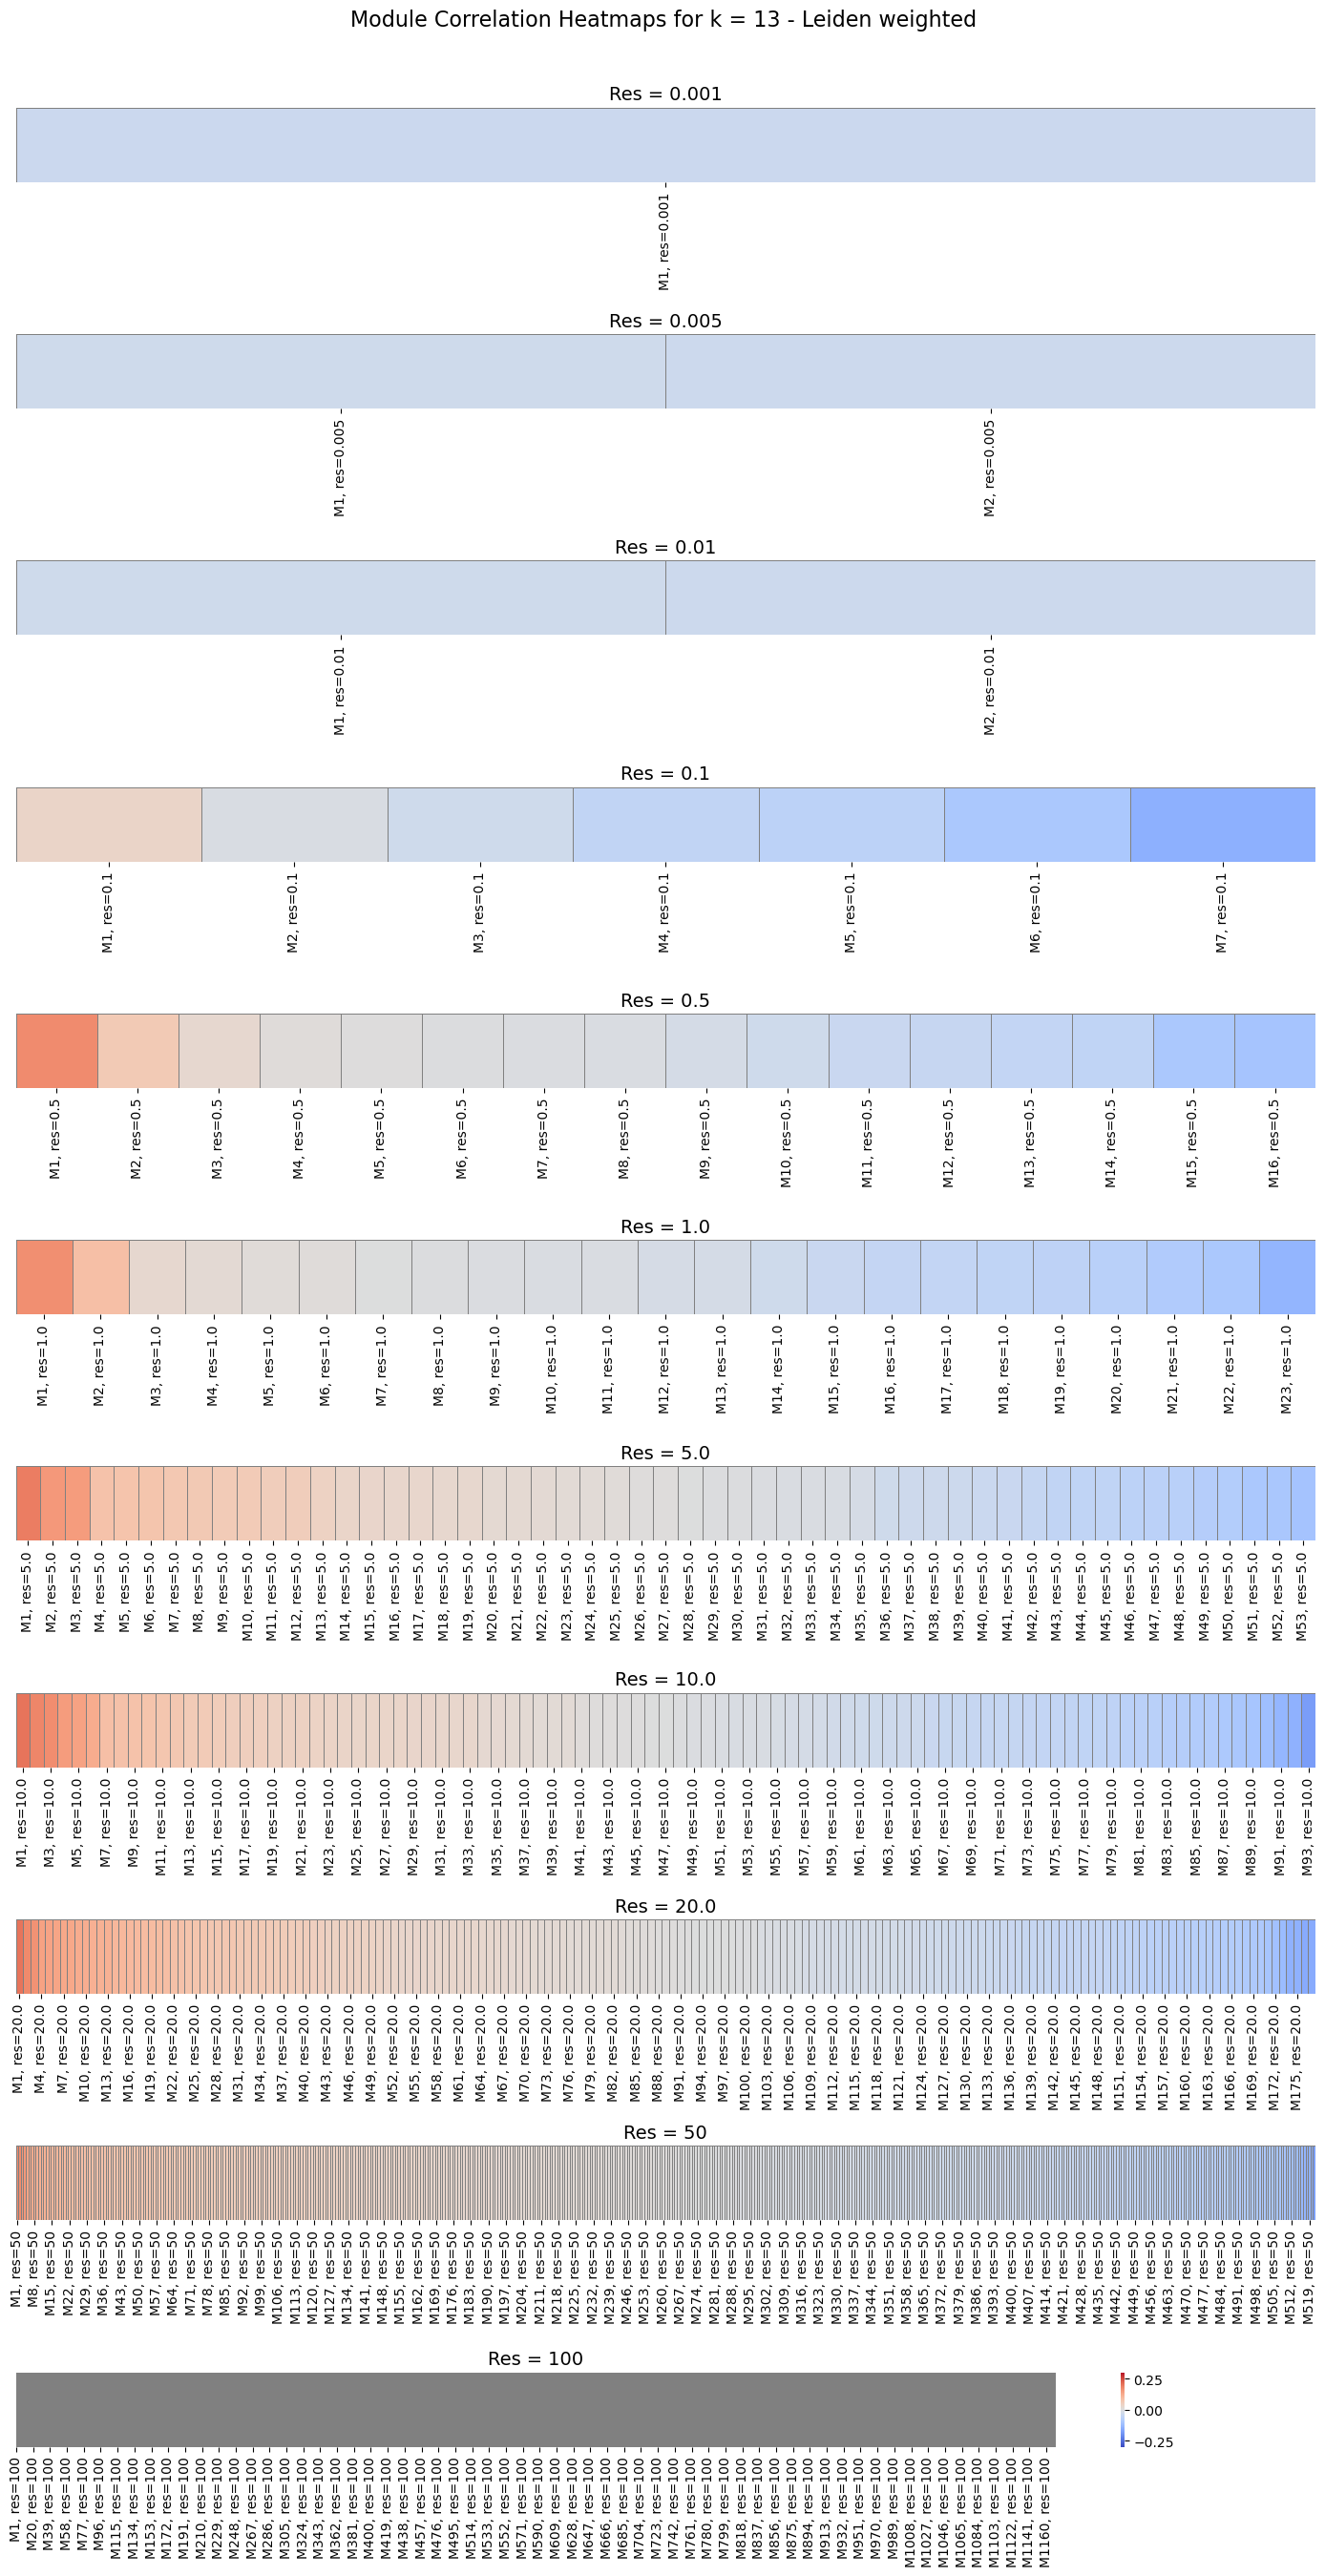

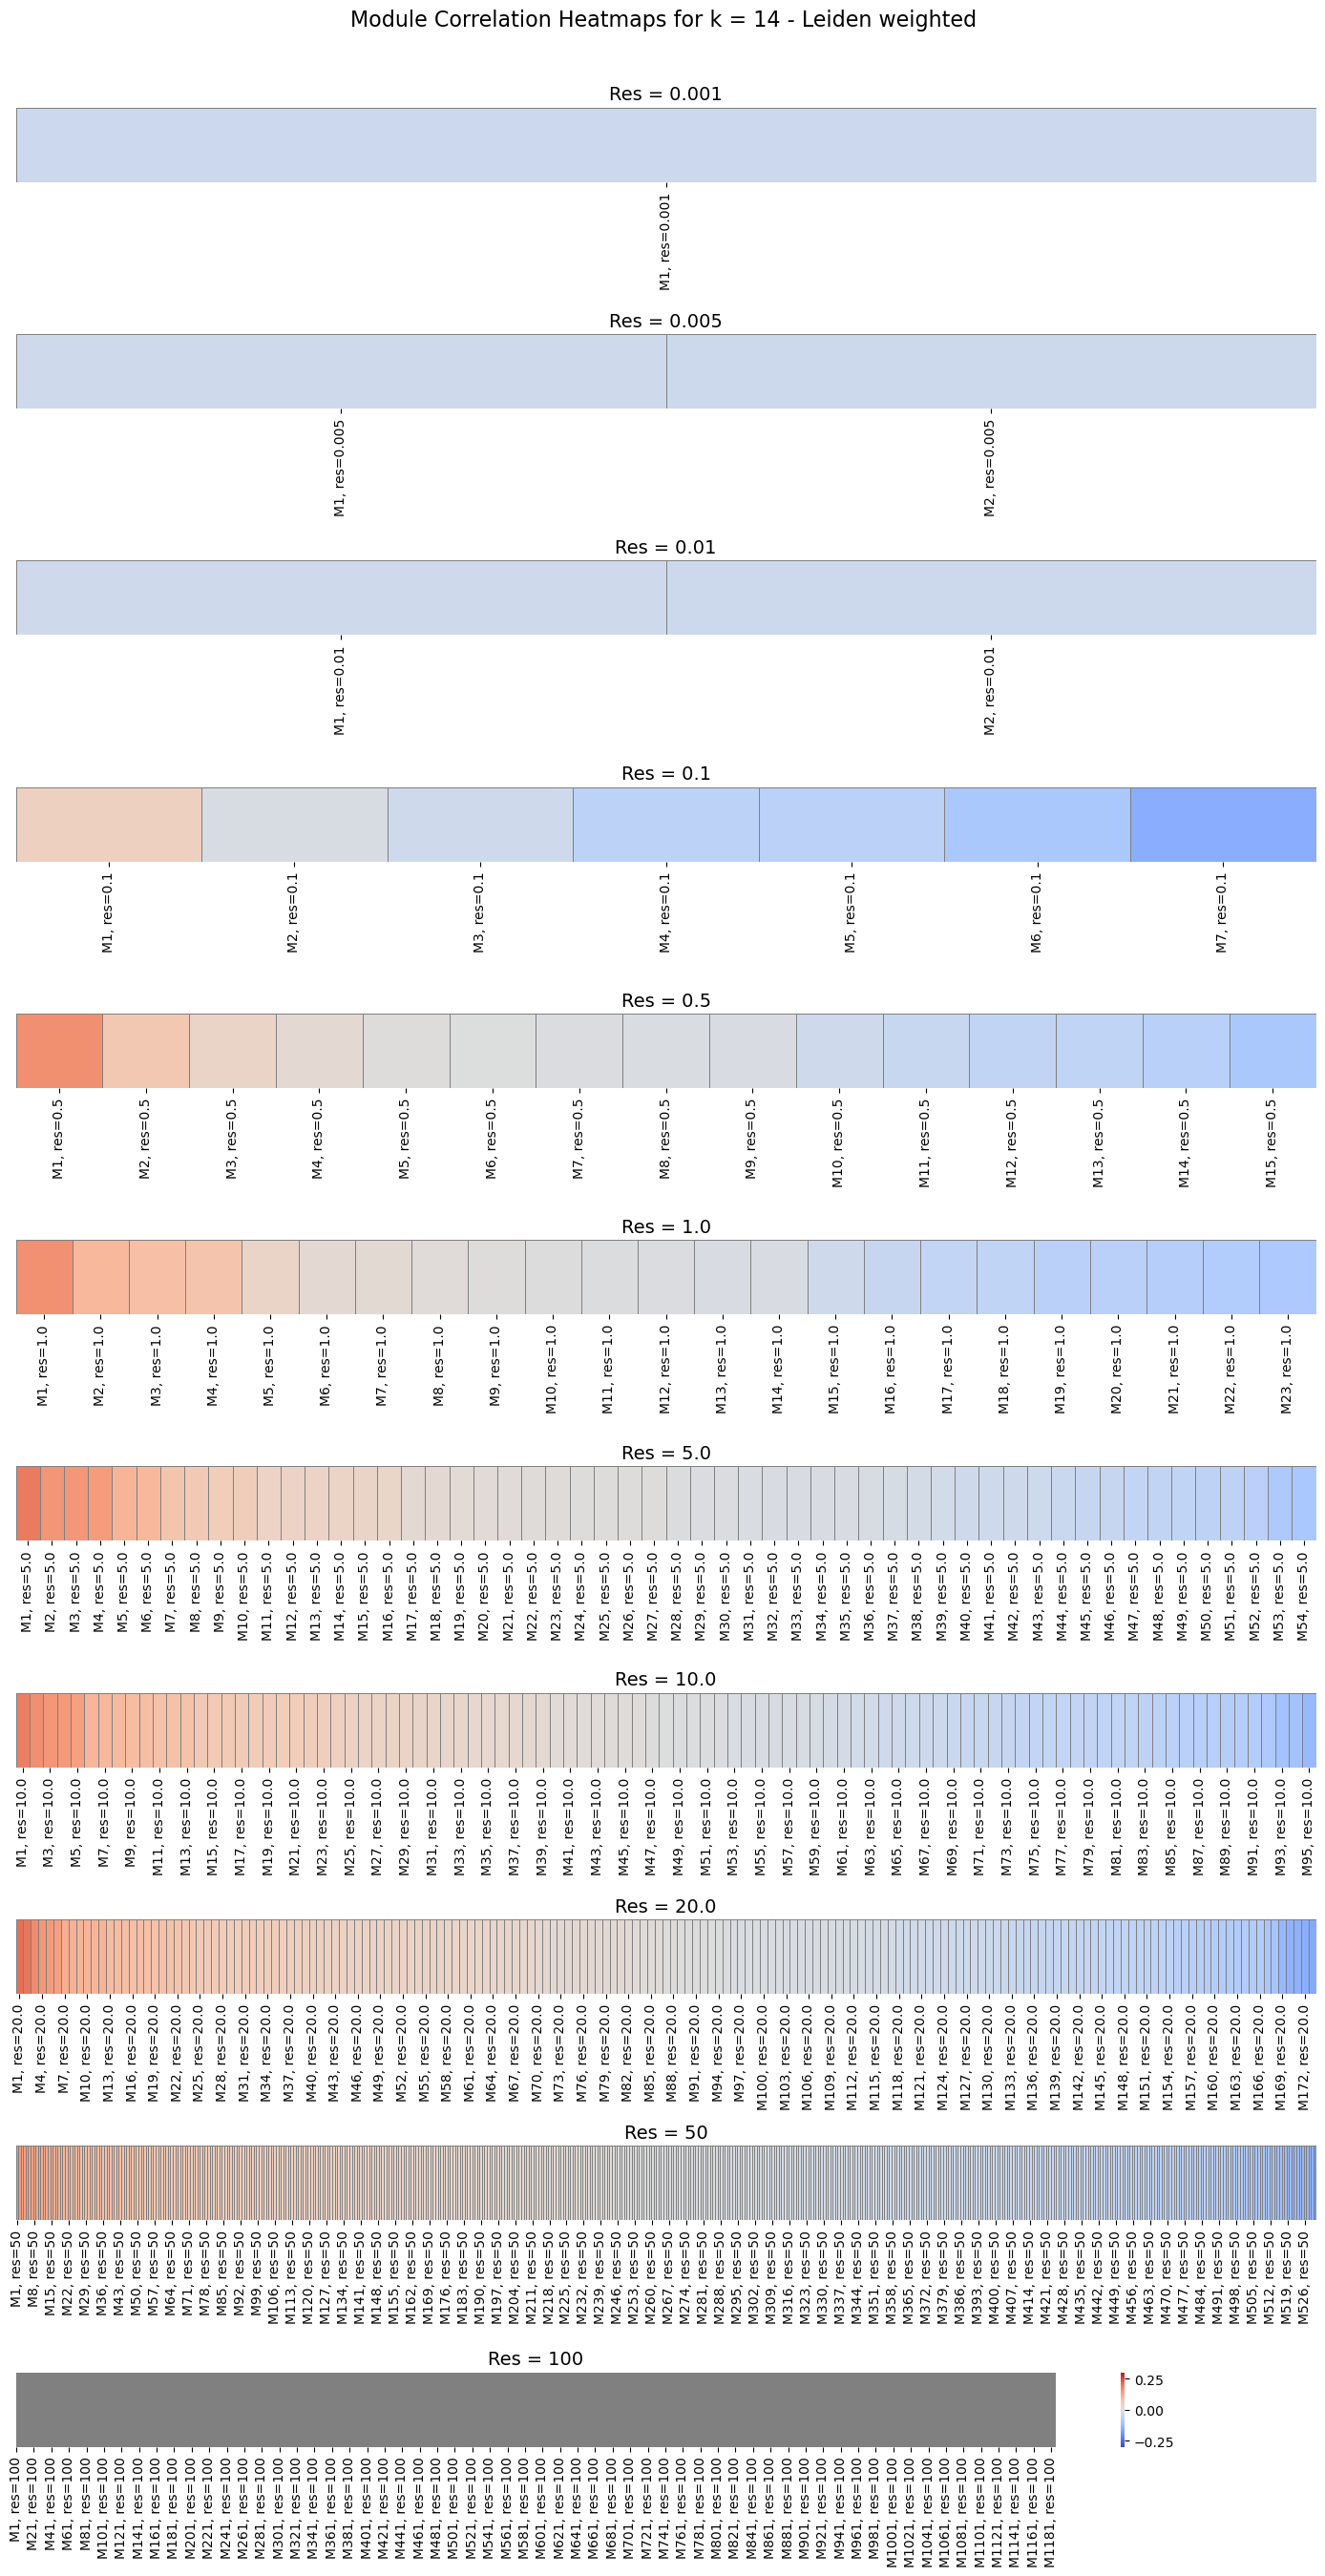

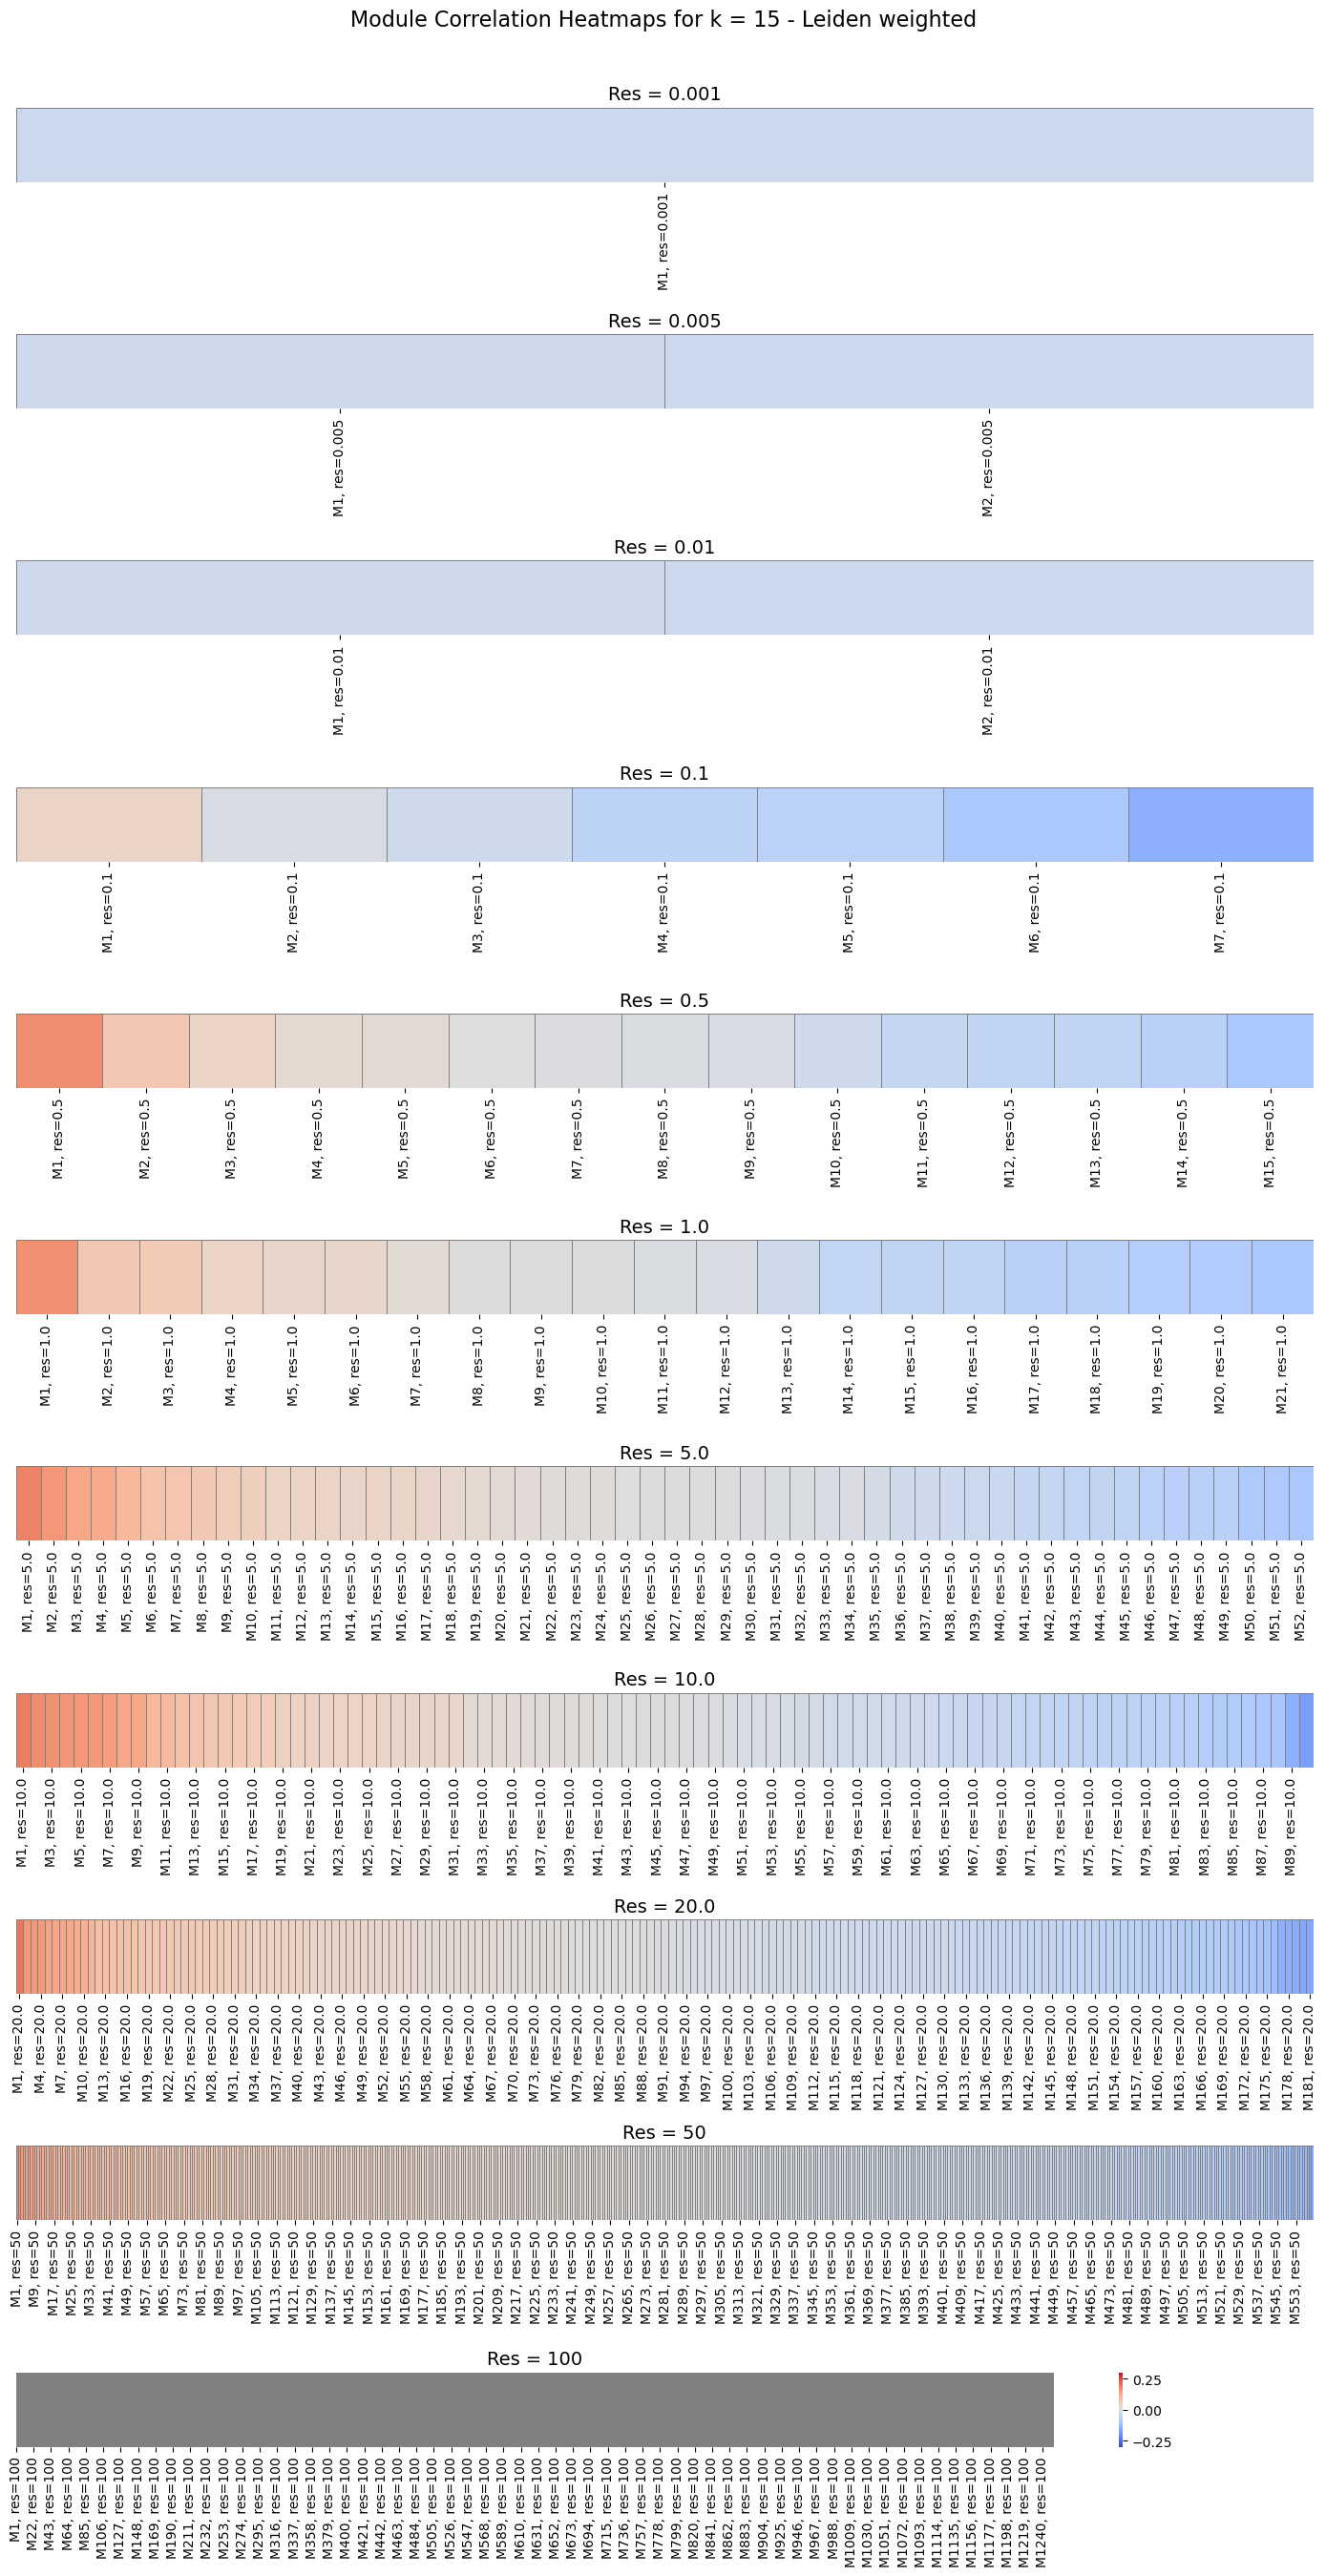

In [70]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process the data
df_modules = pd.read_csv('Correlation_results/module_correlations_leiden_all.csv')
df_modules = df_modules.sort_values('correlation', ascending=False)
df_modules['cluster_l'] = df_modules['cluster'].apply(lambda x: ast.literal_eval(x))
df_modules['k'] = df_modules['network'].str.extract(r'knn_(\d+)', expand=False).astype(int)

ks = range(4, 16)
resolutions = [0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50, 100]

# Generate one figure per k
for k in ks:
    fig, axes = plt.subplots(len(resolutions), 1, figsize=(14, 2.5 * len(resolutions)))
    fig.suptitle(f'Module Correlation Heatmaps for k = {k} - Leiden weighted', fontsize=16)

    for i, res in enumerate(resolutions):
        ax = axes[i]

        subset = df_modules[
            (df_modules['k'] == k) &
            (df_modules['resolution'] == res) &
            (df_modules['network'] == f'knn_{k}') &
            (df_modules['method'] == 'leiden_weighted')].copy()

        subset = subset.reset_index(drop=True)
        subset['module_name'] = ['M' + str(j + 1) for j in range(len(subset))]
        subset['module_label'] = subset['module_name'] + f', res={res}'

        plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)

        sns.heatmap(plot_df,
                    cmap='coolwarm',
                    cbar=(i == len(resolutions)-1),  # Show colorbar only for the last plot
                    vmin=-0.3, vmax=0.3,
                    linewidths=0.5,
                    linecolor='gray',
                    ax=ax,
                    # annot=True,
                    # fmt=".2f"
                    )

        ax.set_title(f'Res = {res}', fontsize=14)
        ax.set_yticks([])
        ax.tick_params(axis='x', labelrotation=90, labelsize=10)
        ax.set_xlabel('')

    plt.tight_layout(rect=[0, 0, 1, 0.97])  
    plt.show()


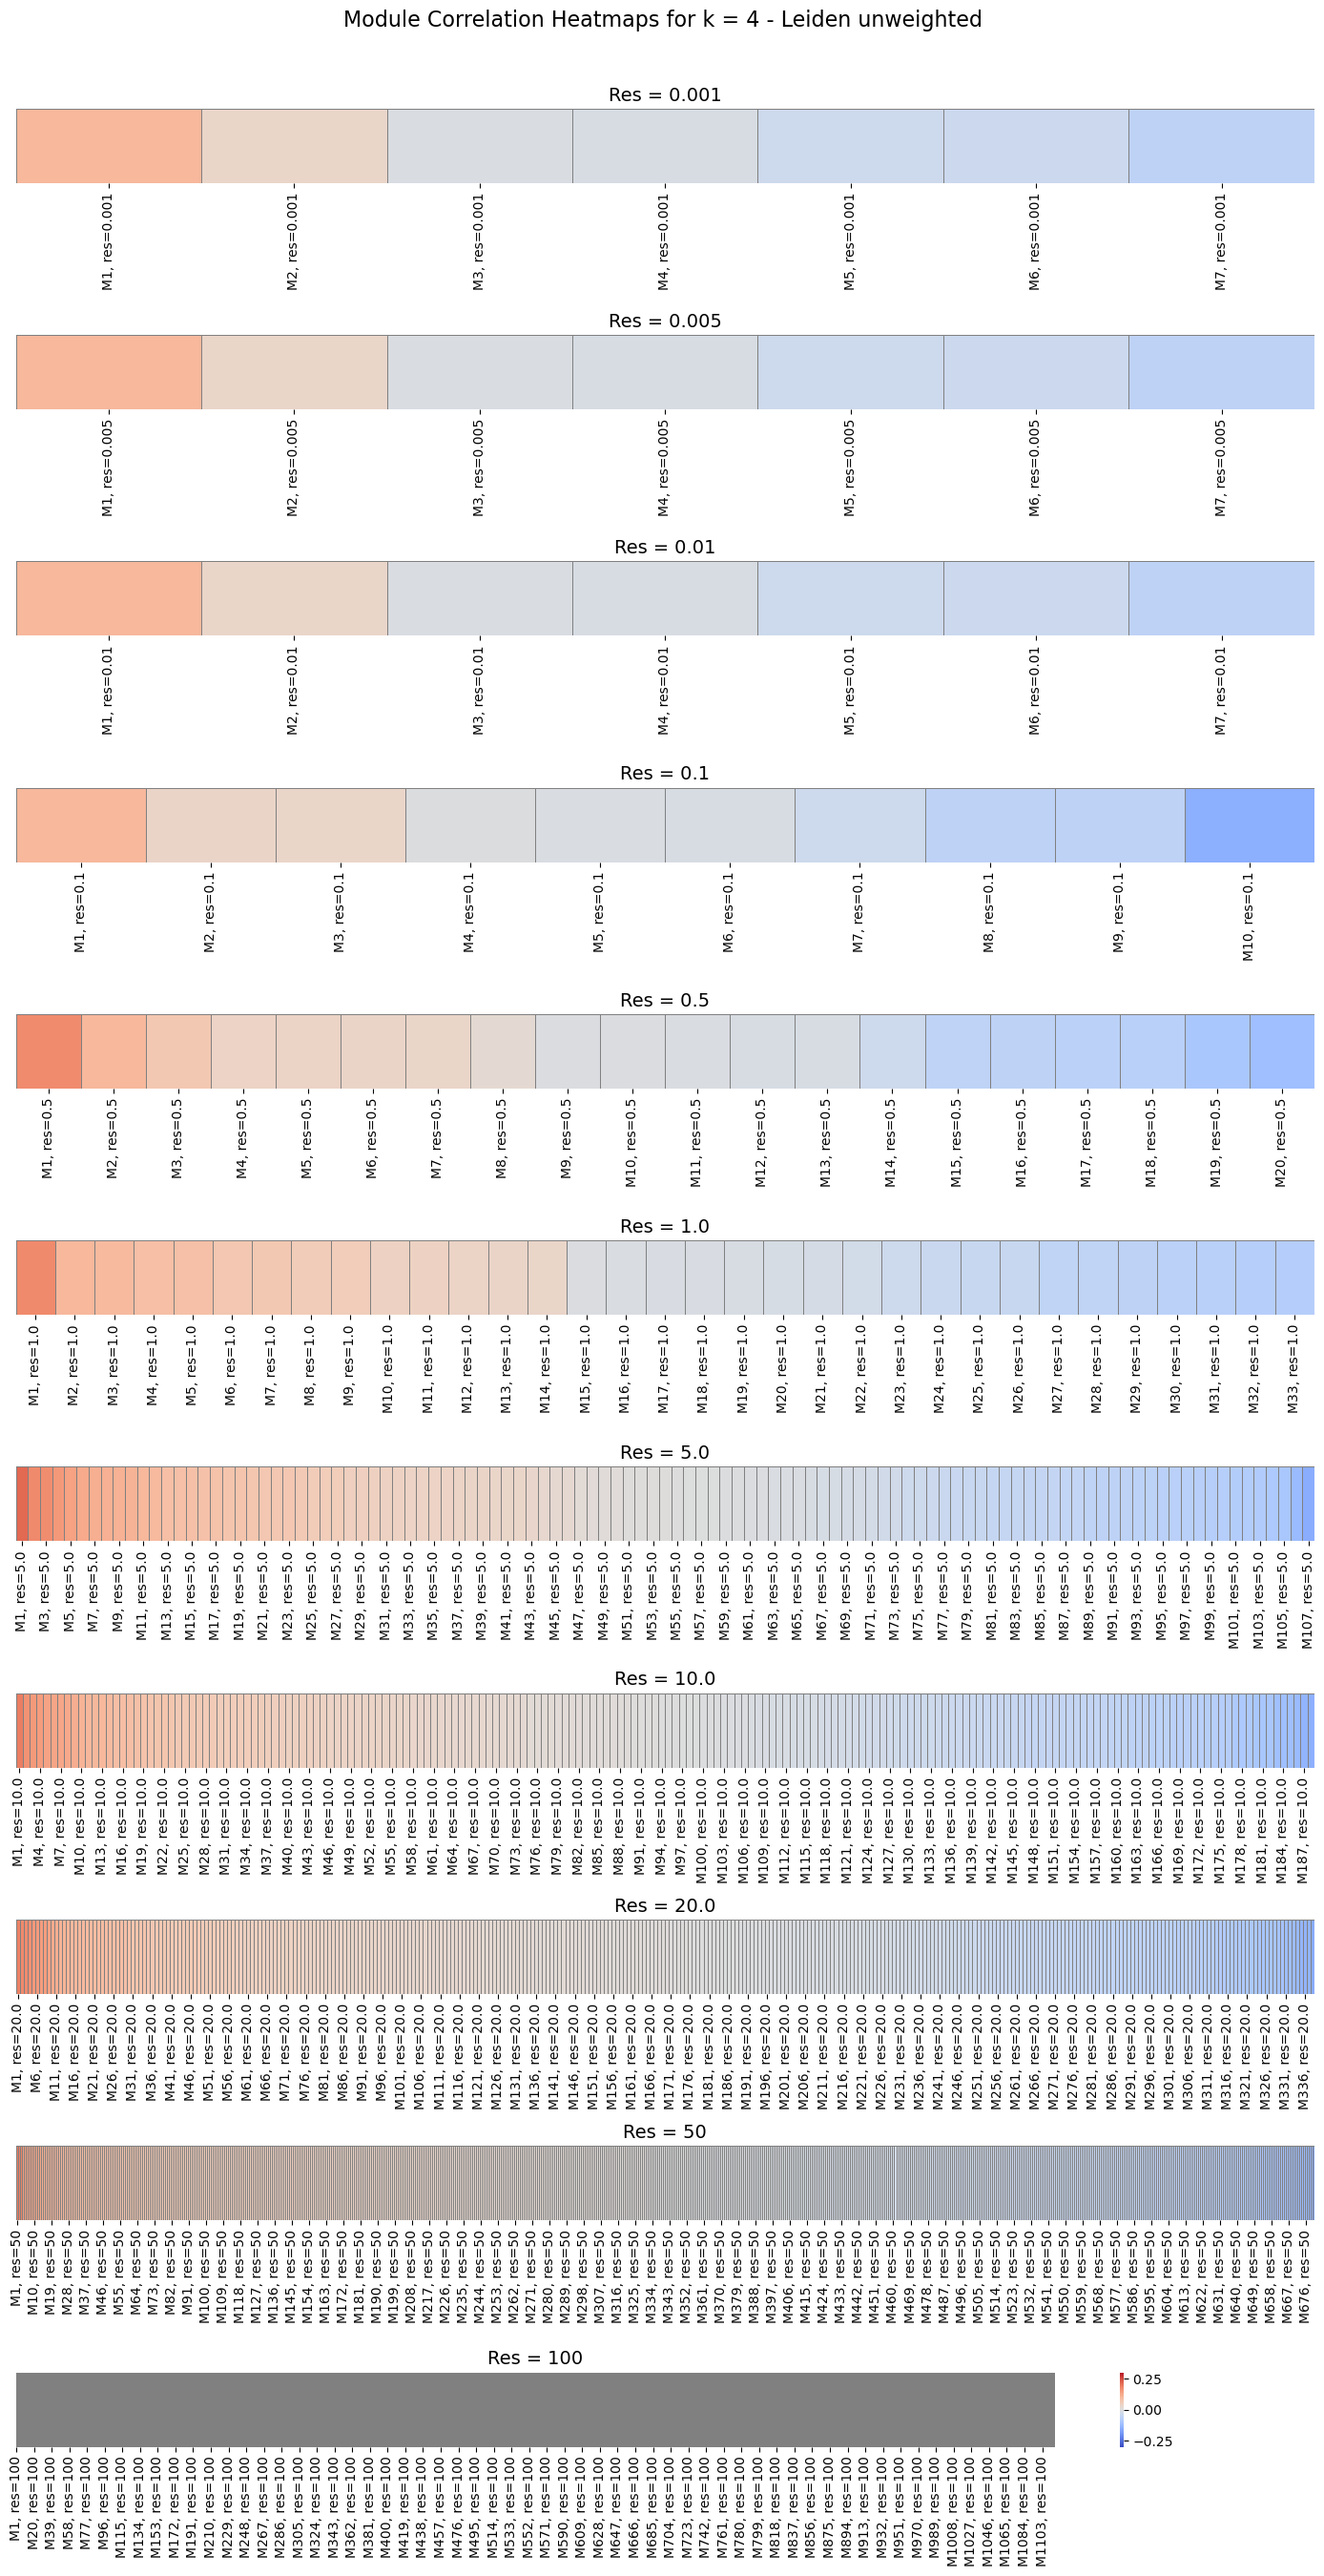

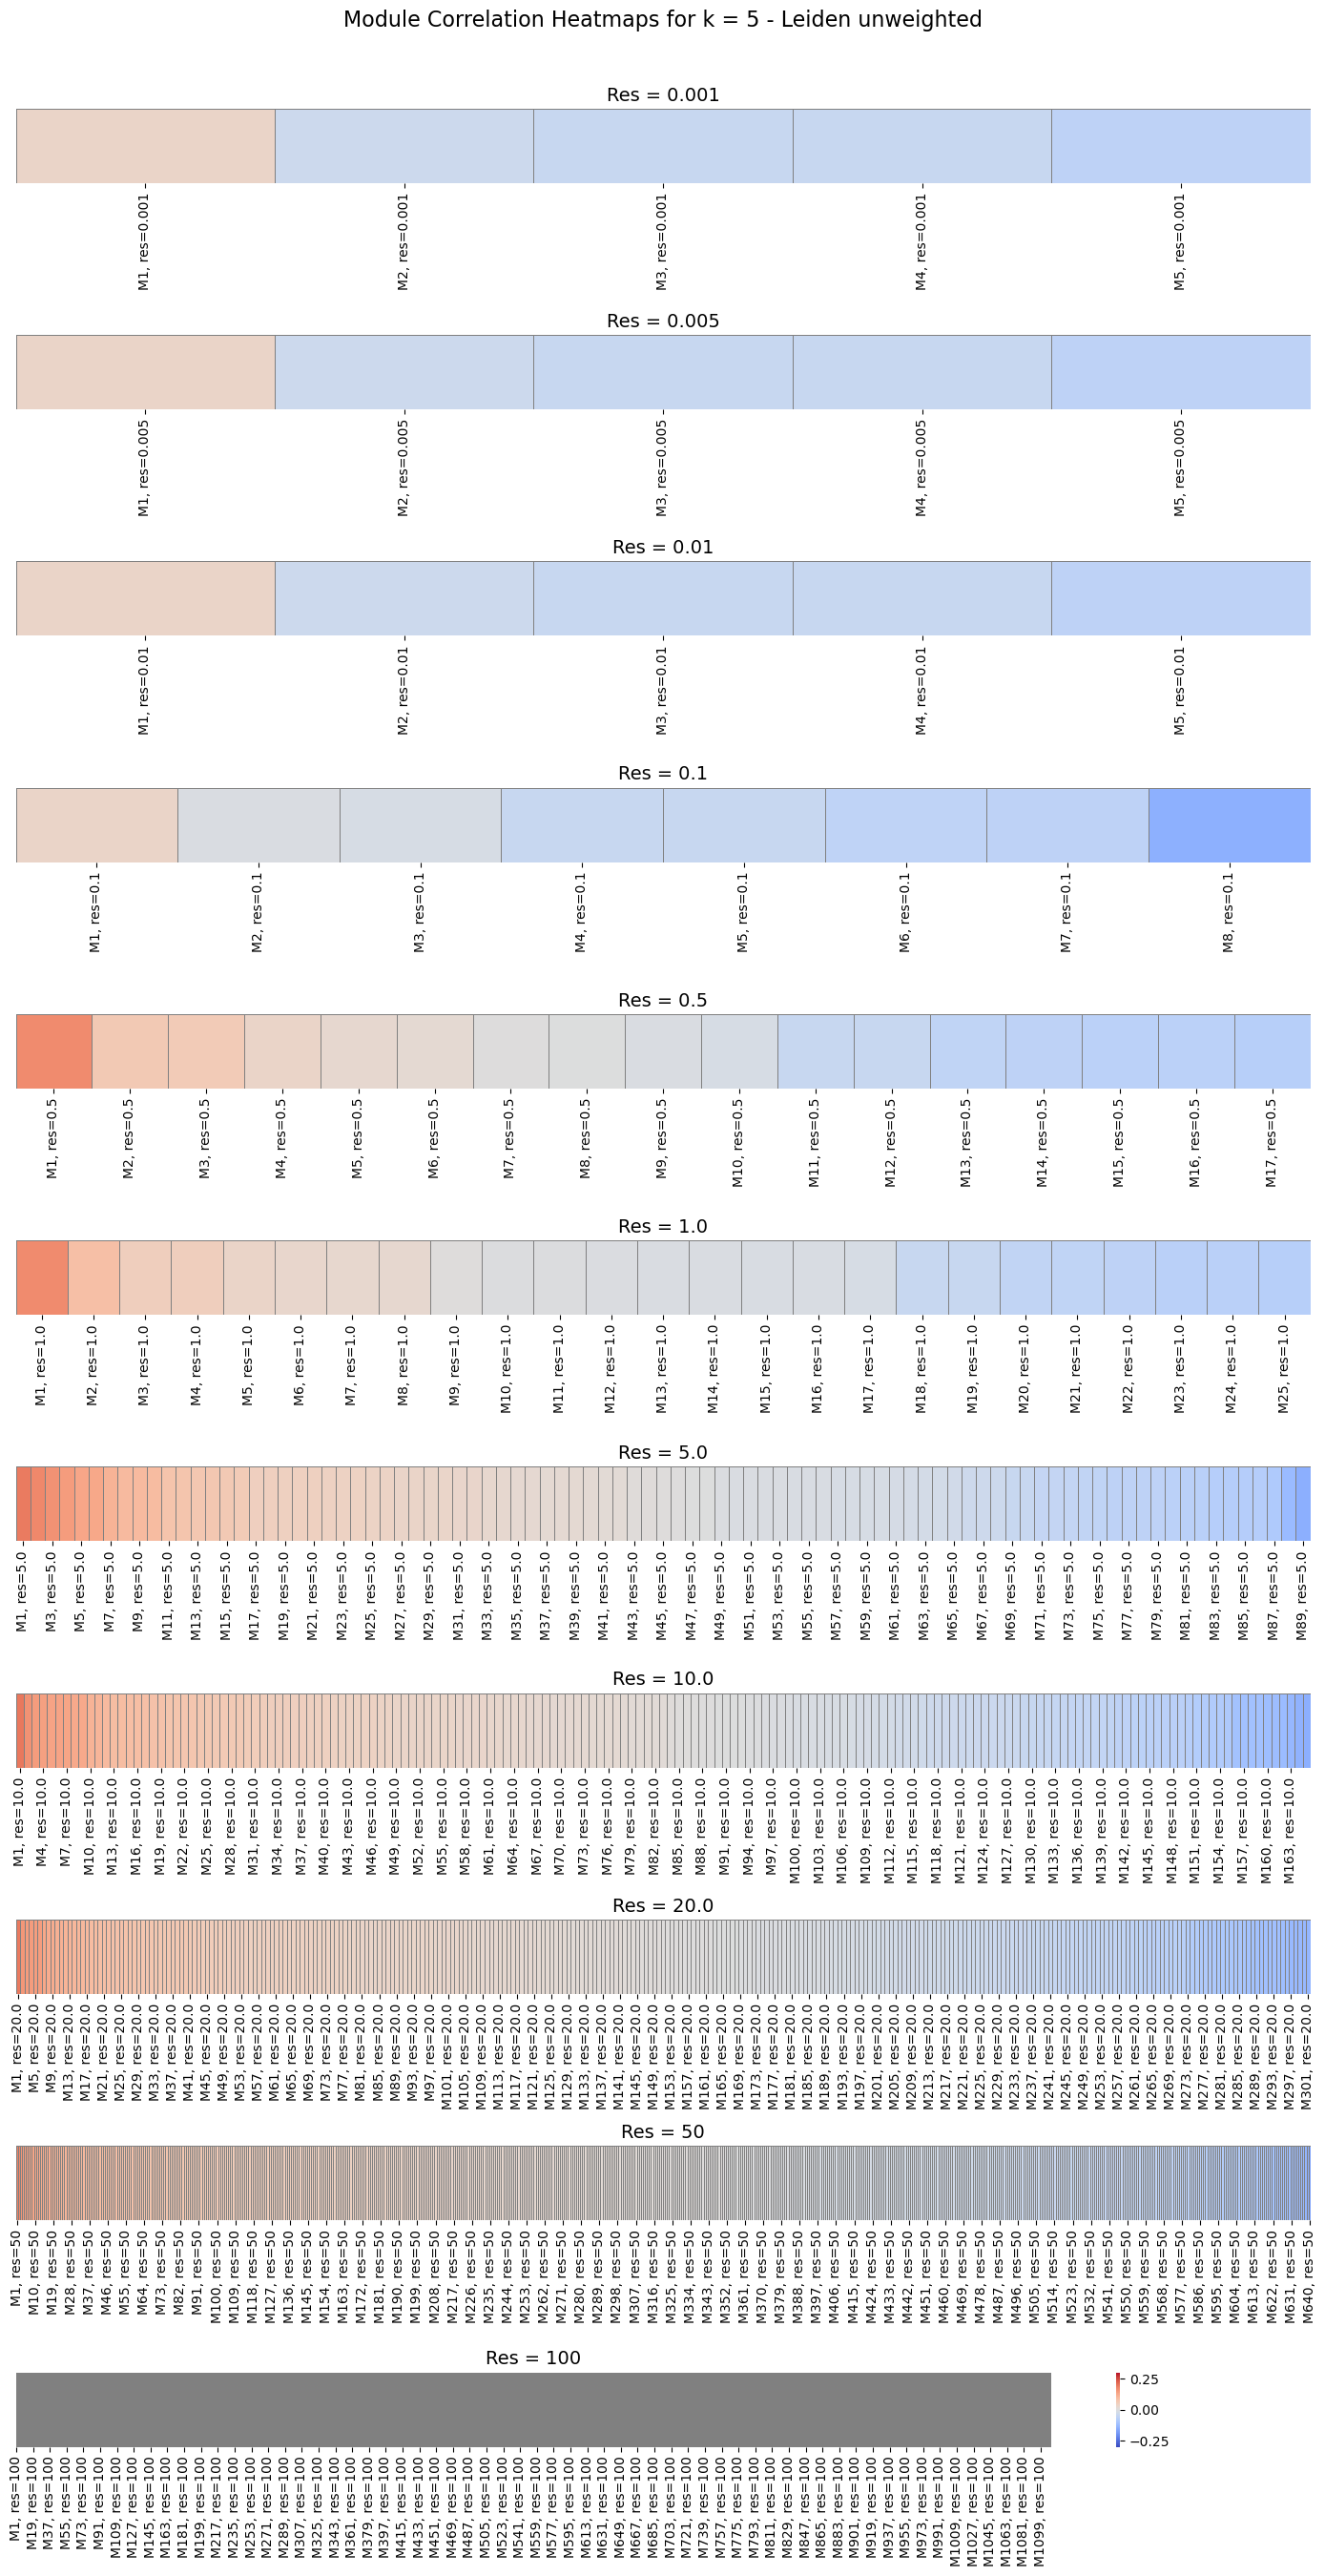

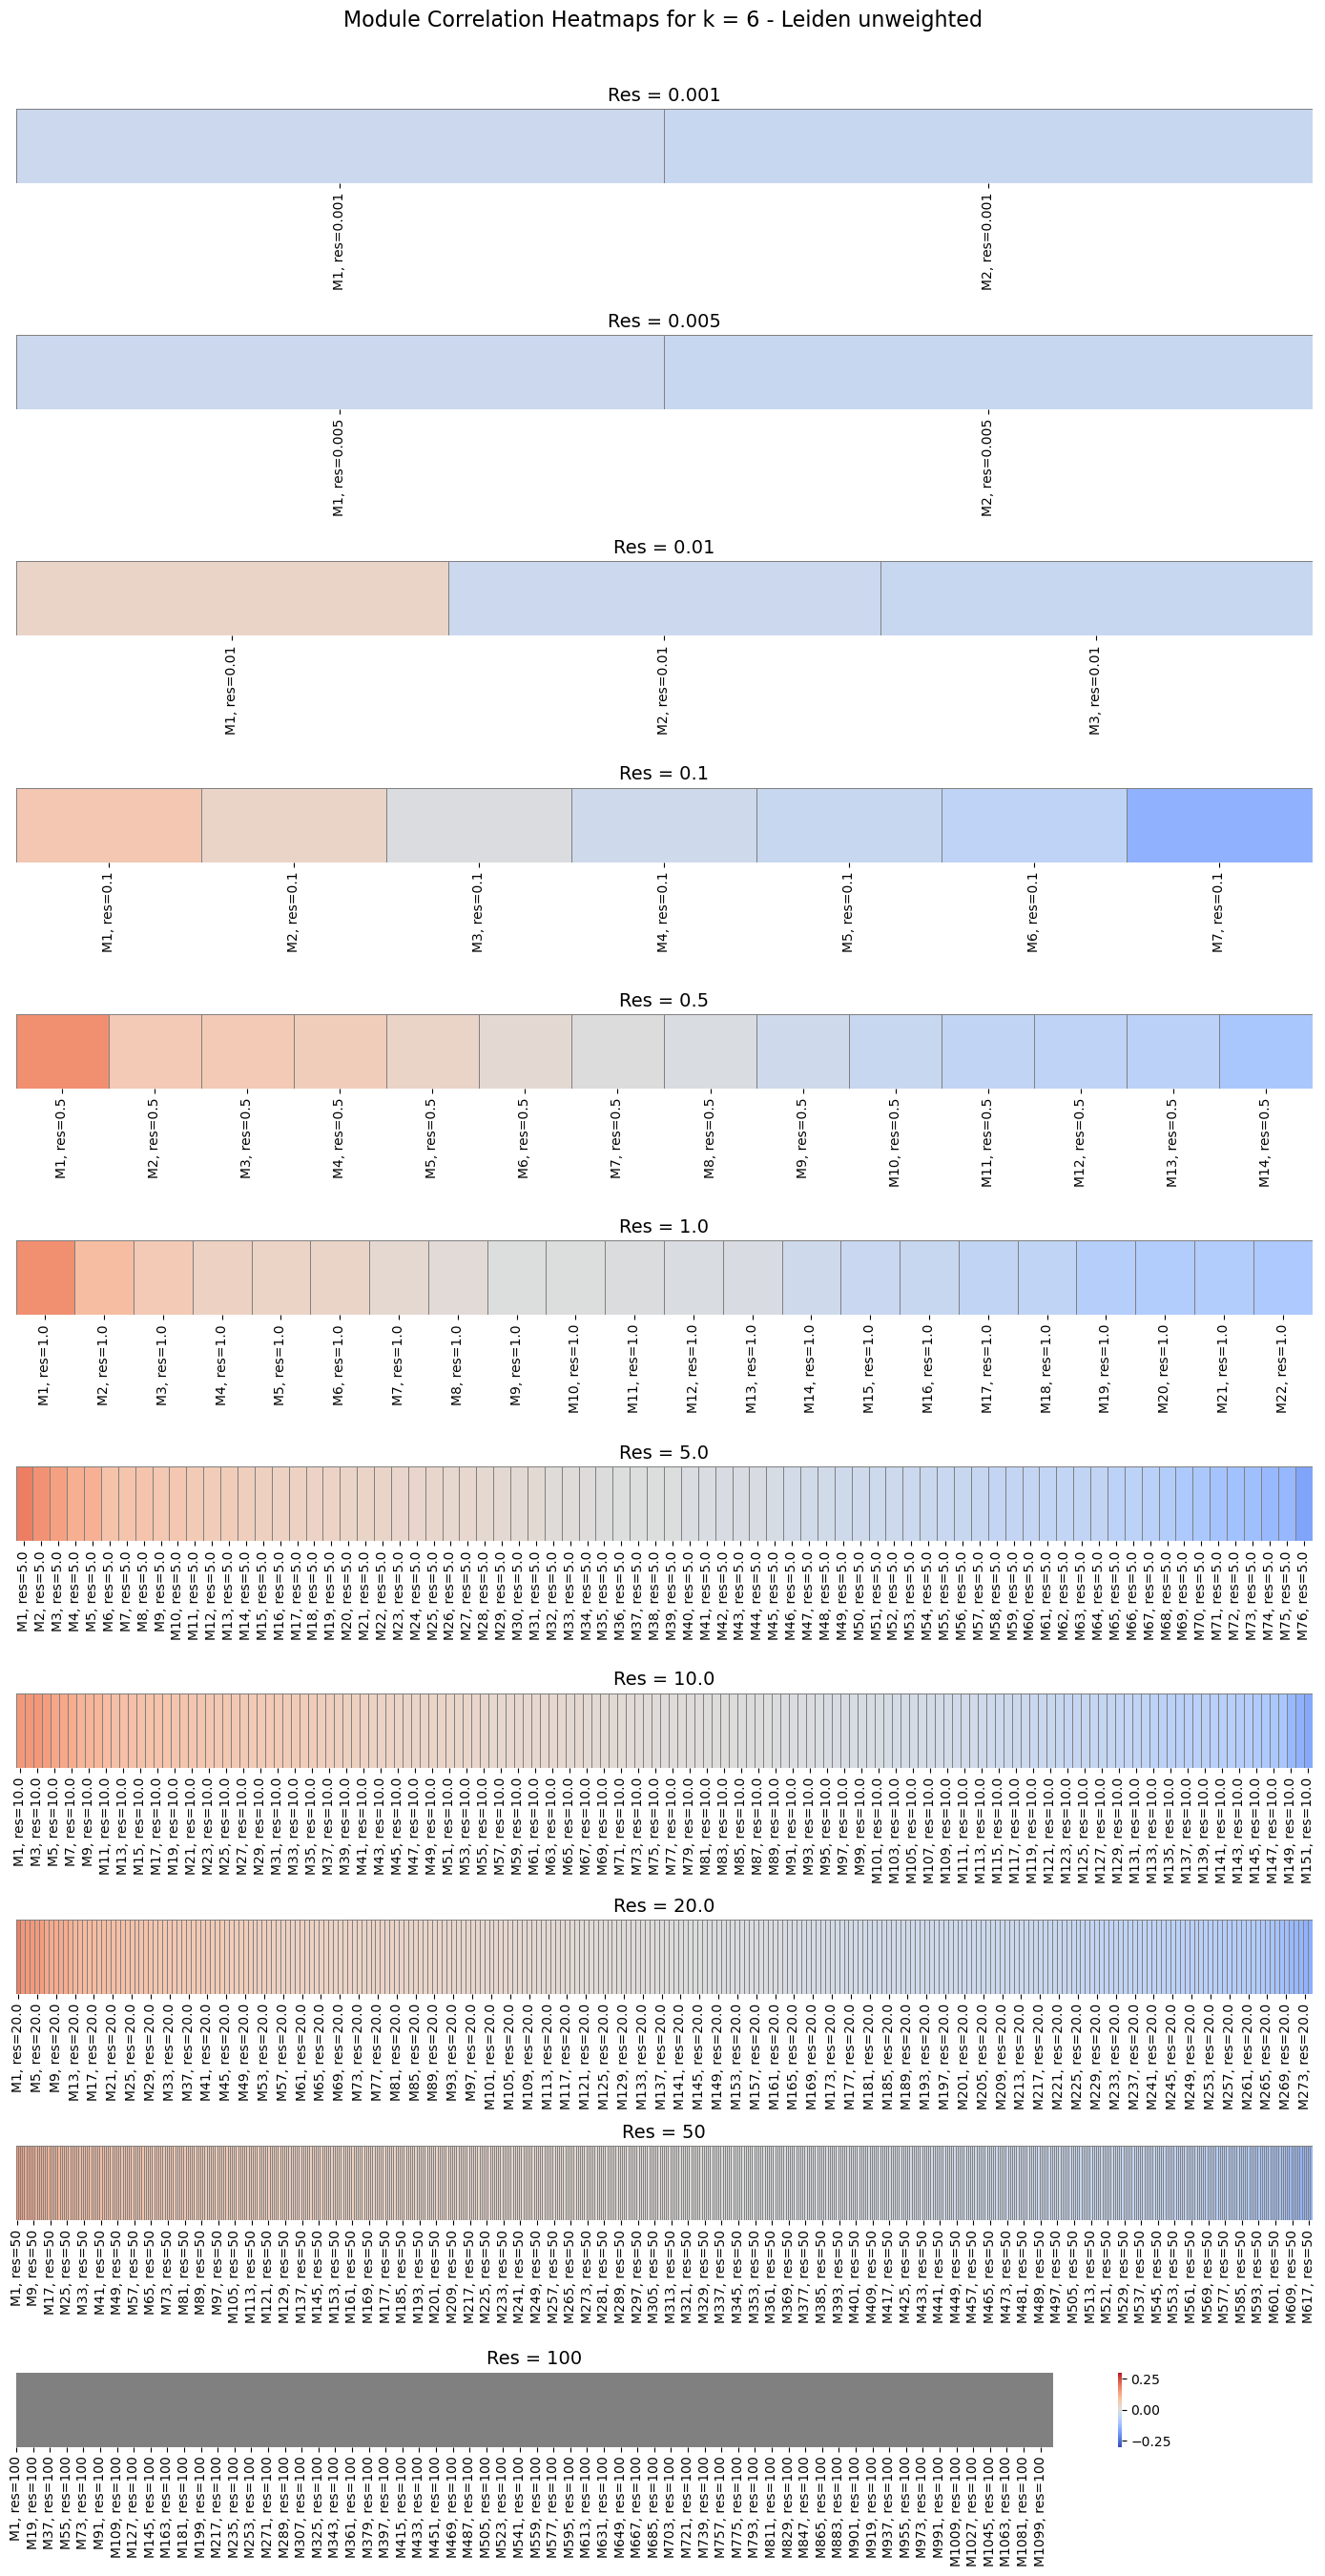

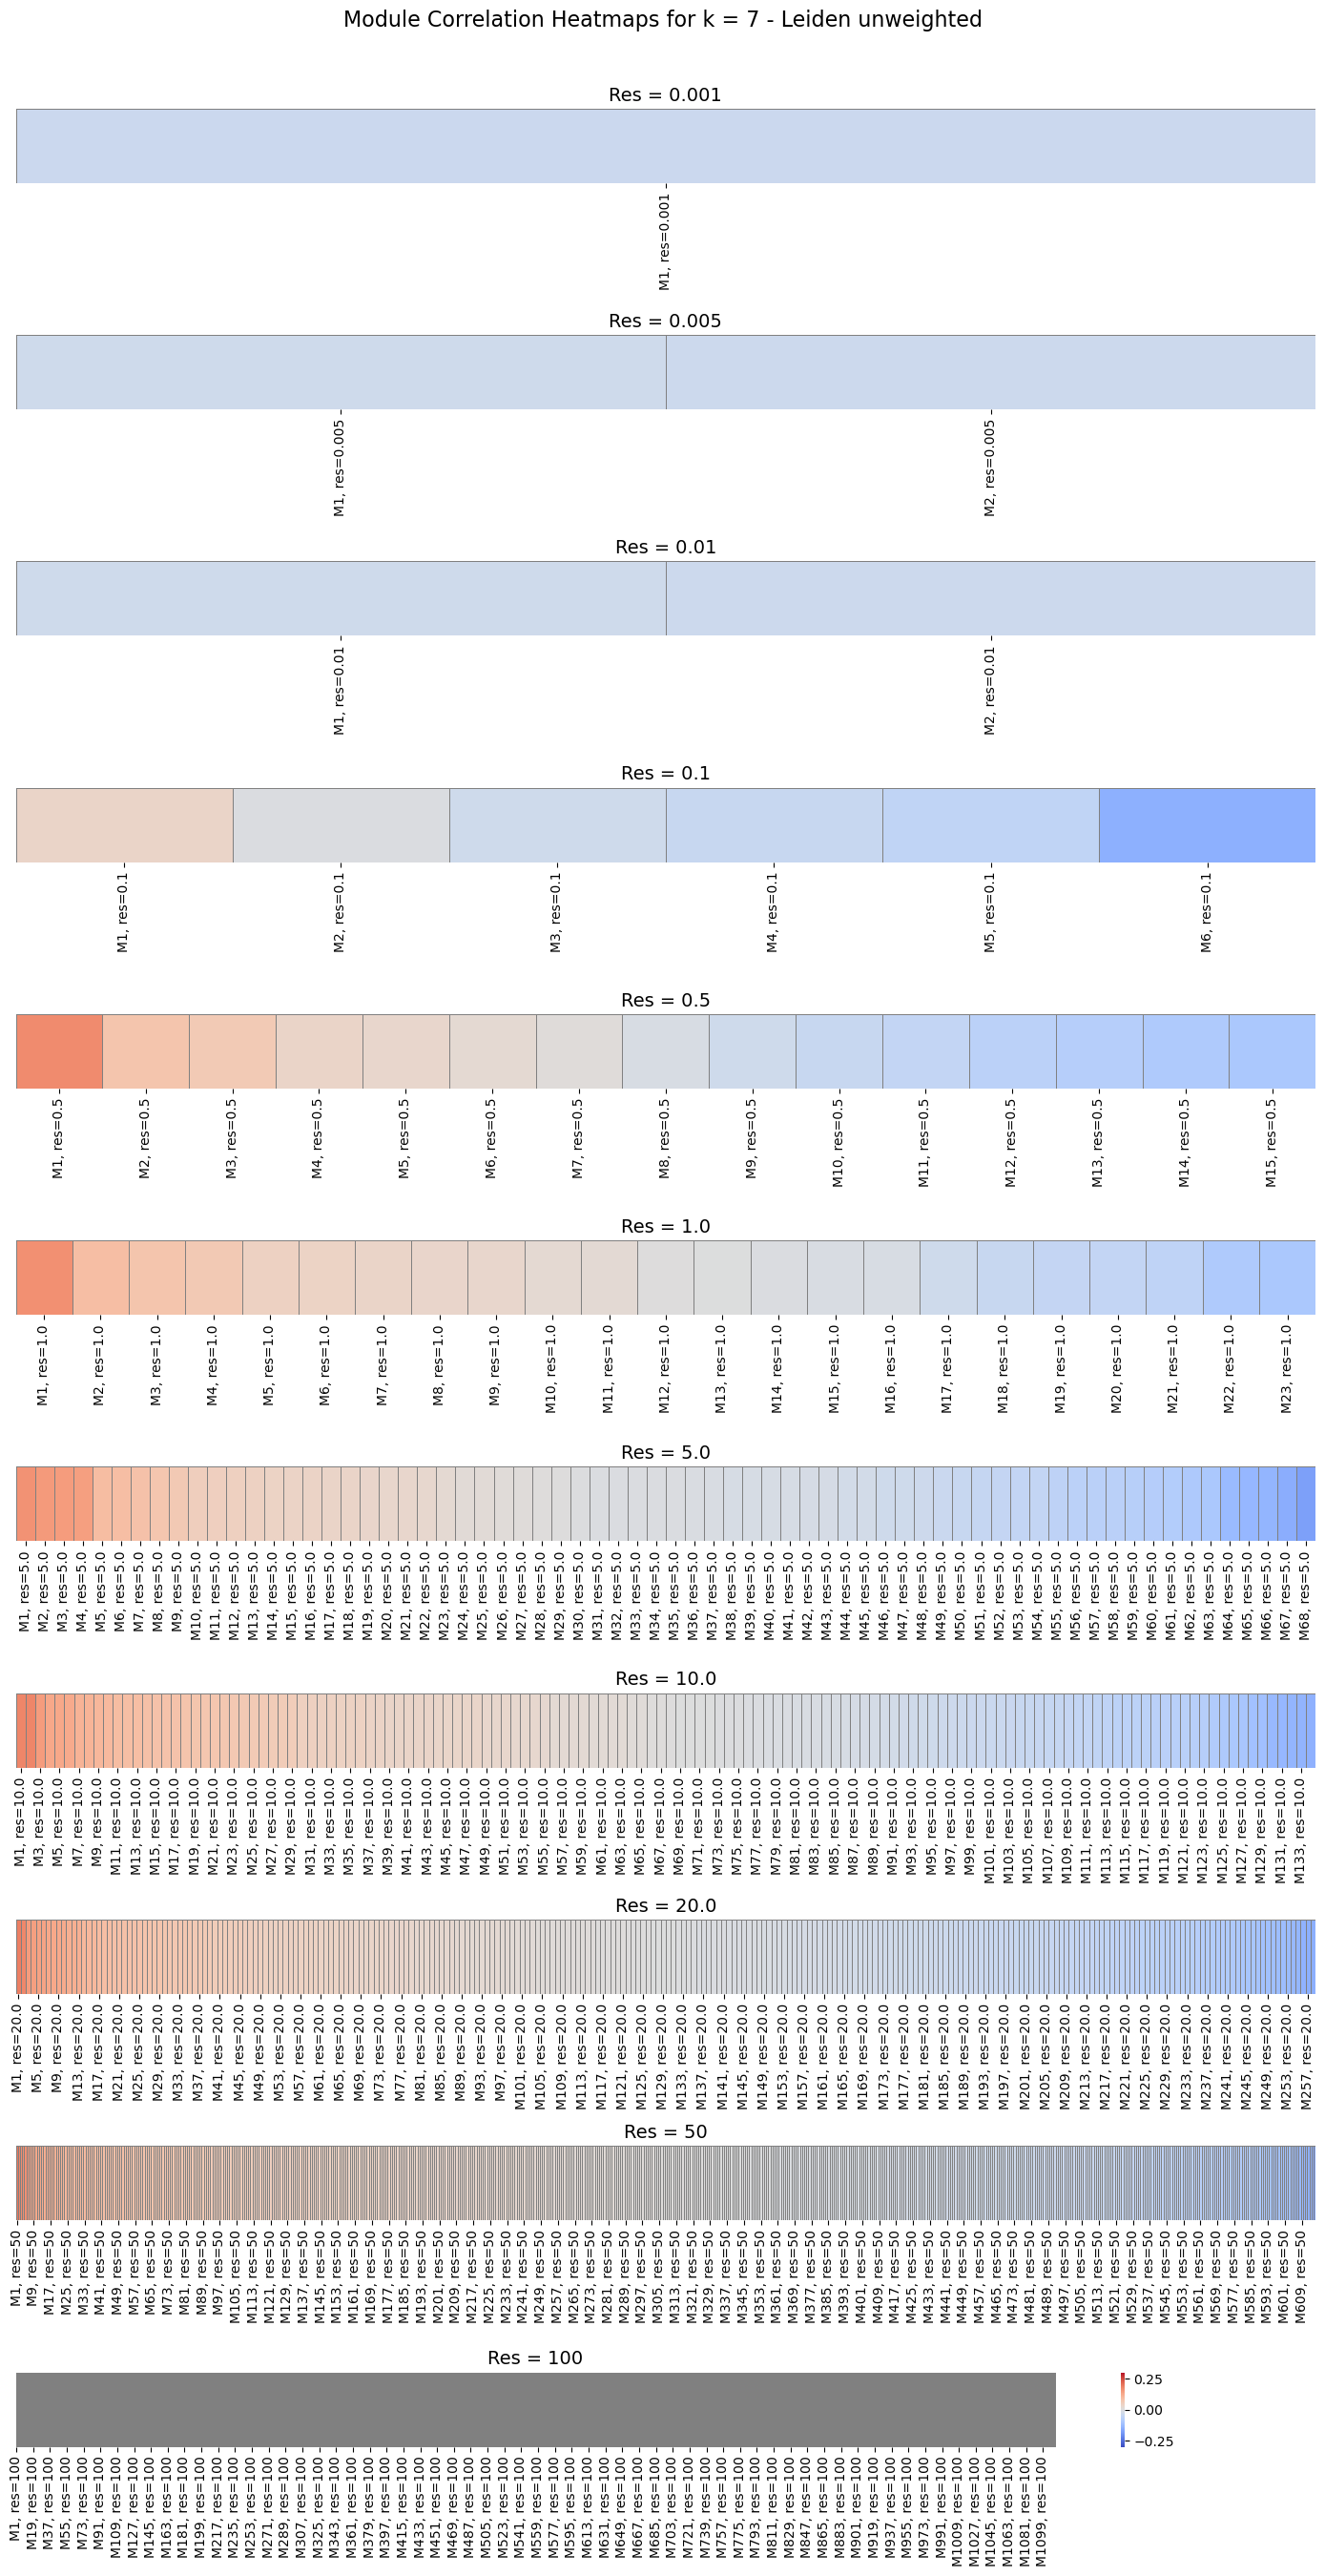

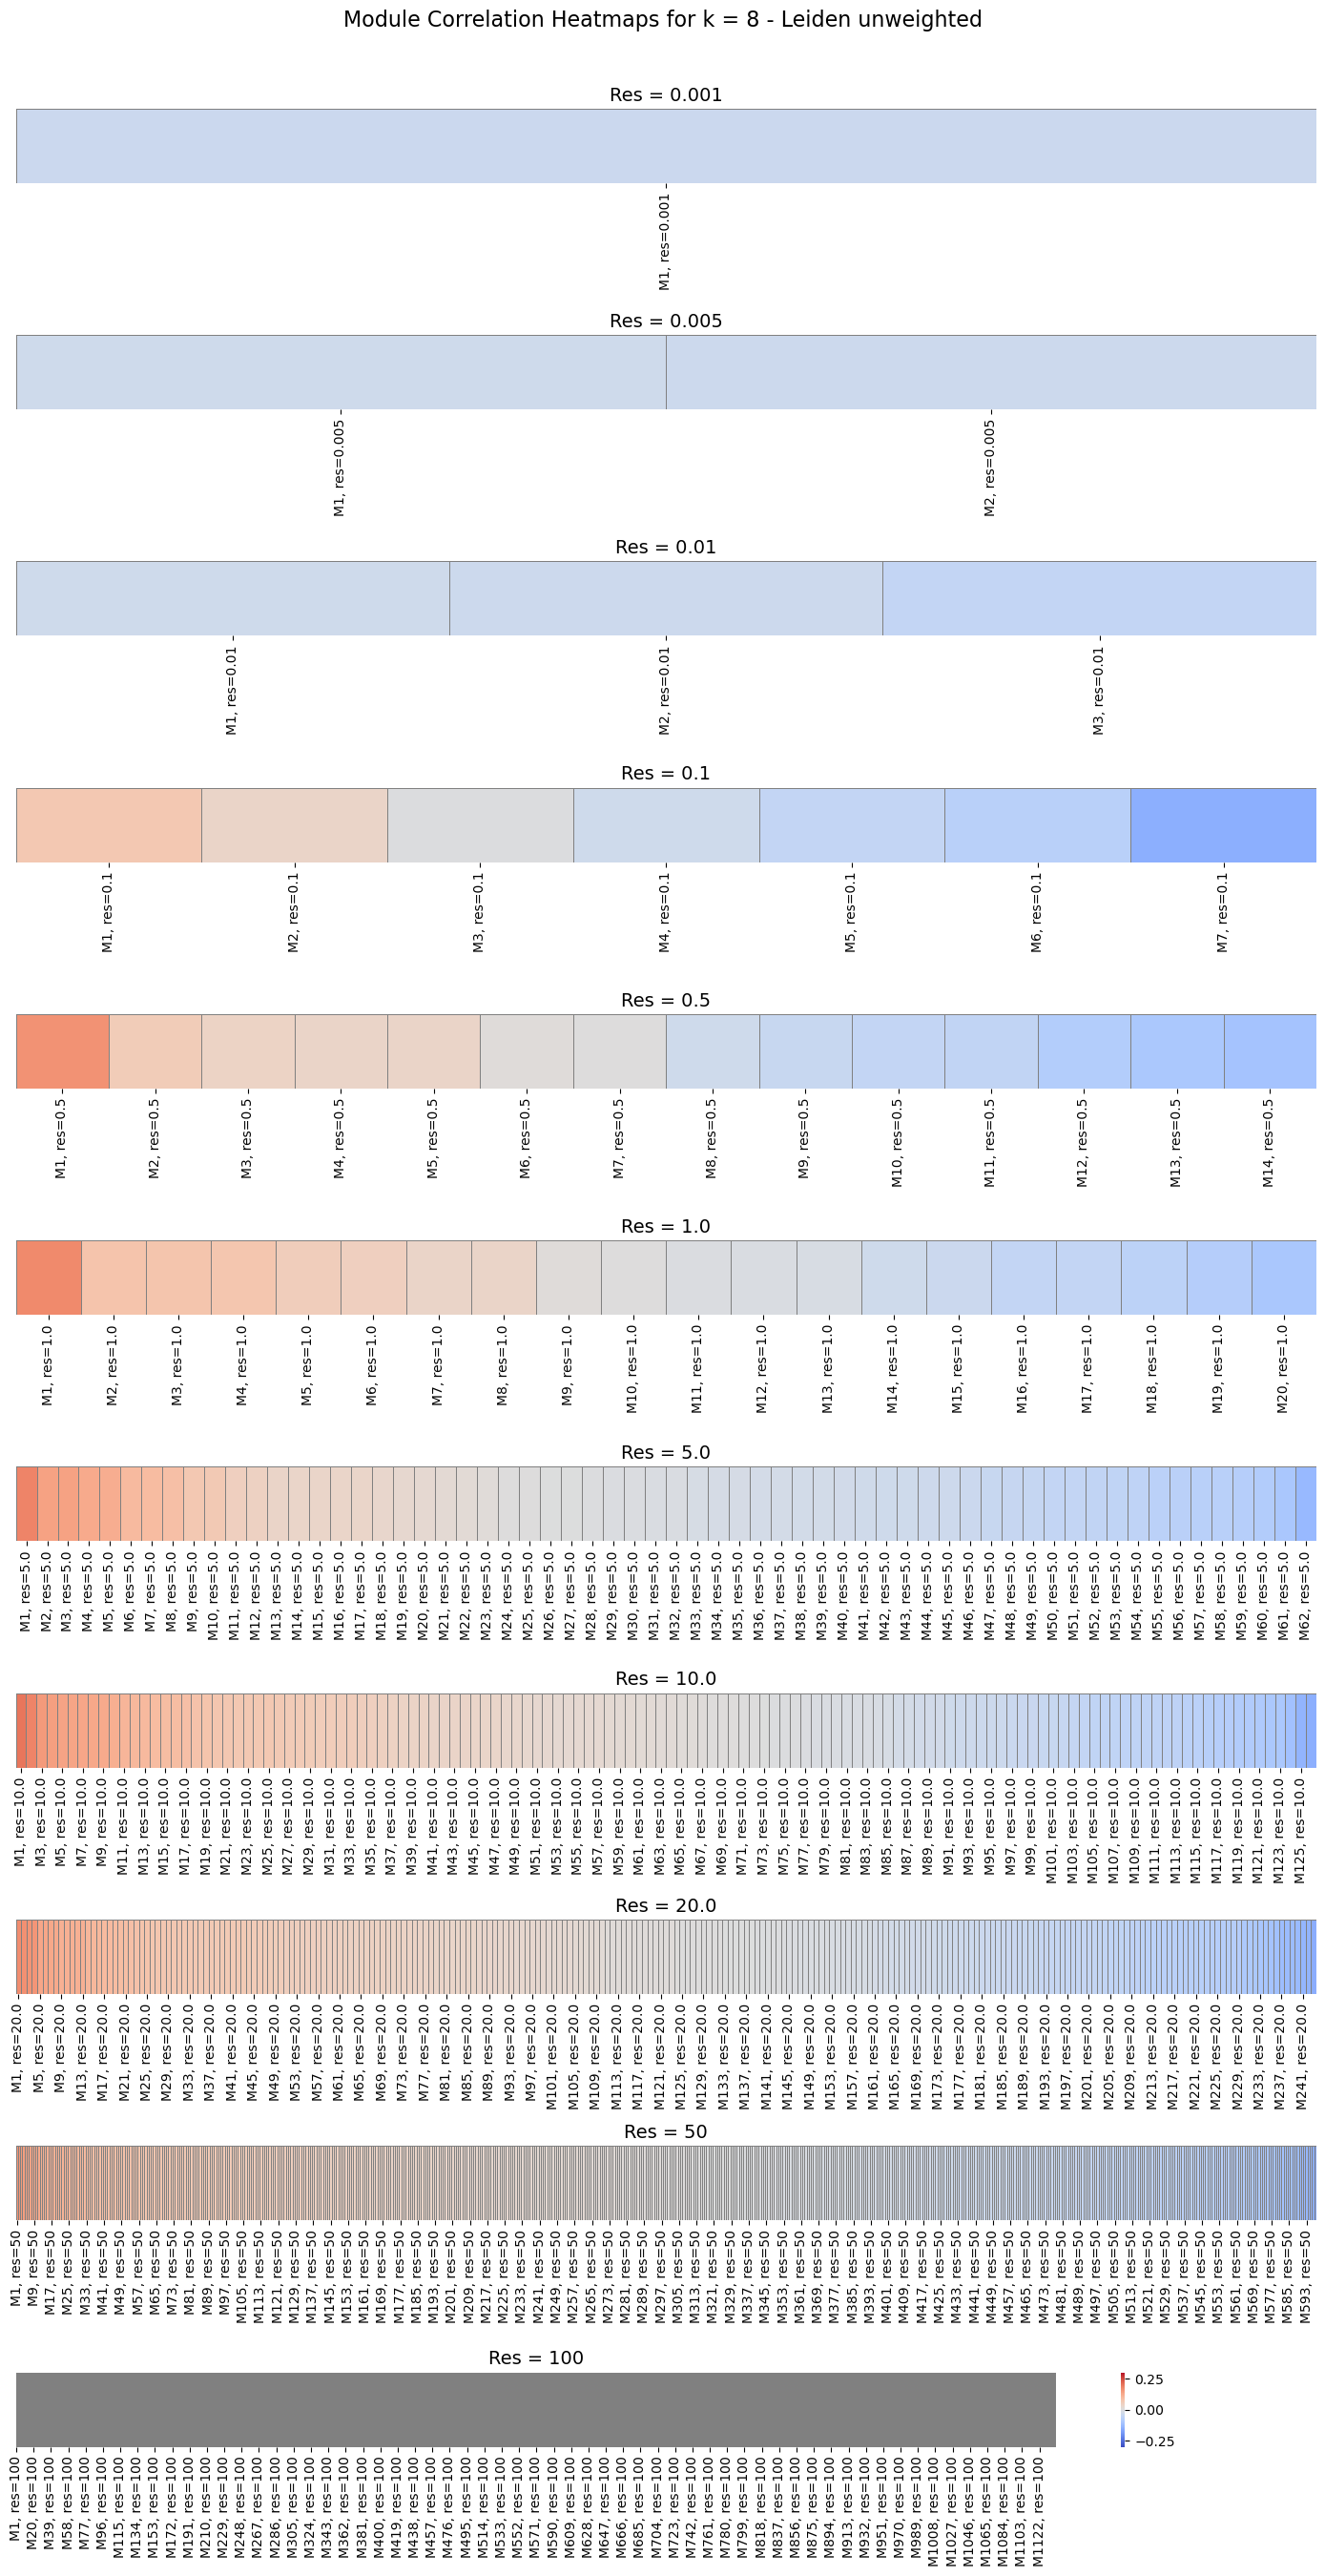

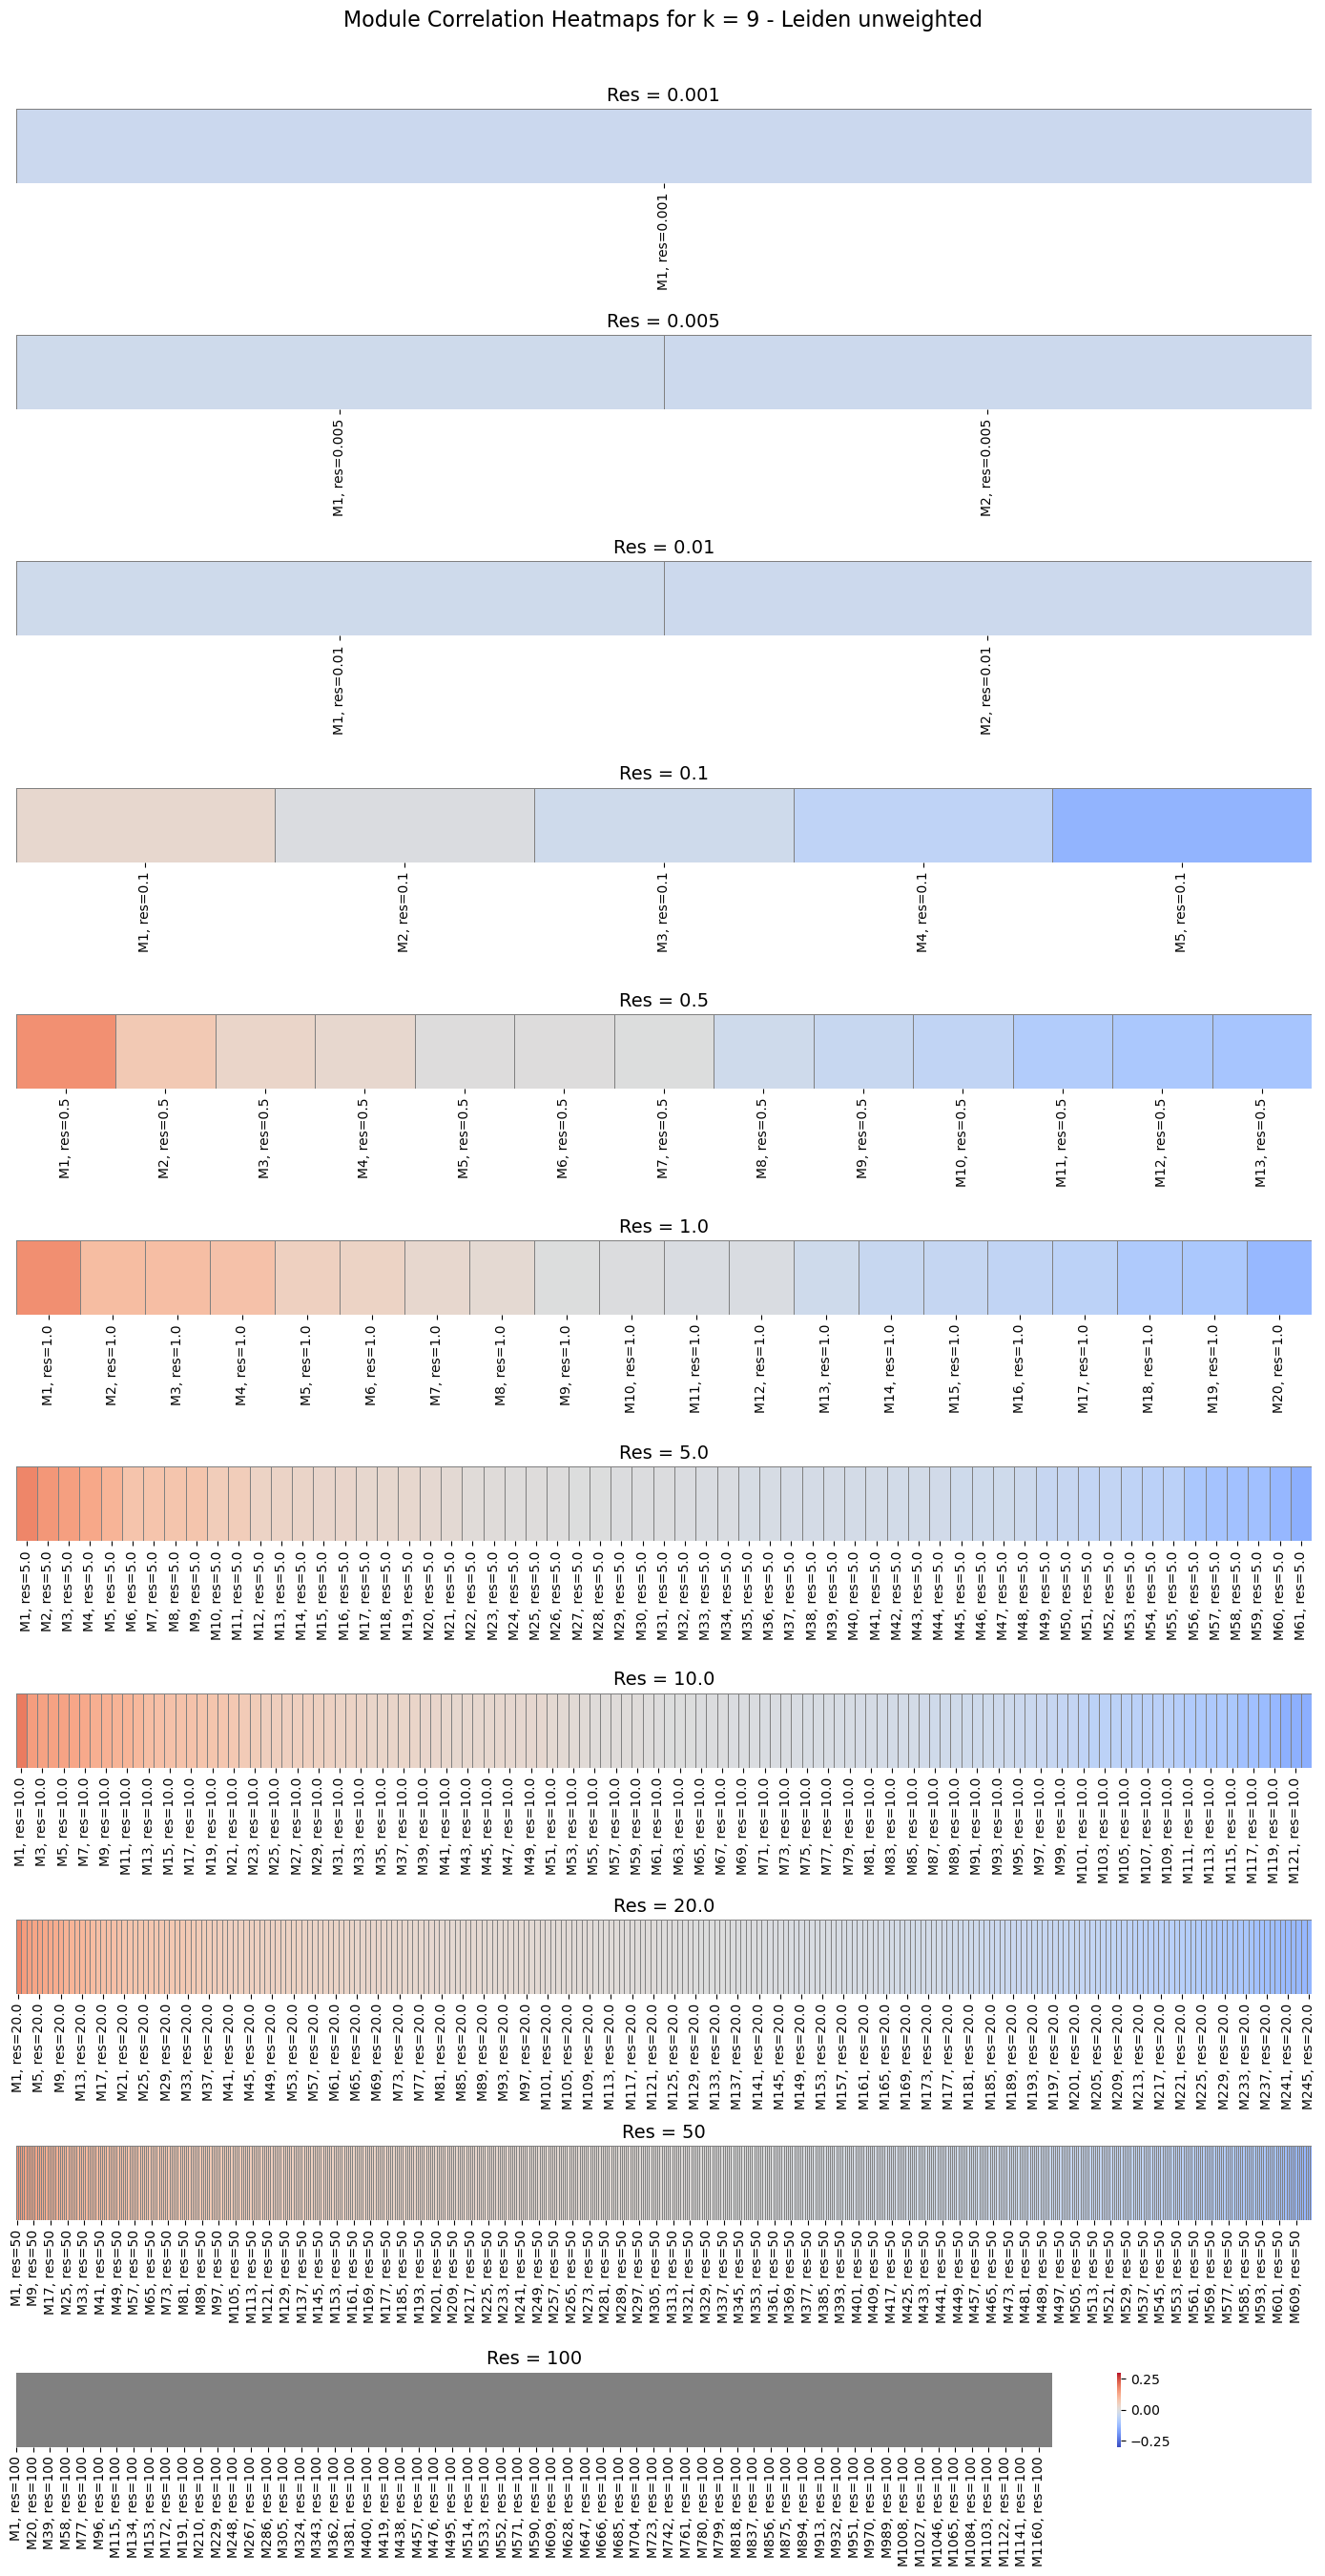

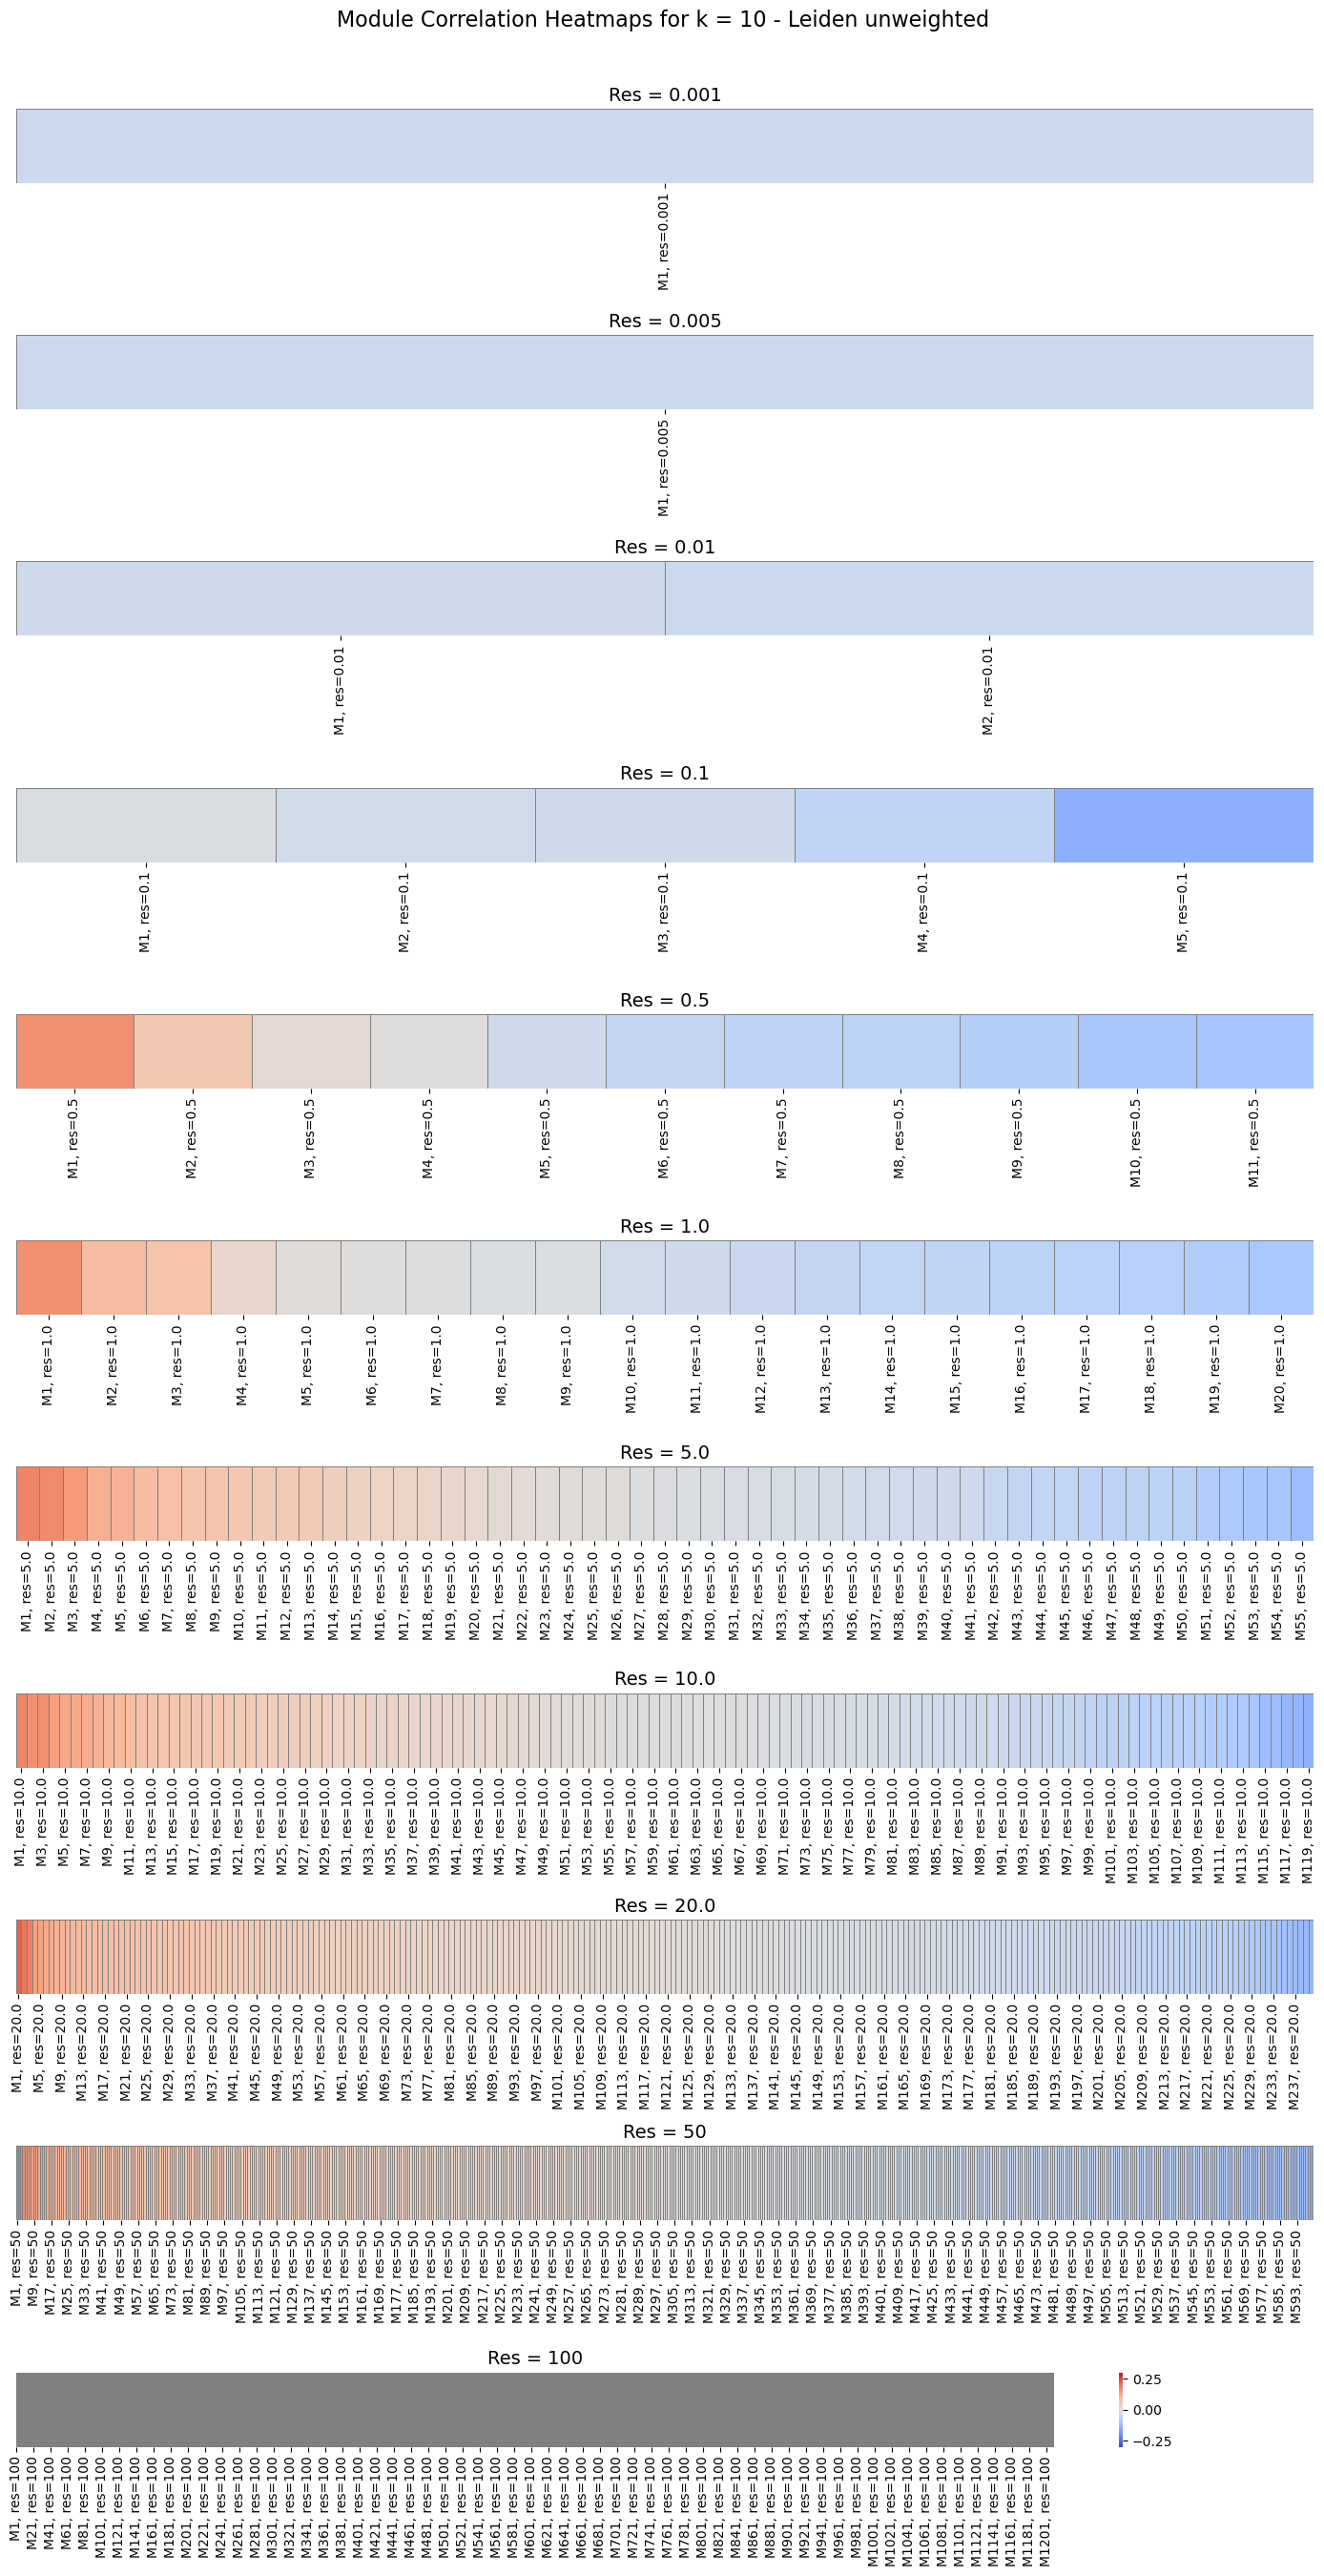

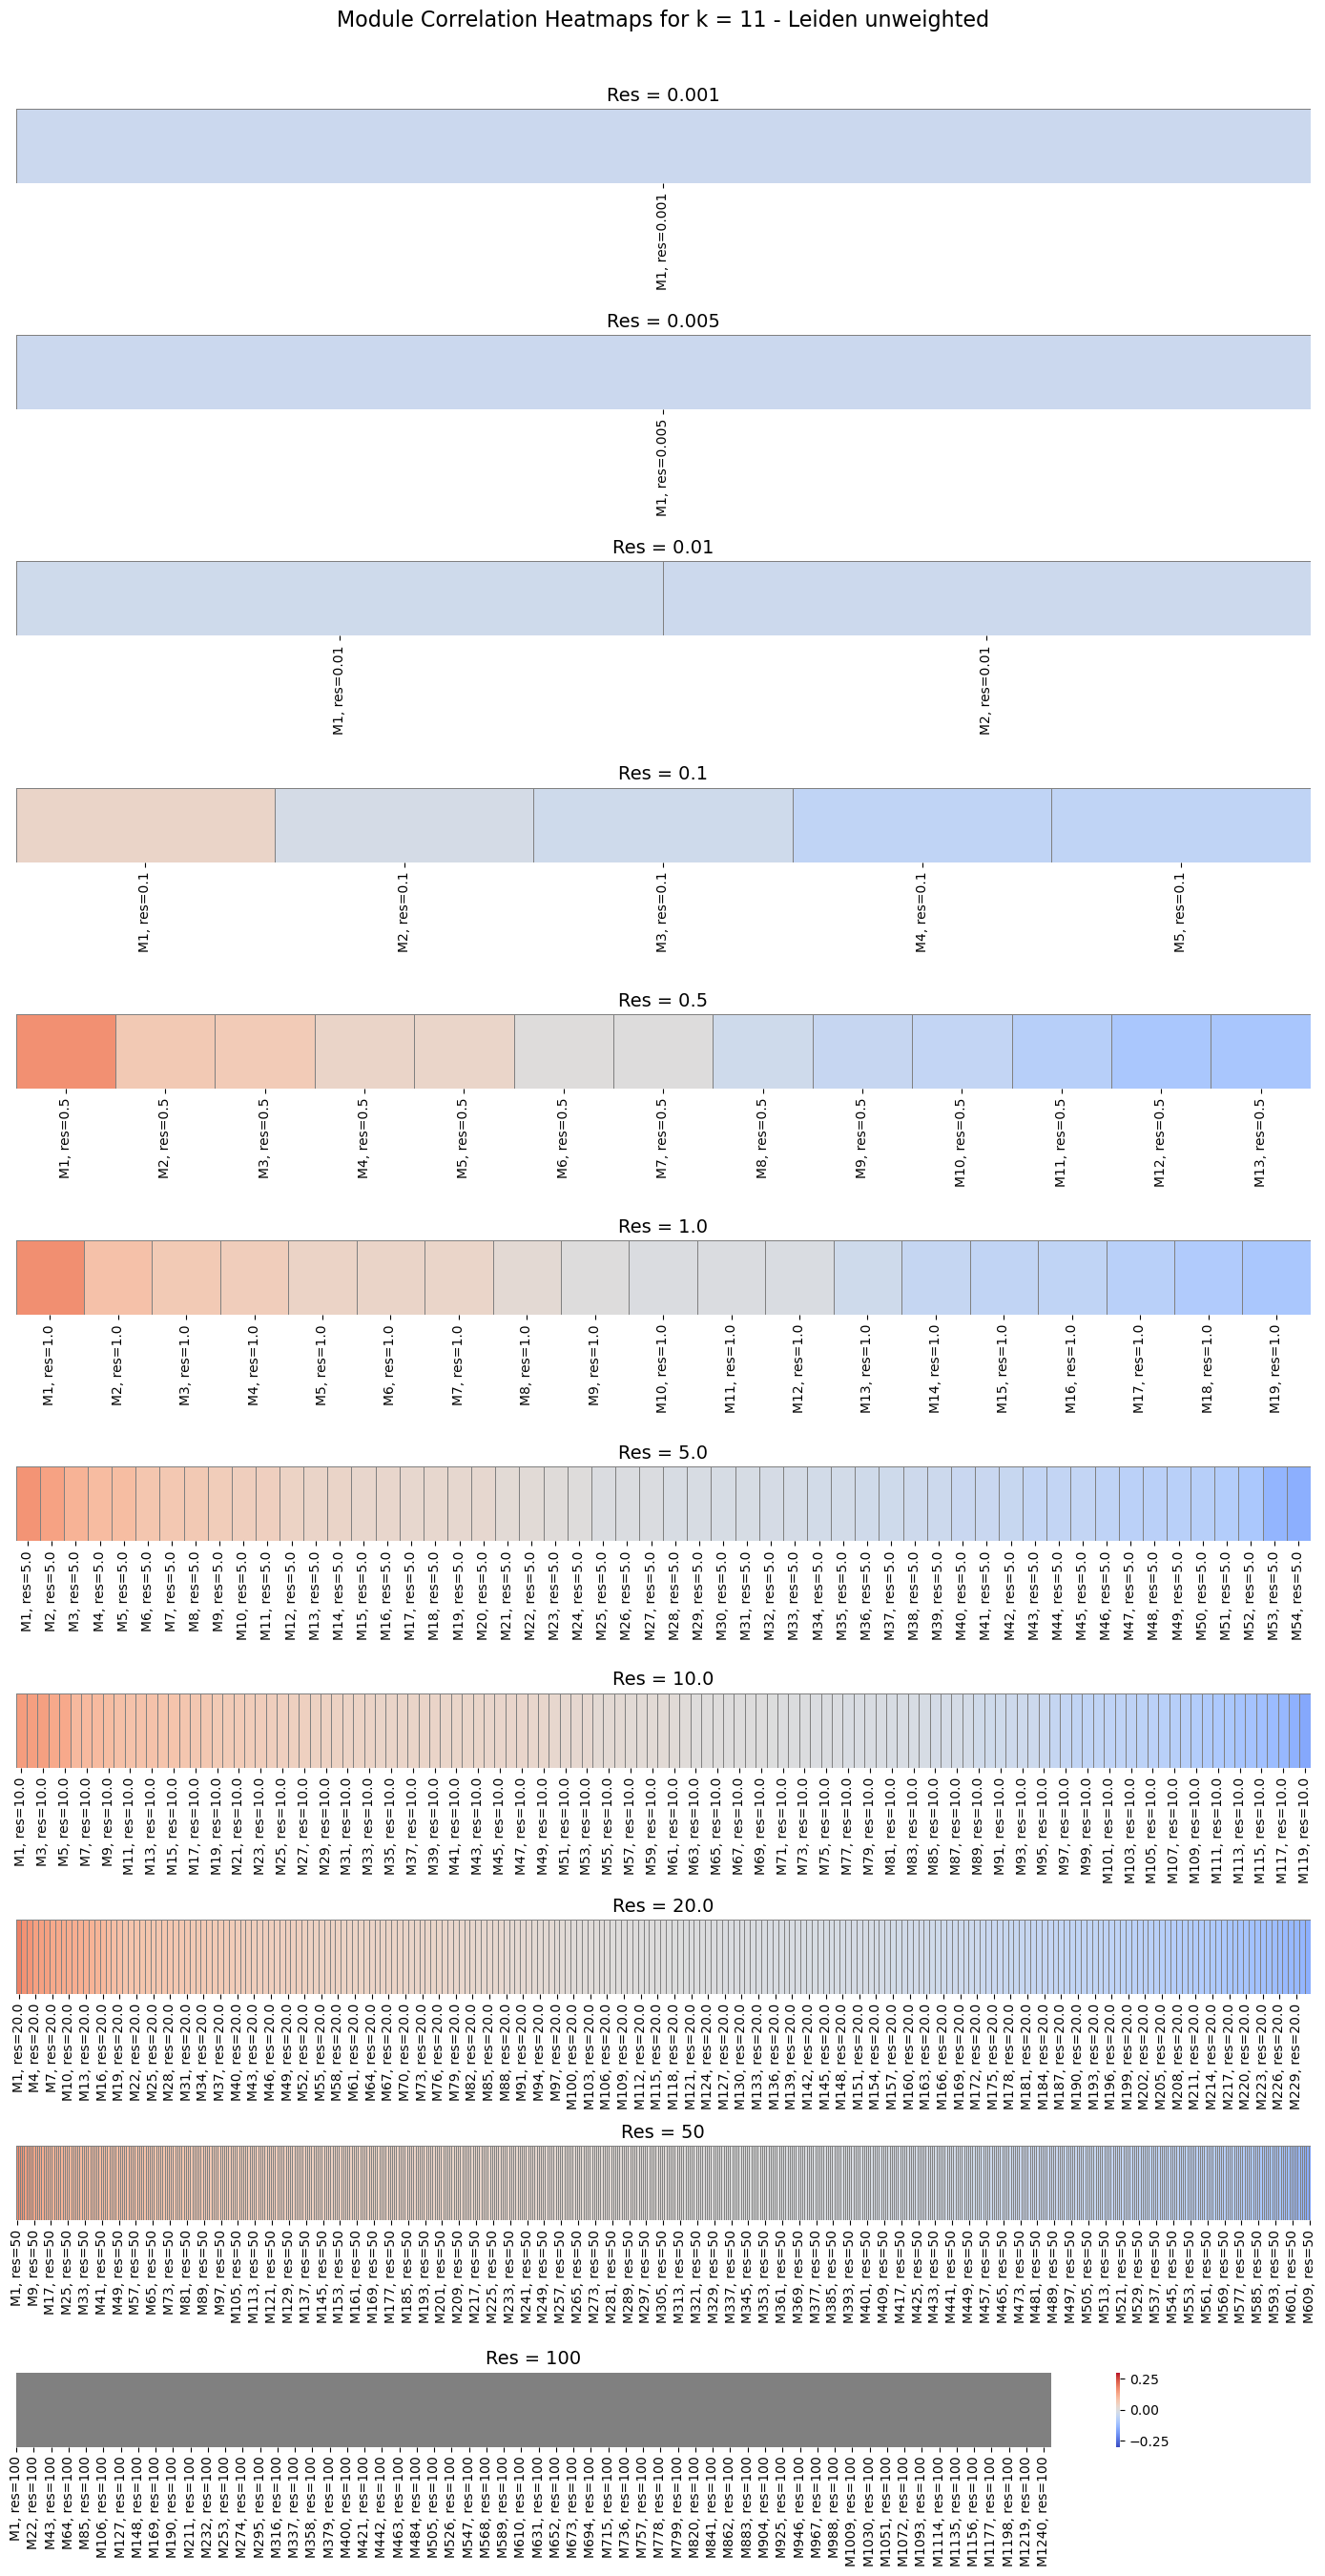

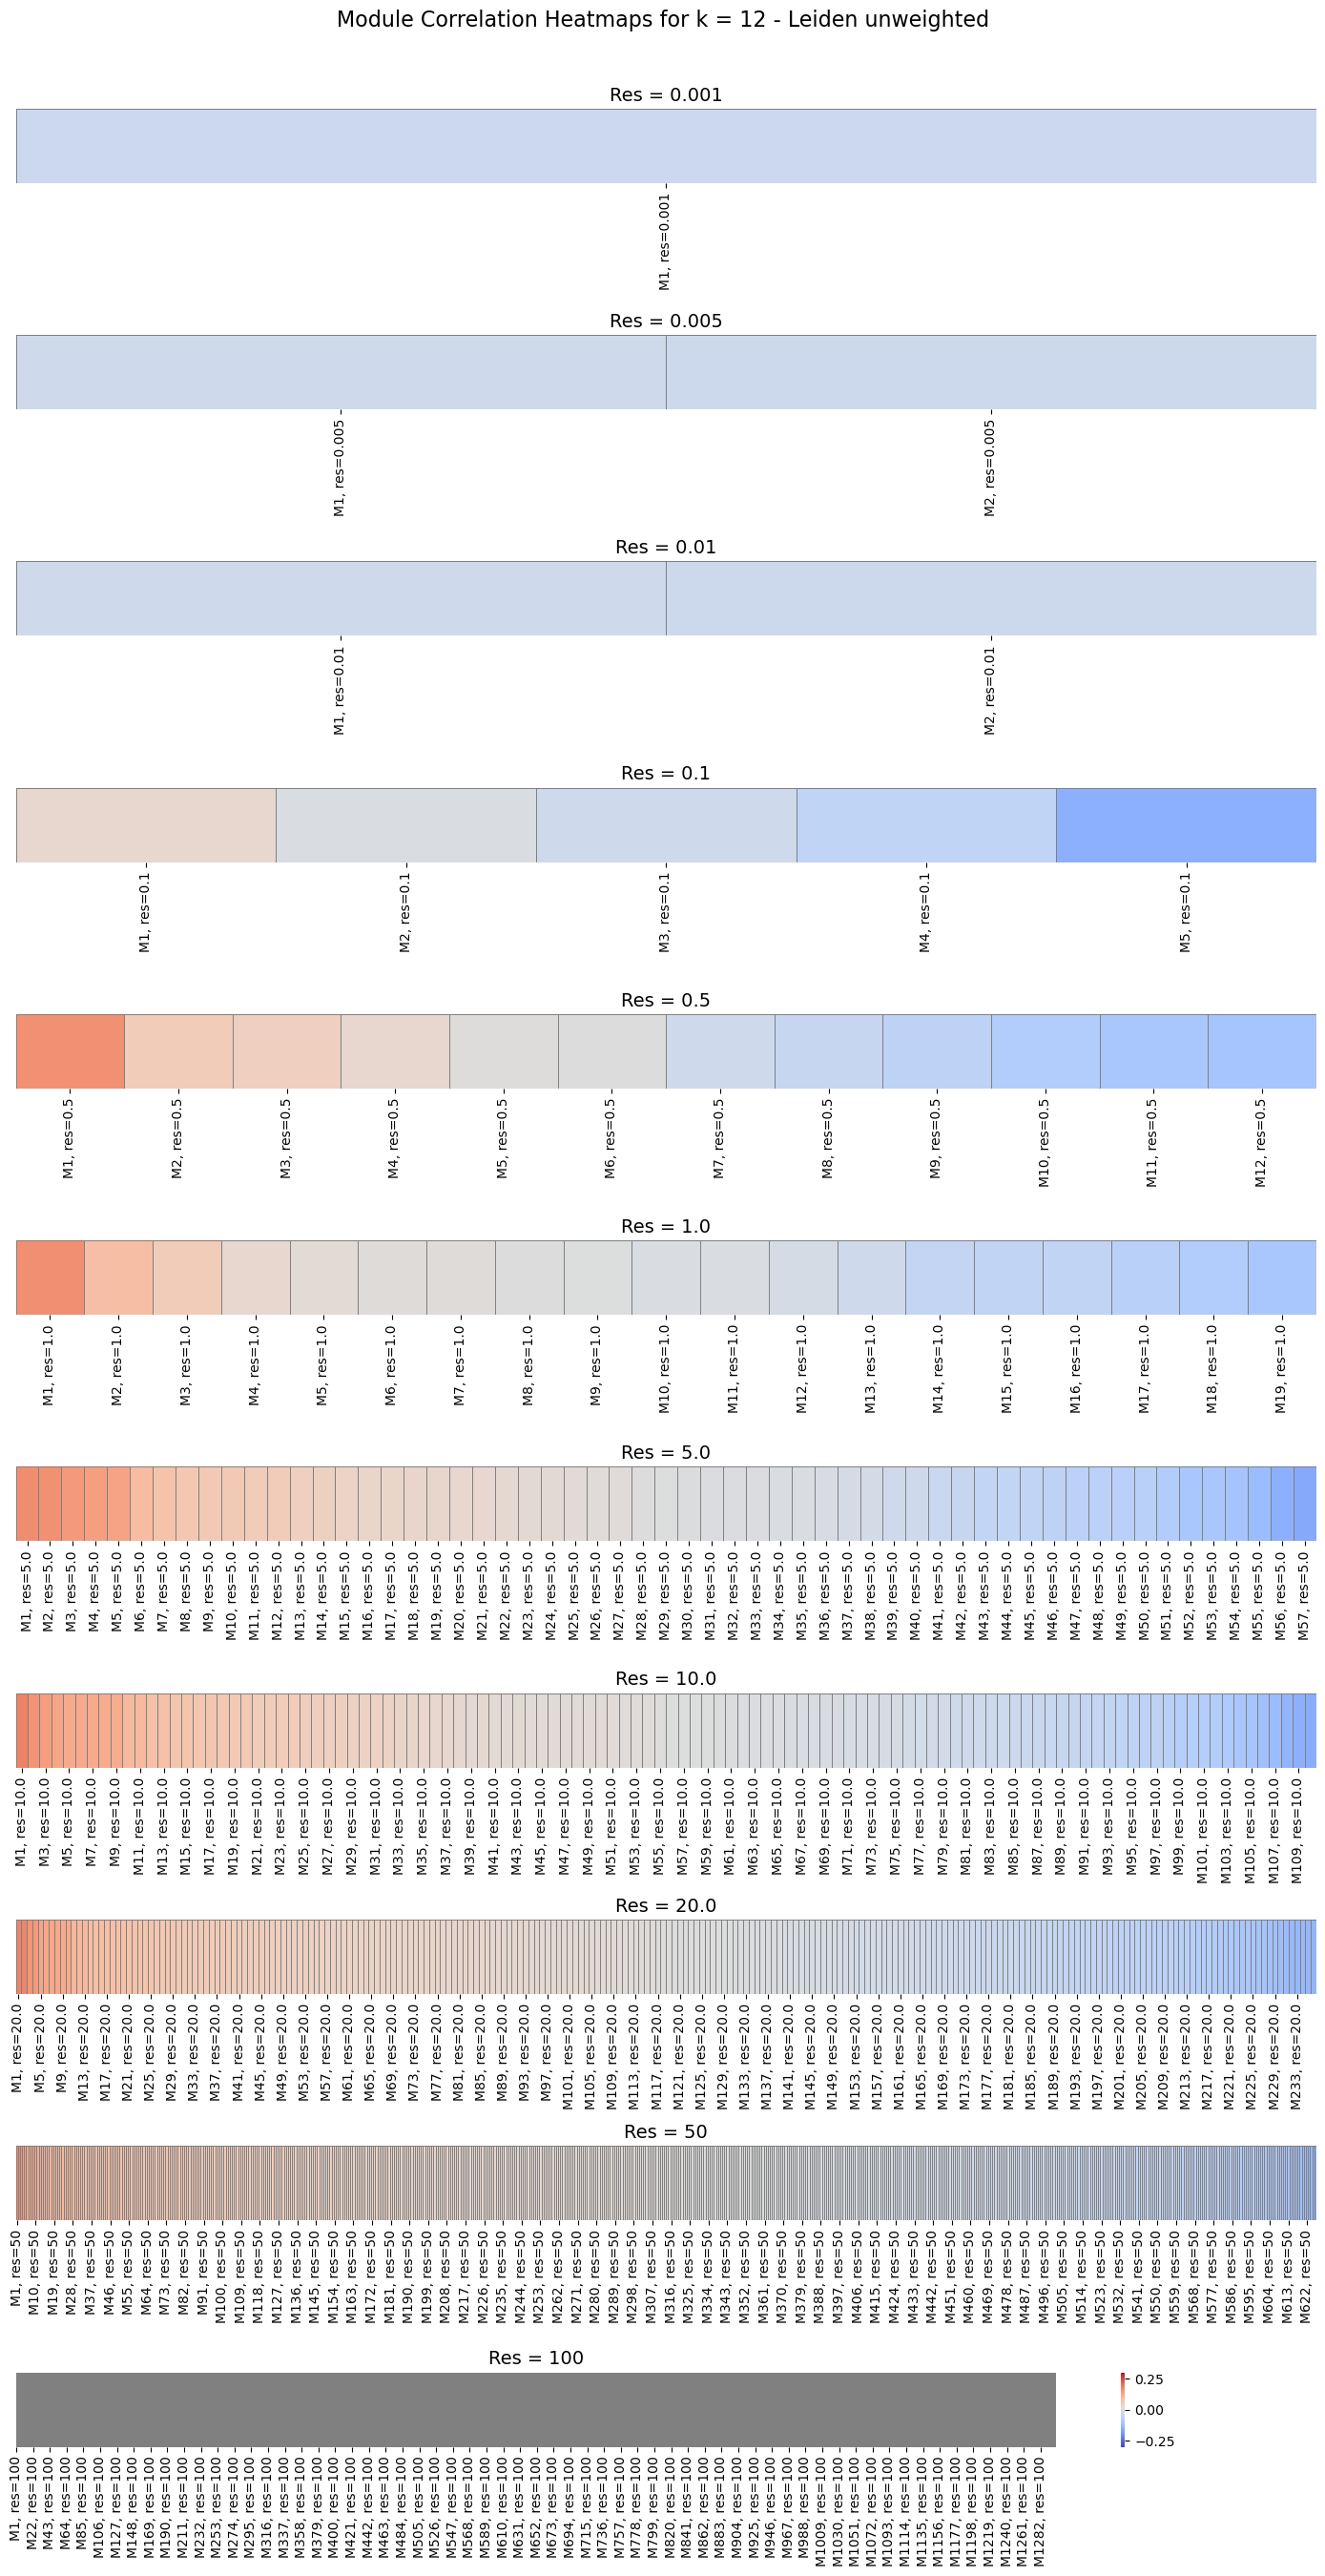

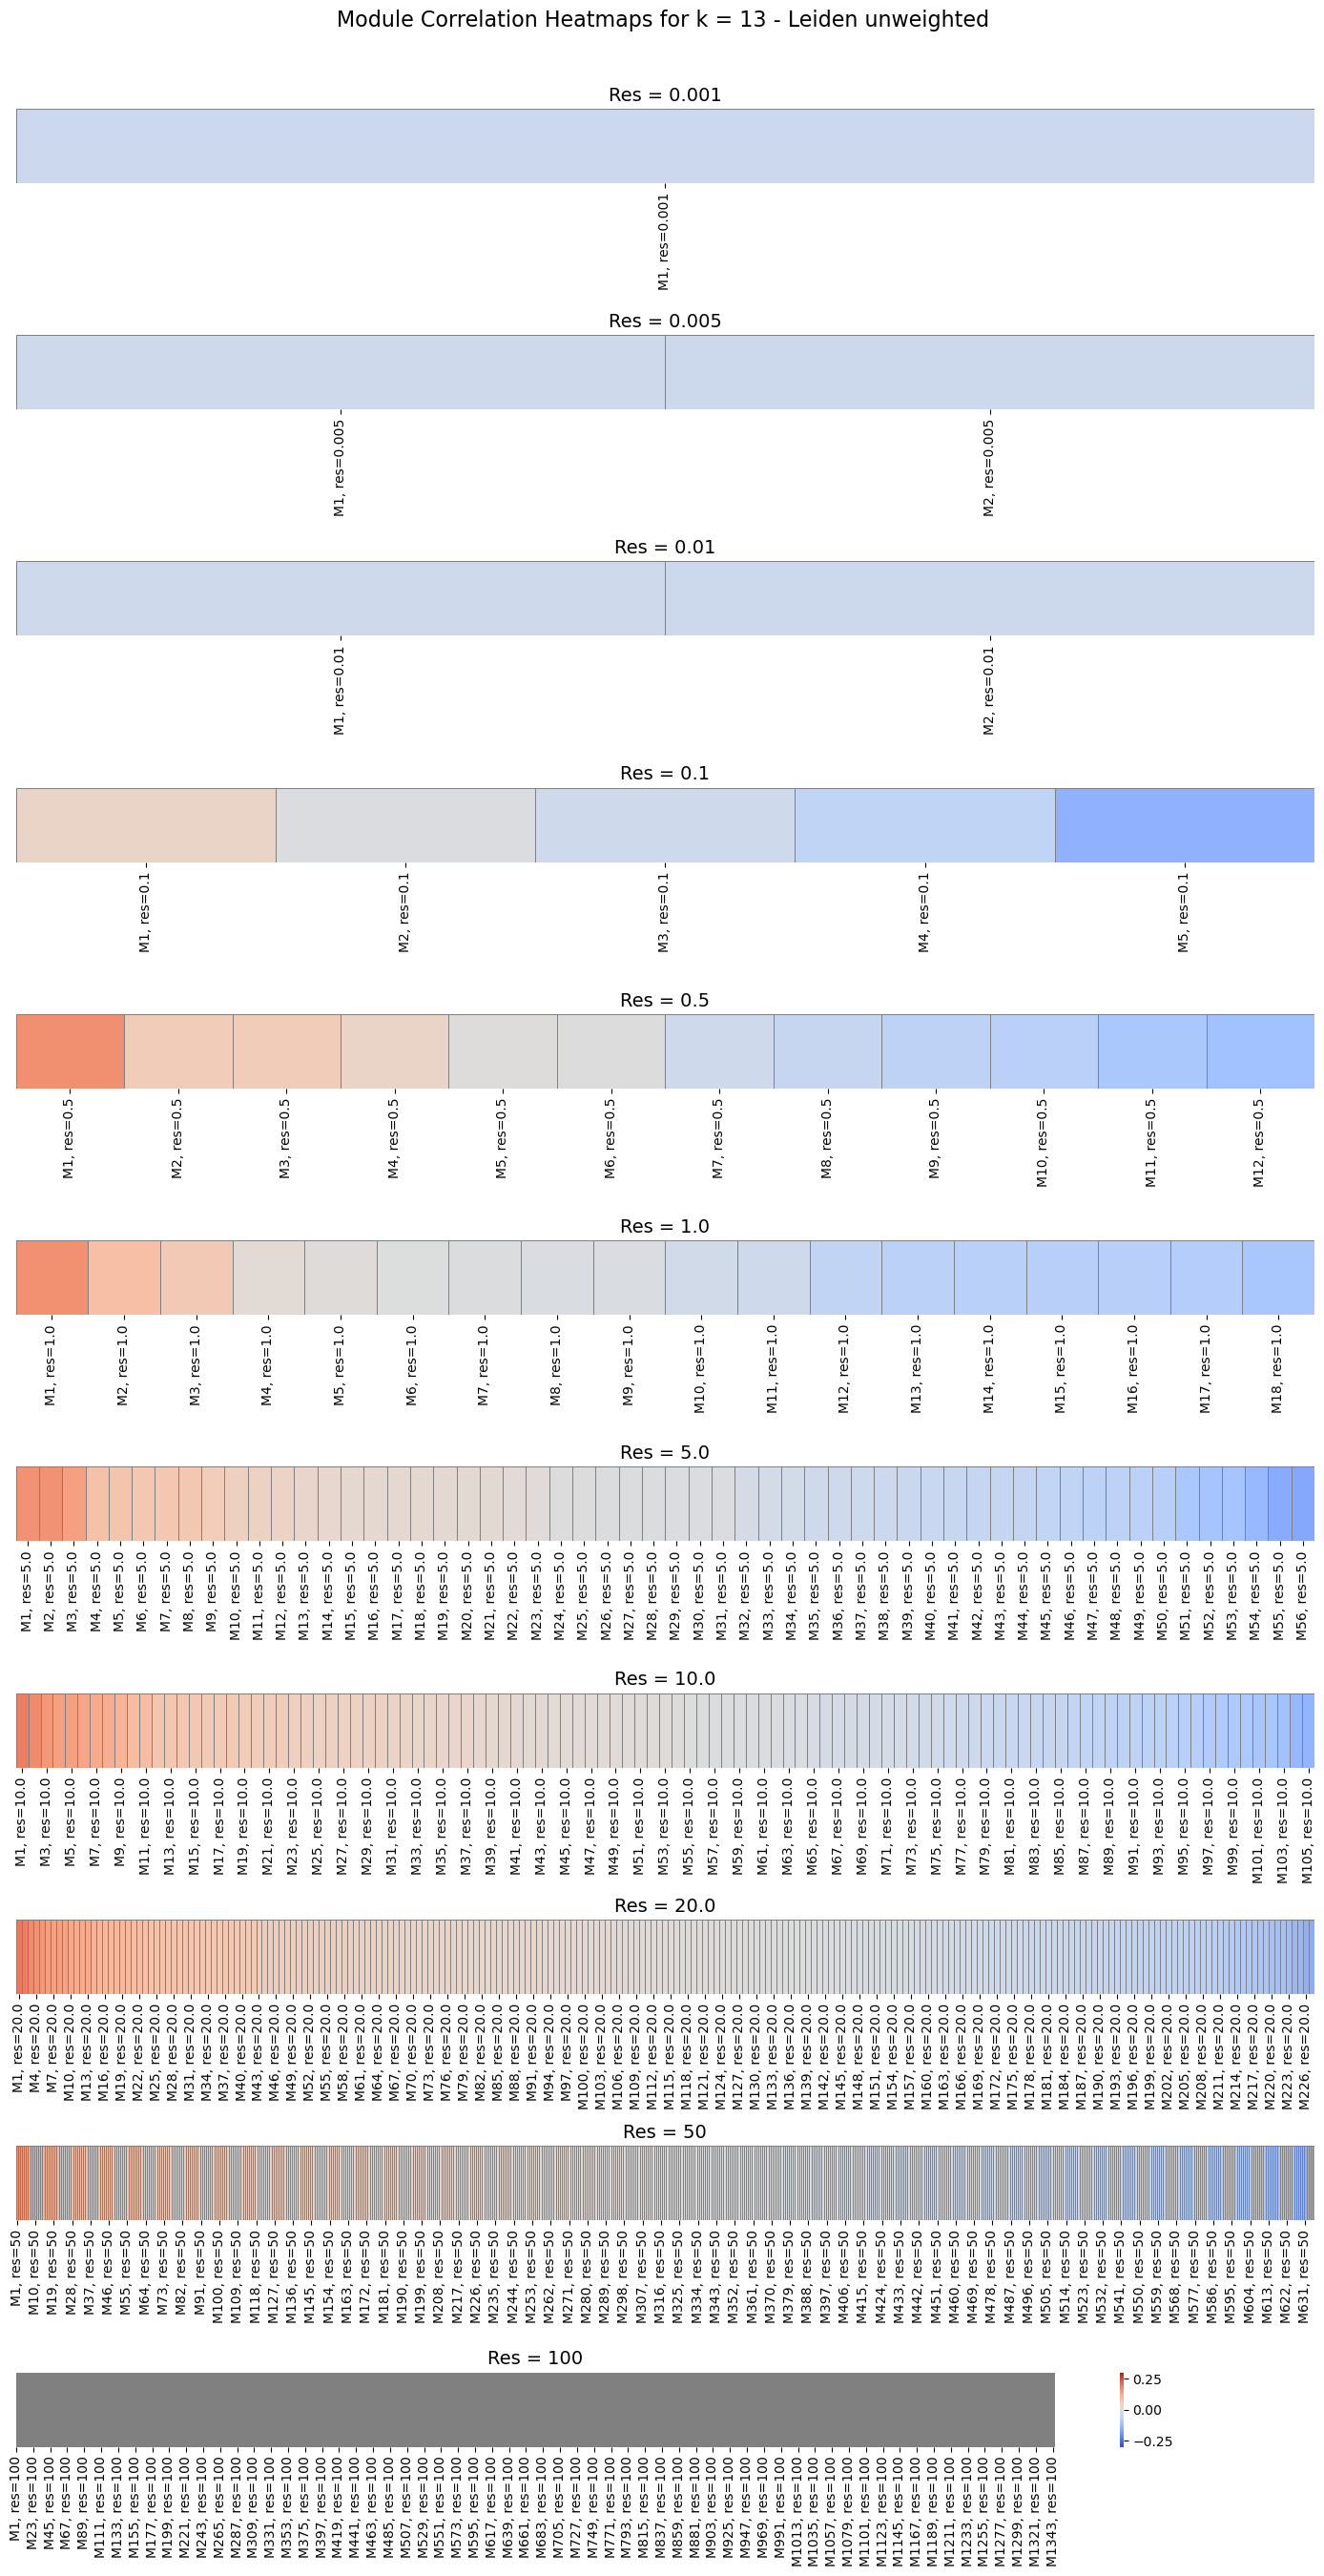

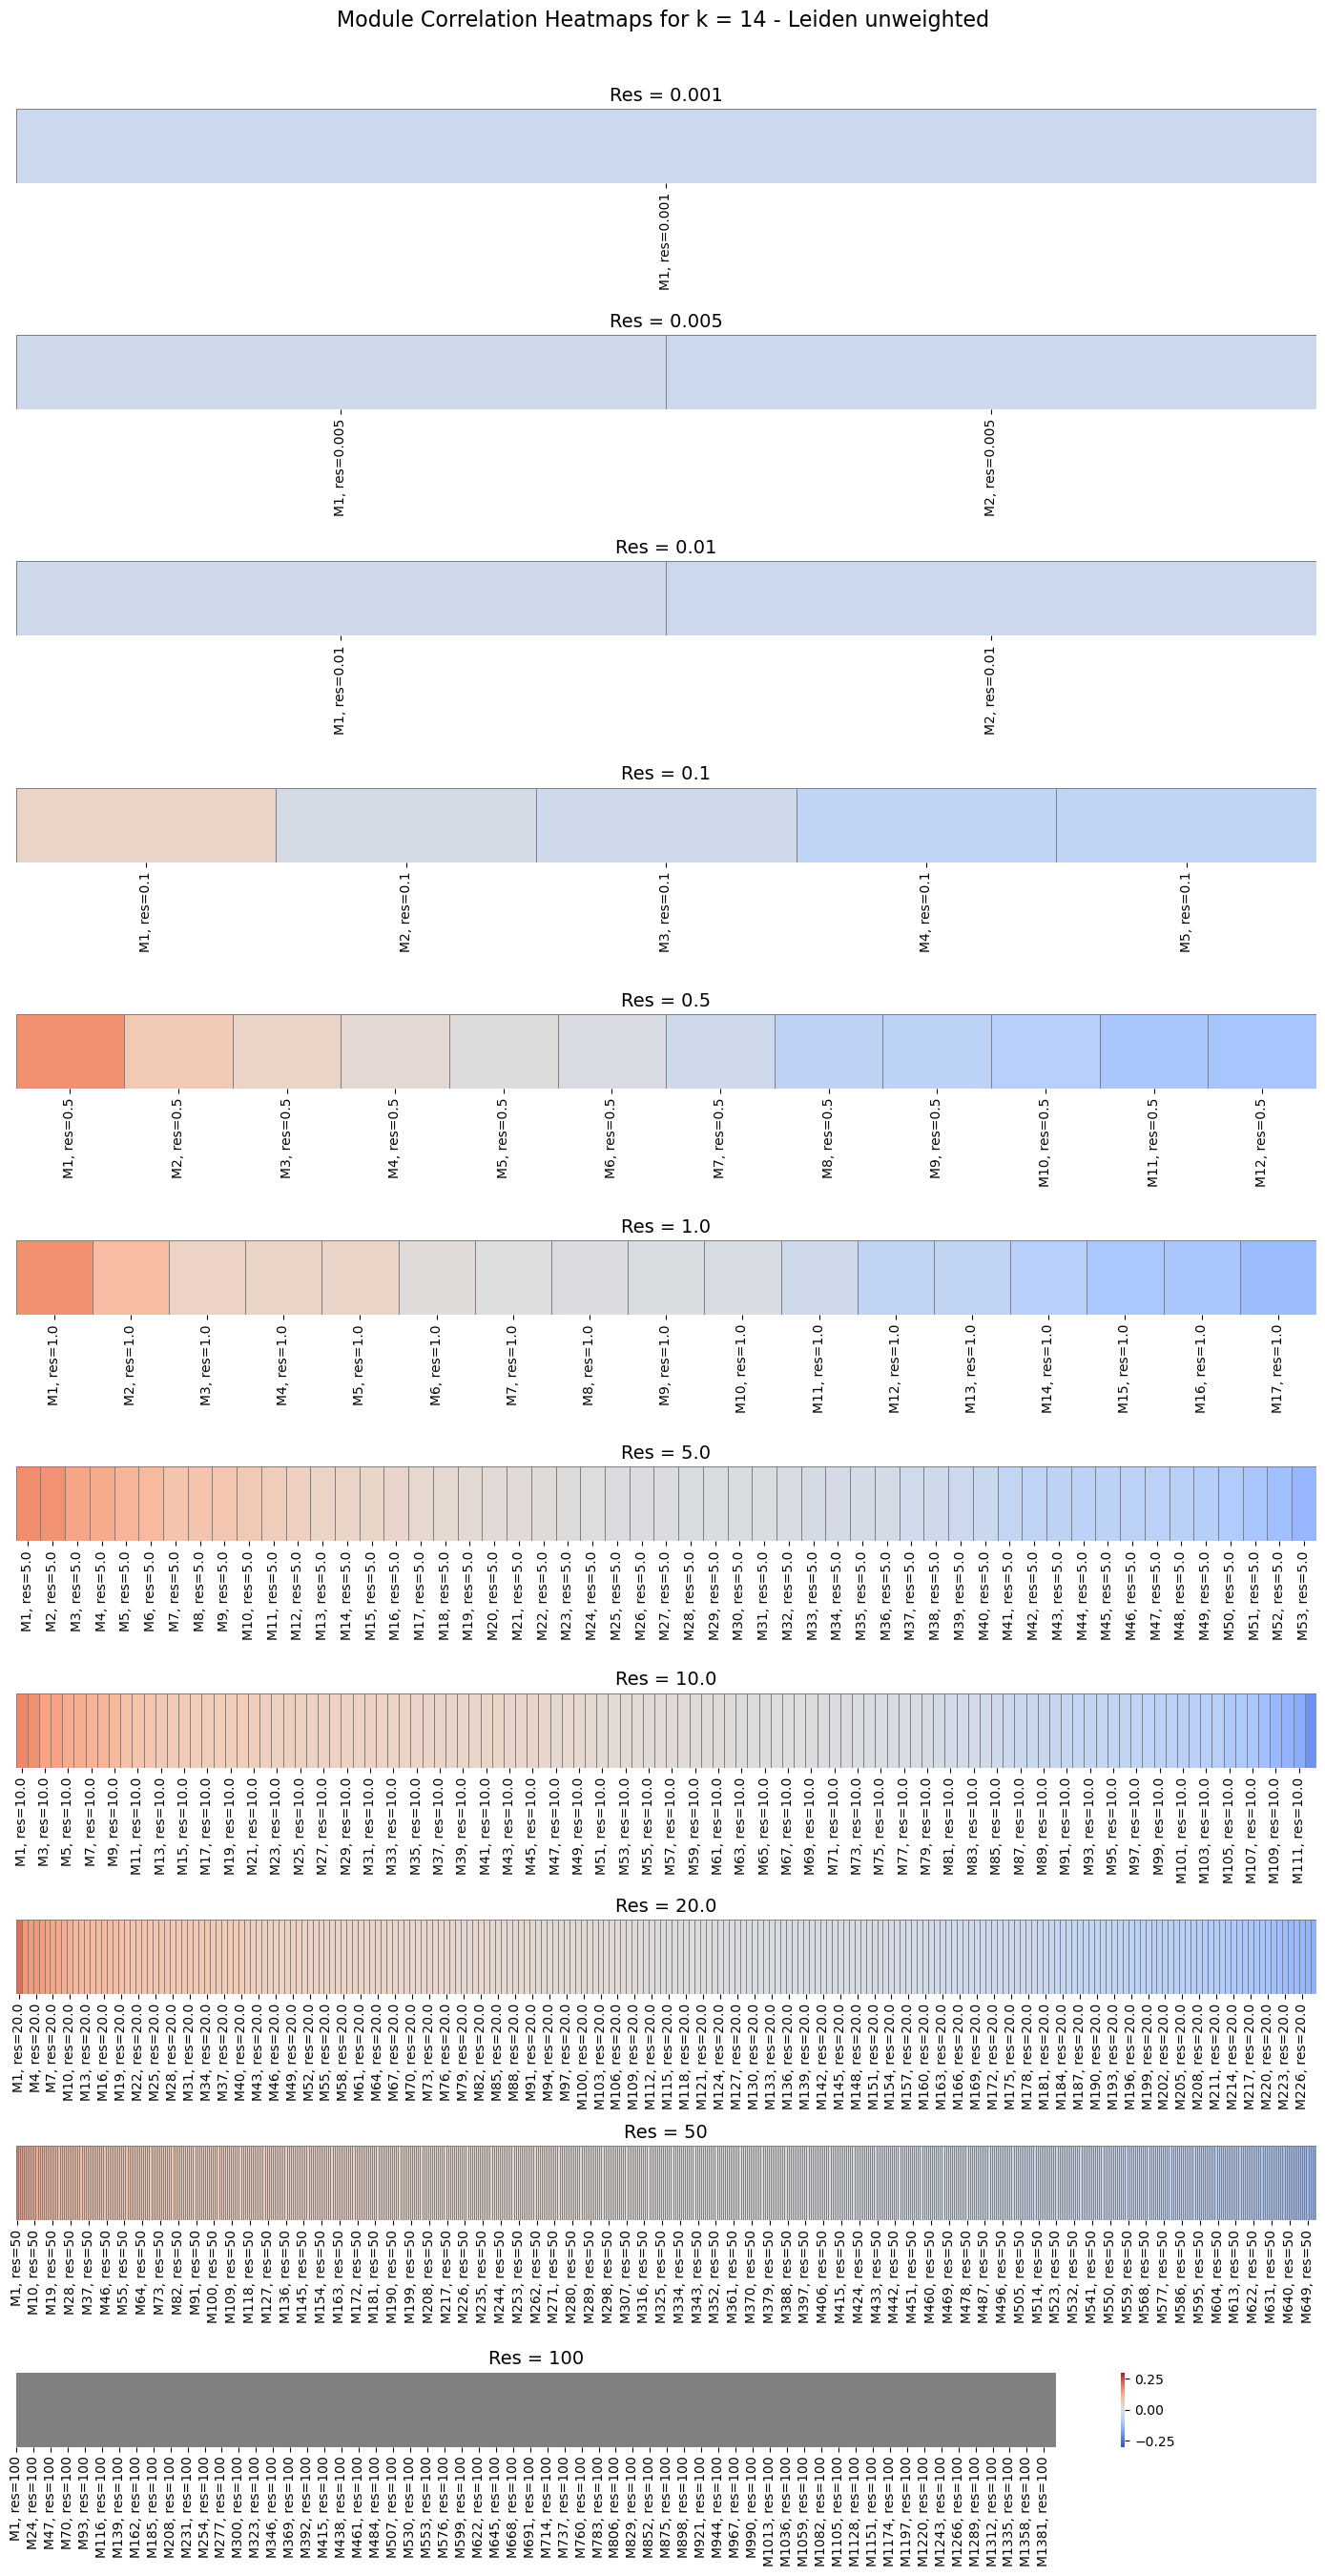

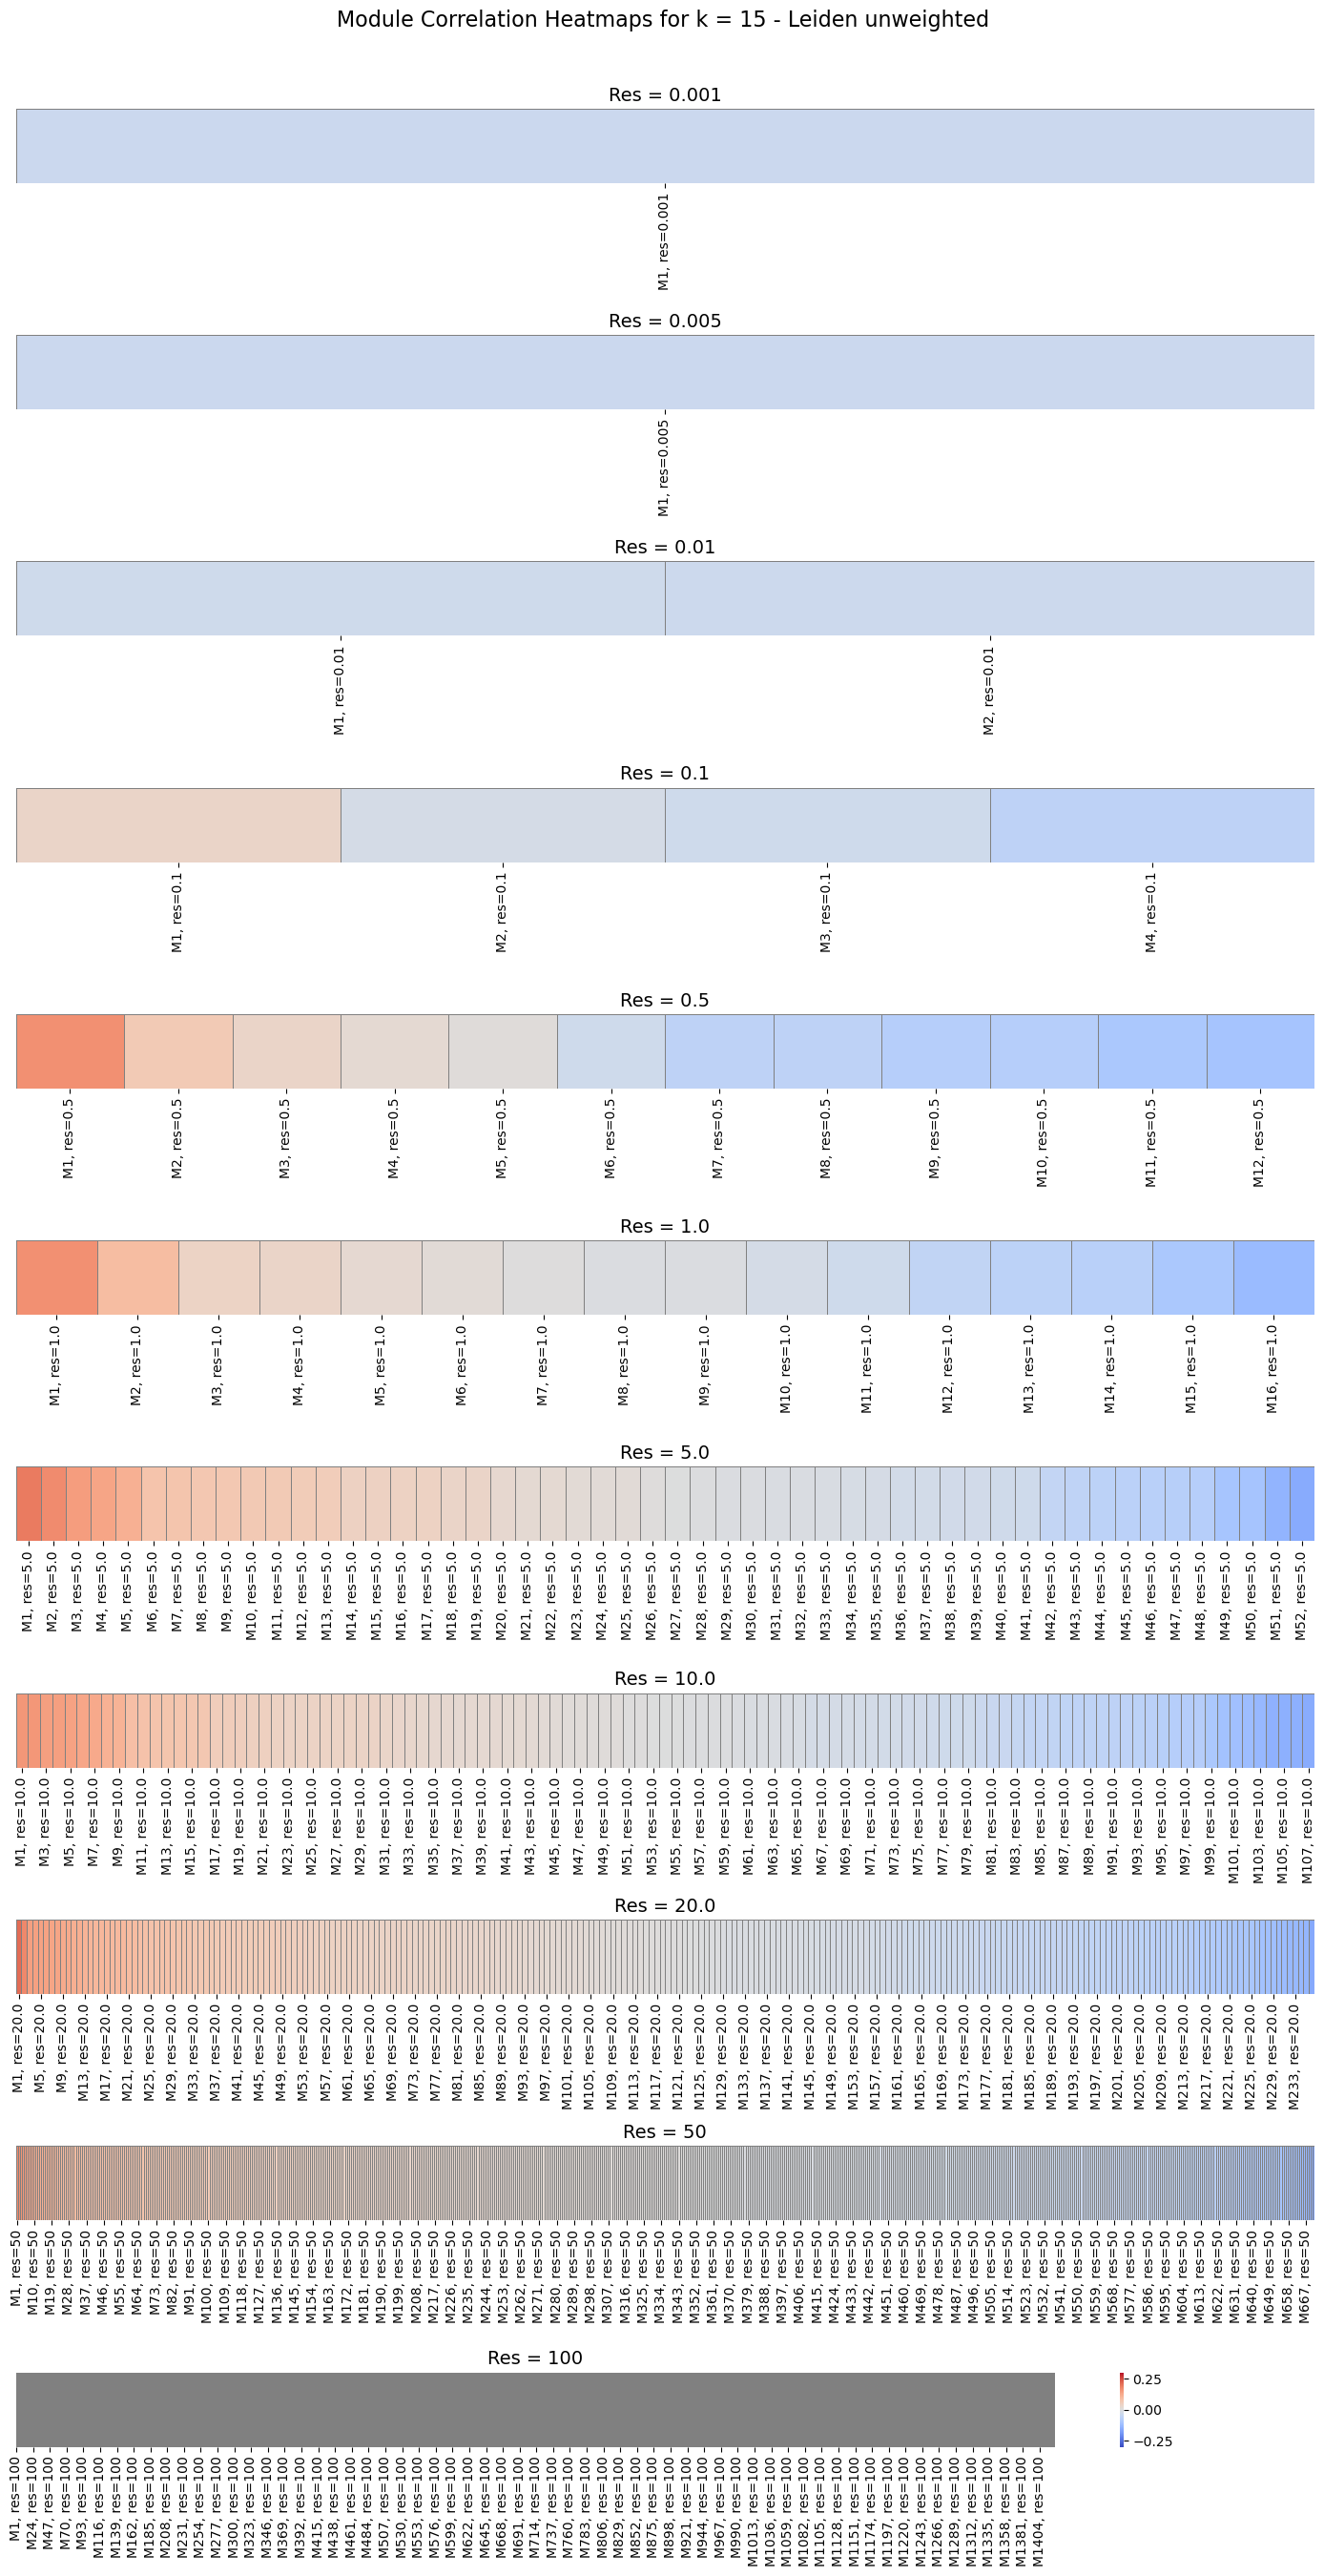

In [71]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process the data
df_modules = pd.read_csv('Correlation_results/module_correlations_leiden_all.csv')
df_modules = df_modules.sort_values('correlation', ascending=False)
df_modules['cluster_l'] = df_modules['cluster'].apply(lambda x: ast.literal_eval(x))
df_modules['k'] = df_modules['network'].str.extract(r'knn_(\d+)', expand=False).astype(int)

ks = range(4, 16)
resolutions = [0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50, 100]

# Generate one figure per k
for k in ks:
    fig, axes = plt.subplots(len(resolutions), 1, figsize=(14, 2.5 * len(resolutions)))
    fig.suptitle(f'Module Correlation Heatmaps for k = {k} - Leiden unweighted', fontsize=16)

    for i, res in enumerate(resolutions):
        ax = axes[i]

        subset = df_modules[
            (df_modules['k'] == k) &
            (df_modules['resolution'] == res) &
            (df_modules['network'] == f'knn_{k}') &
            (df_modules['method'] == 'leiden_unweighted')].copy()

        subset = subset.reset_index(drop=True)
        subset['module_name'] = ['M' + str(j + 1) for j in range(len(subset))]
        subset['module_label'] = subset['module_name'] + f', res={res}'

        plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)

        sns.heatmap(plot_df,
                    cmap='coolwarm',
                    cbar=(i == len(resolutions)-1),  # Show colorbar only for the last plot
                    vmin=-0.3, vmax=0.3,
                    linewidths=0.5,
                    linecolor='gray',
                    ax=ax,
                    # annot=True,
                    # fmt=".2f"
                    )

        ax.set_title(f'Res = {res}', fontsize=14)
        ax.set_yticks([])
        ax.tick_params(axis='x', labelrotation=90, labelsize=10)
        ax.set_xlabel('')

    plt.tight_layout(rect=[0, 0, 1, 0.97])  
    plt.show()


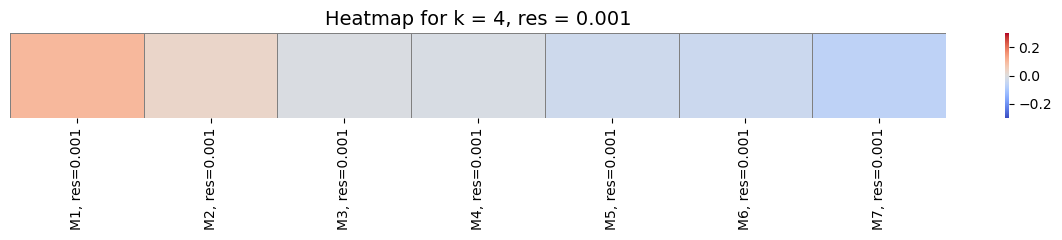

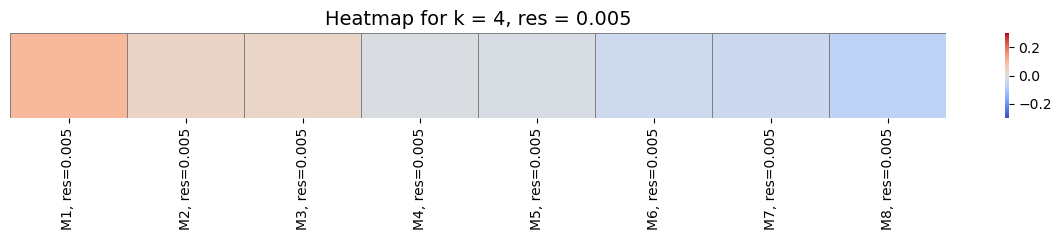

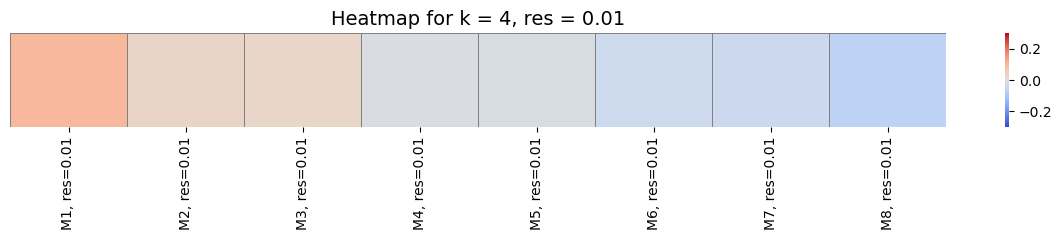

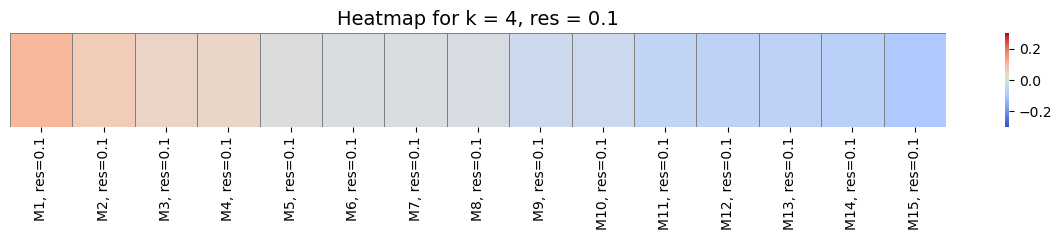

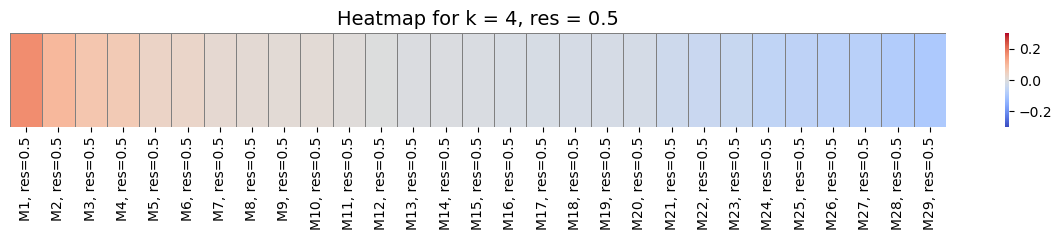

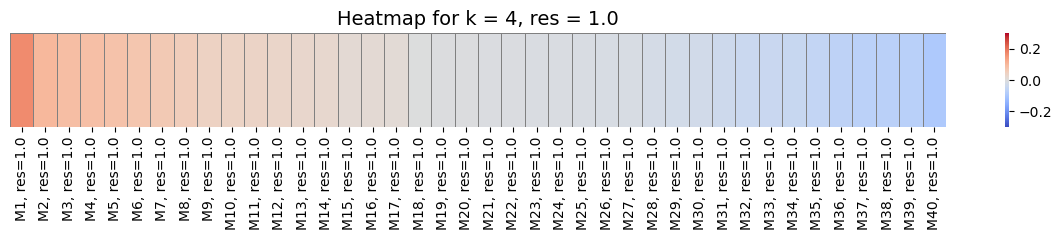

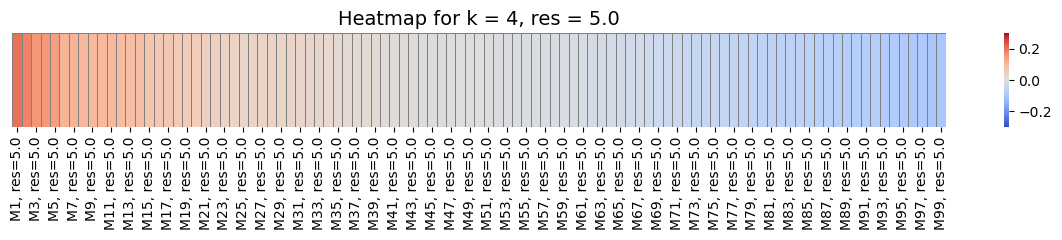

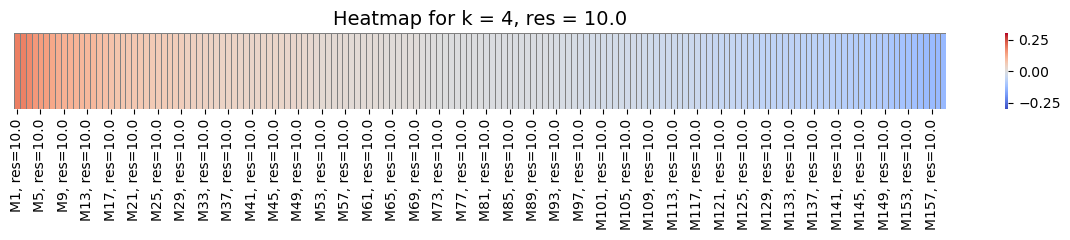

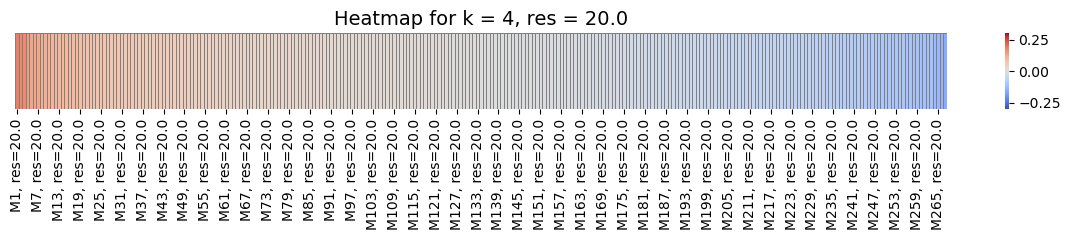

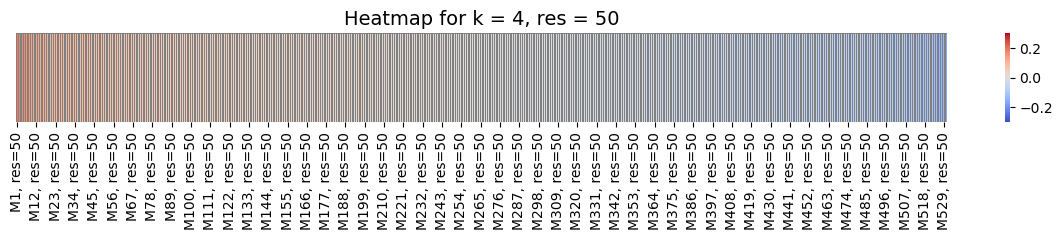

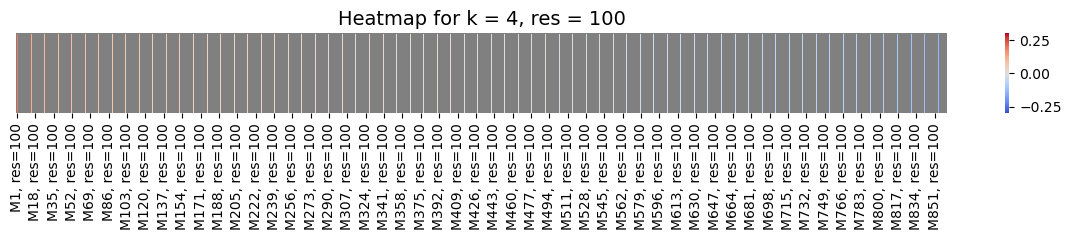

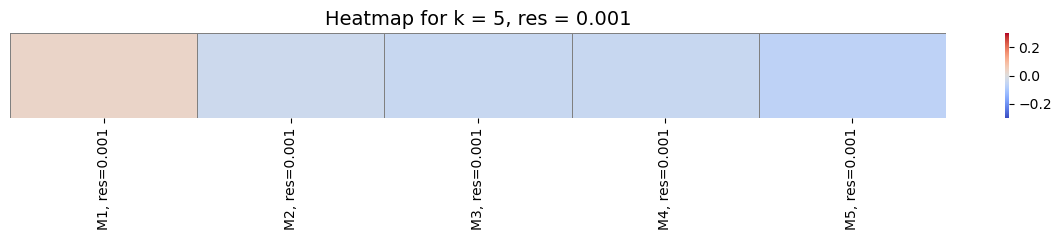

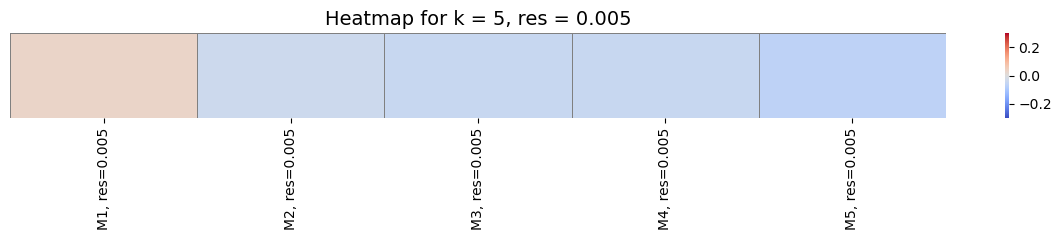

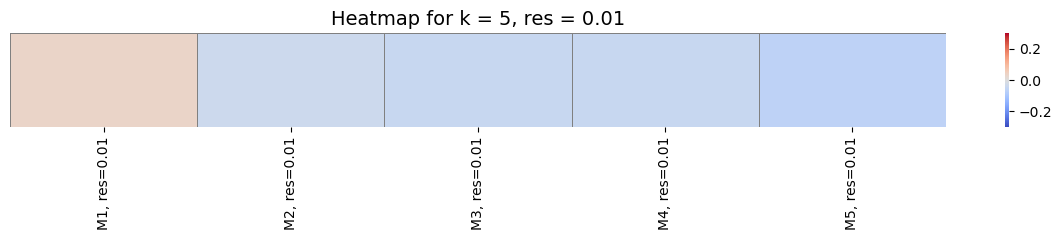

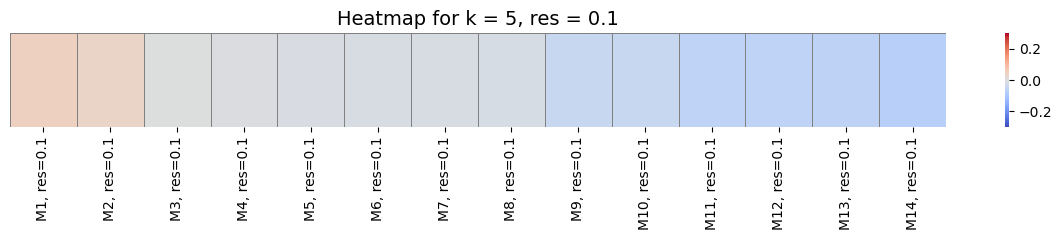

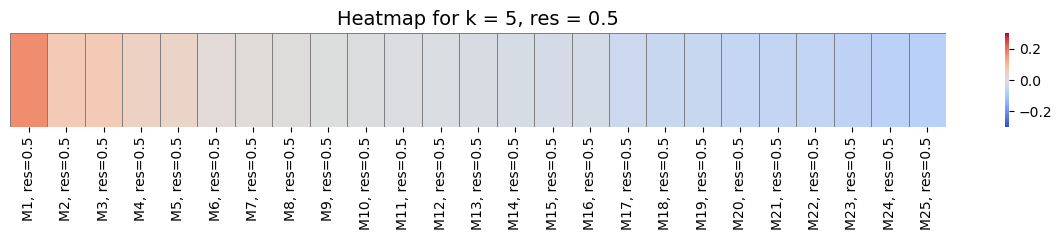

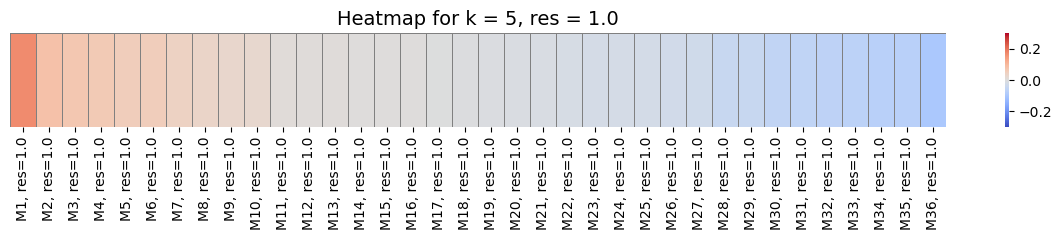

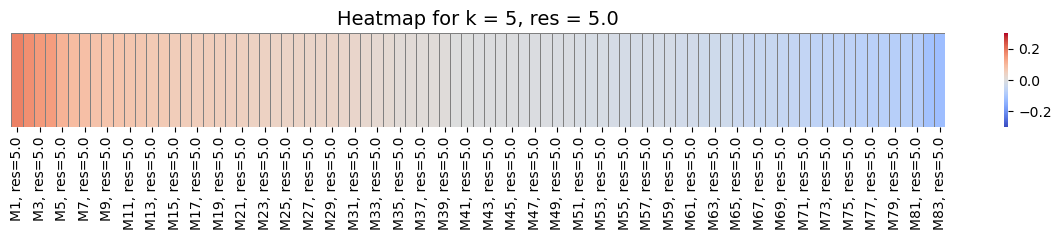

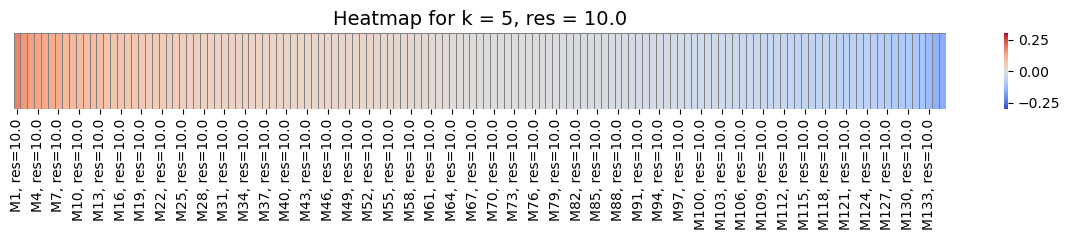

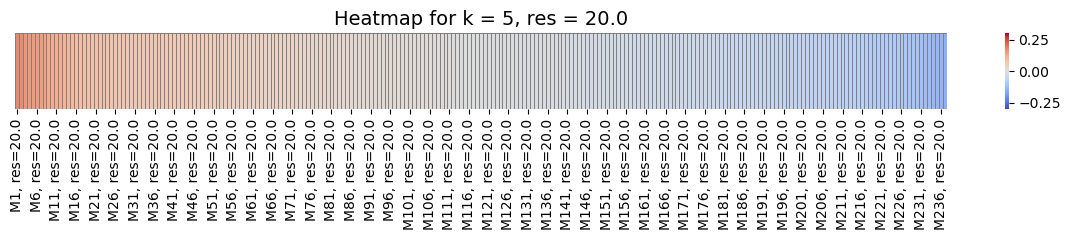

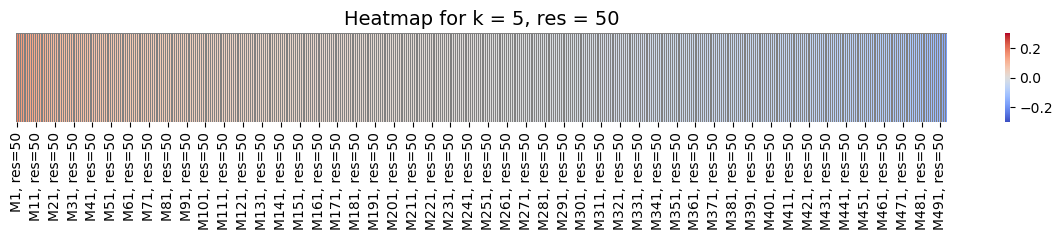

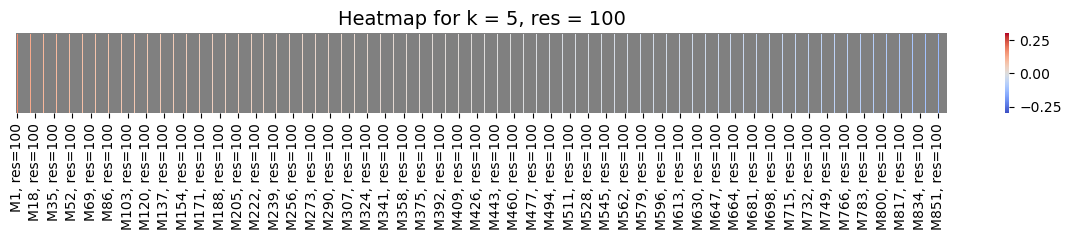

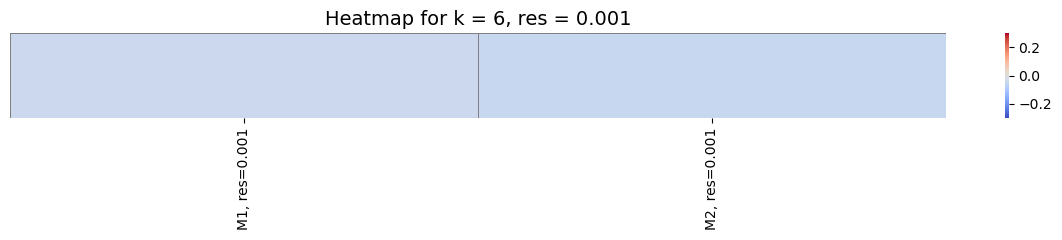

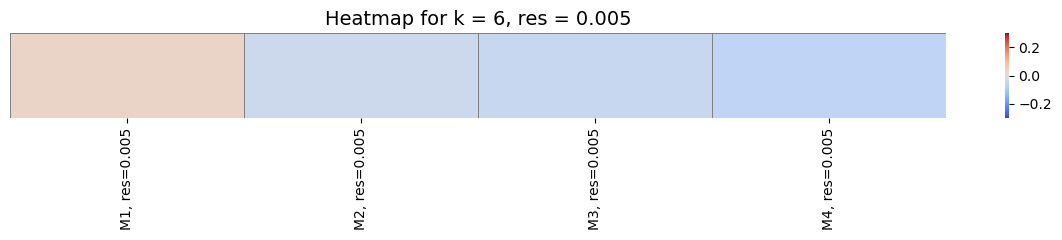

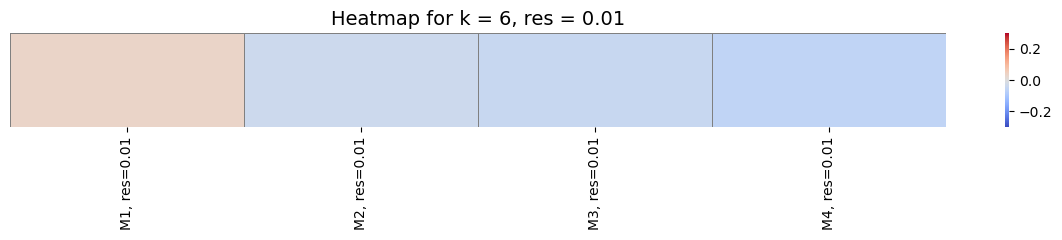

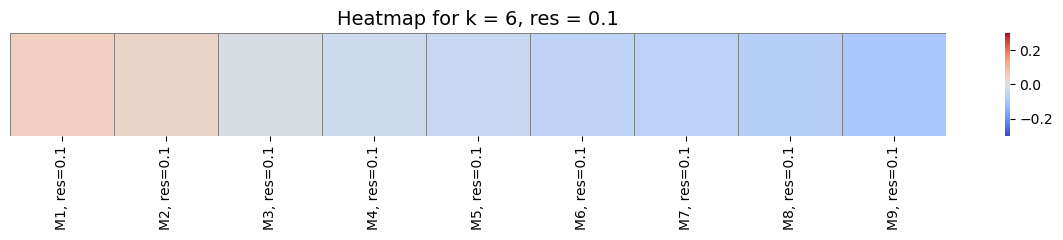

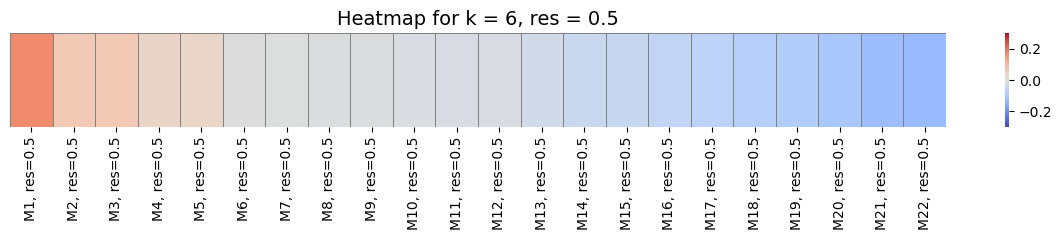

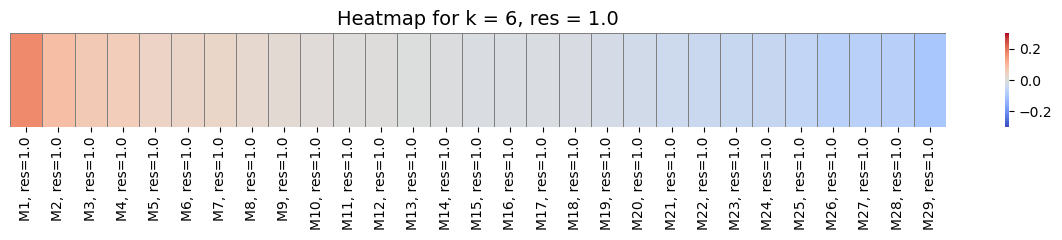

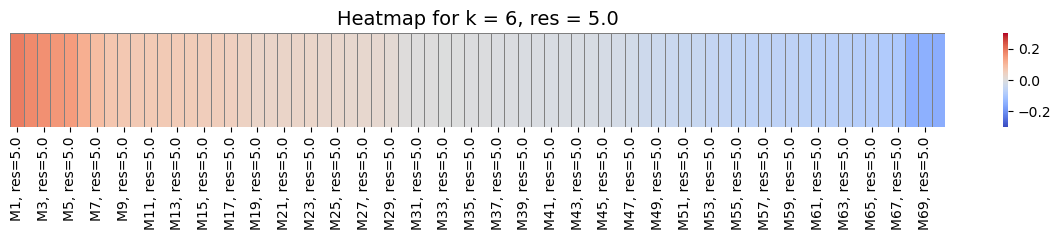

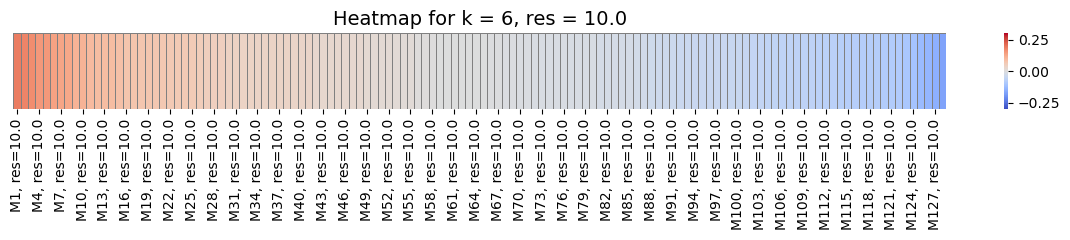

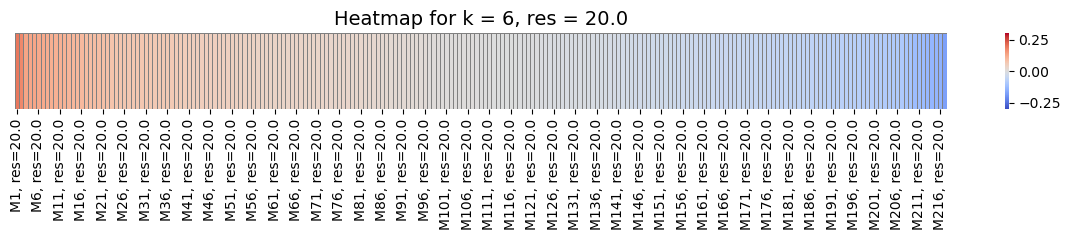

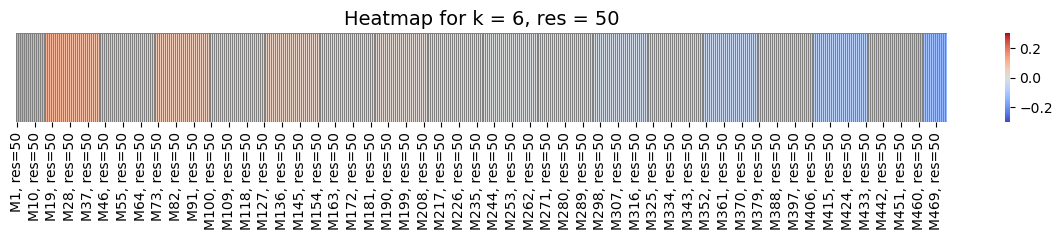

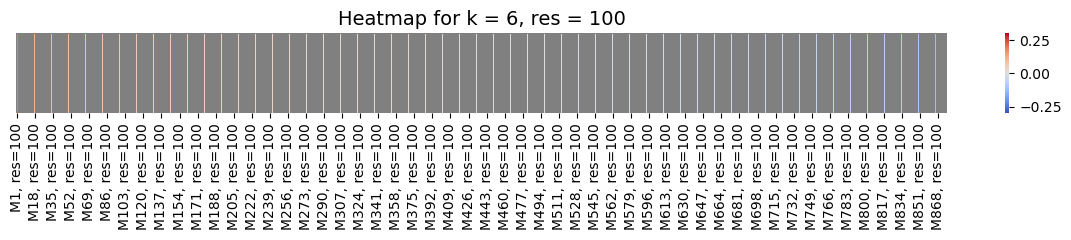

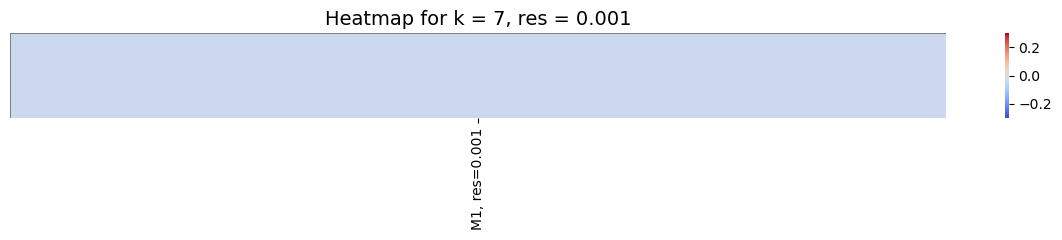

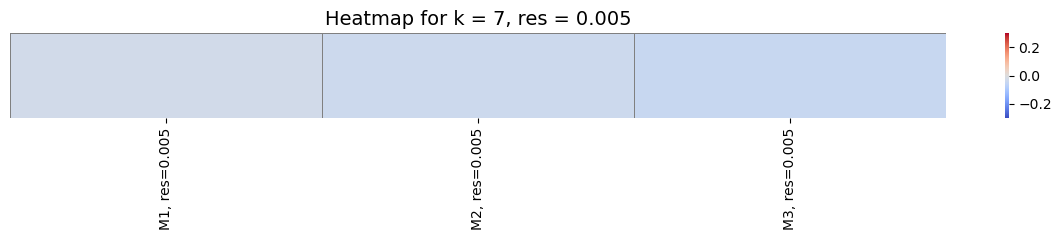

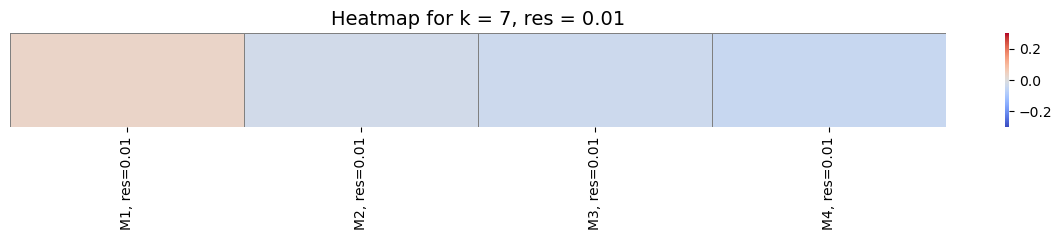

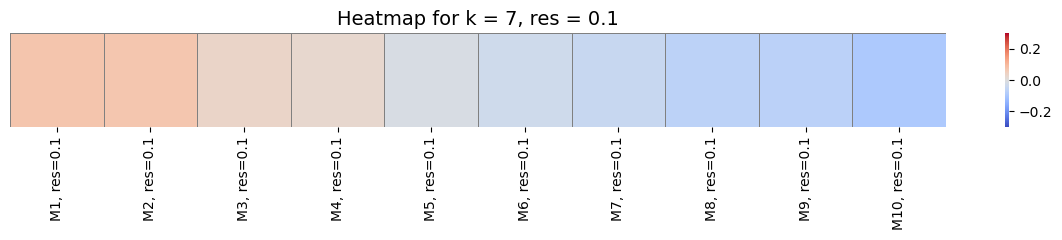

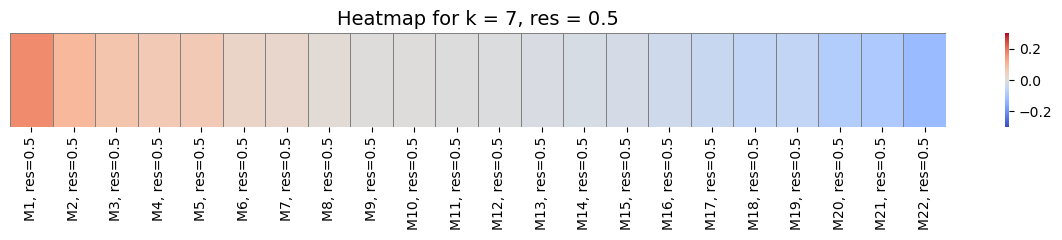

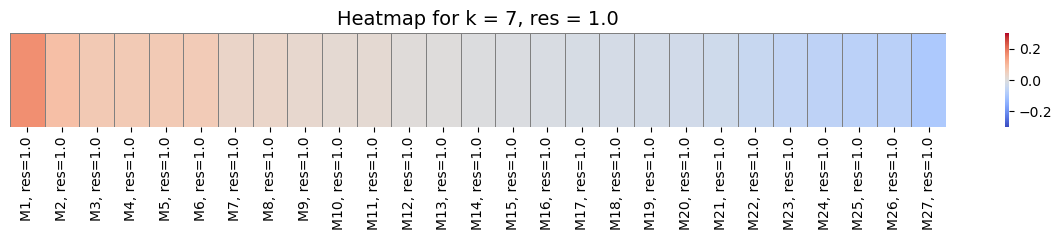

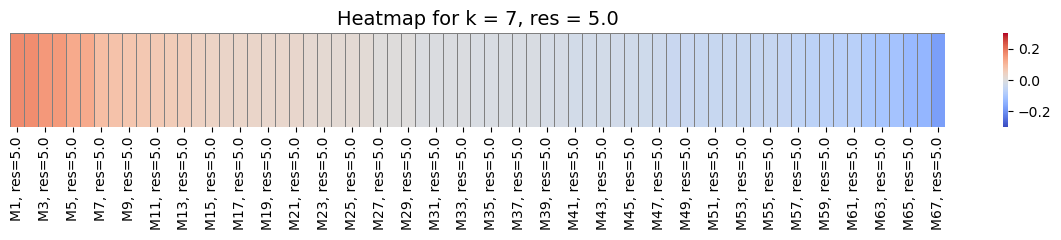

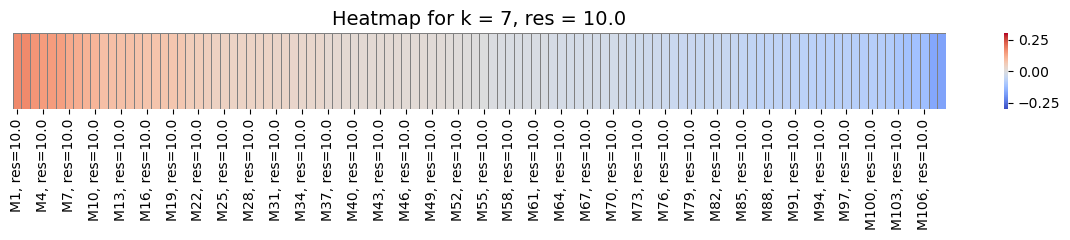

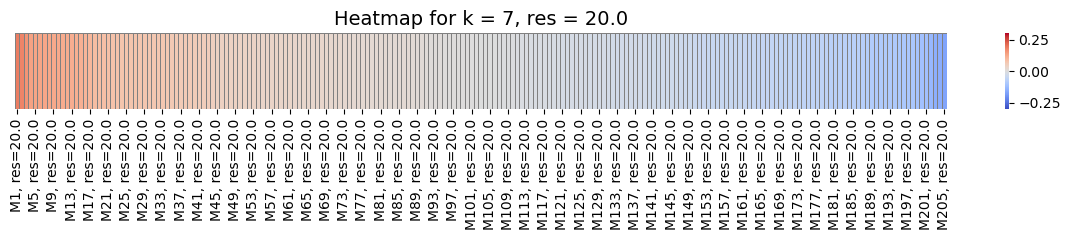

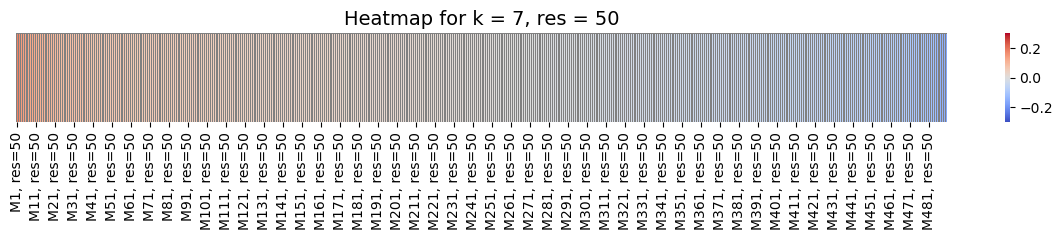

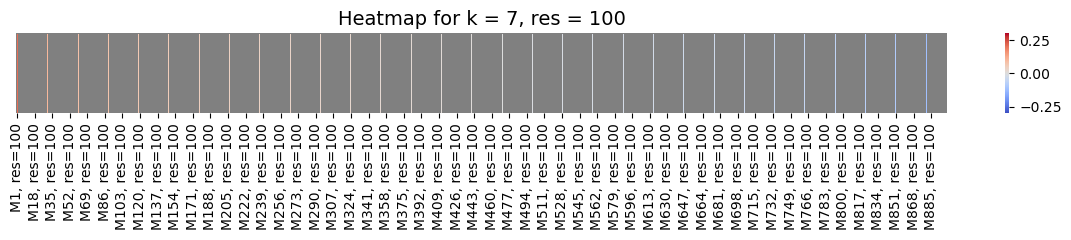

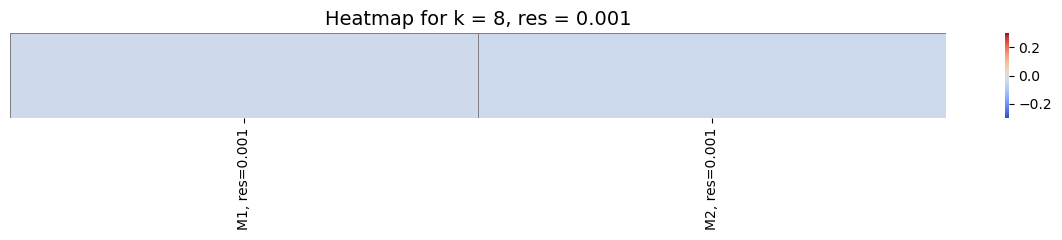

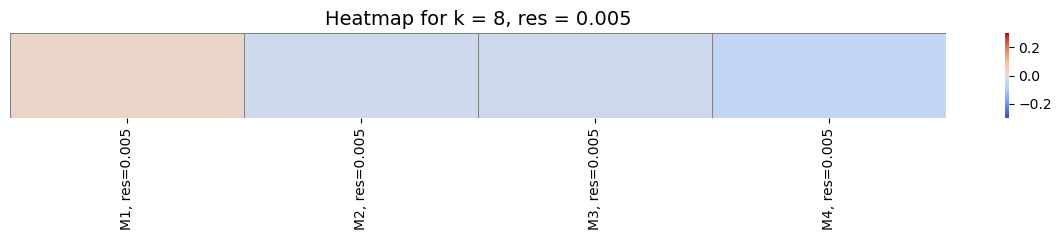

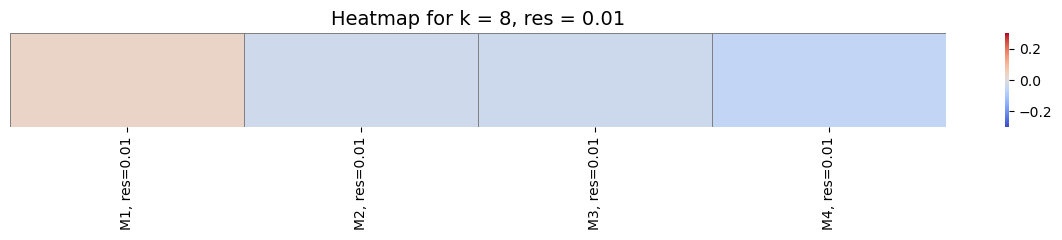

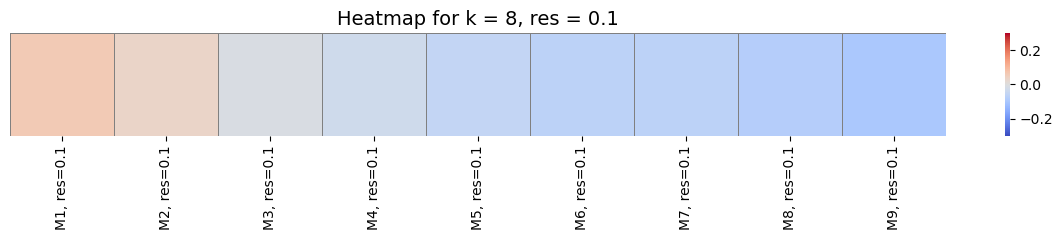

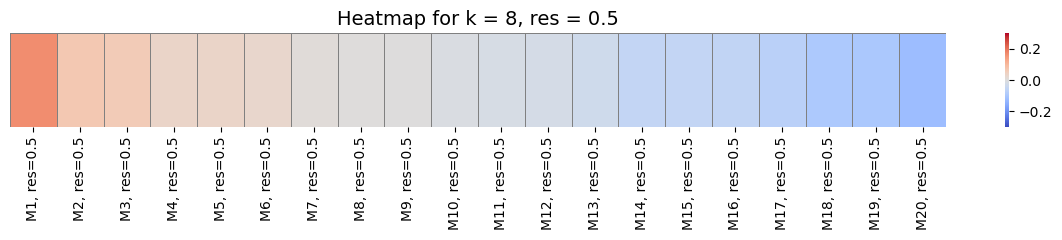

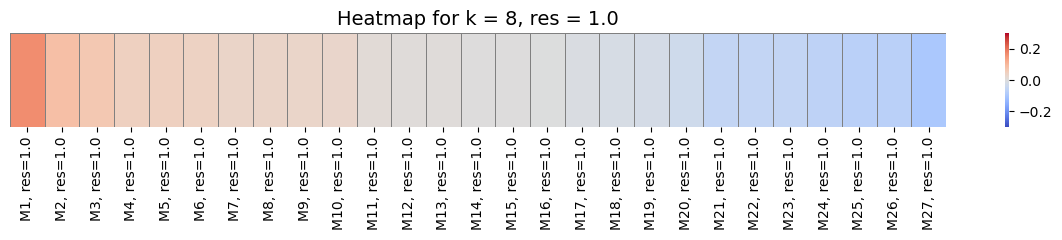

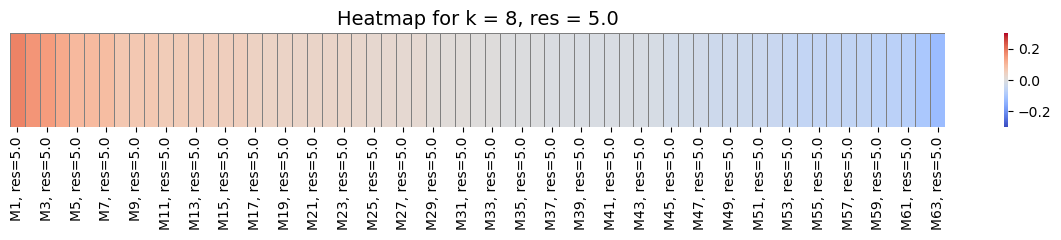

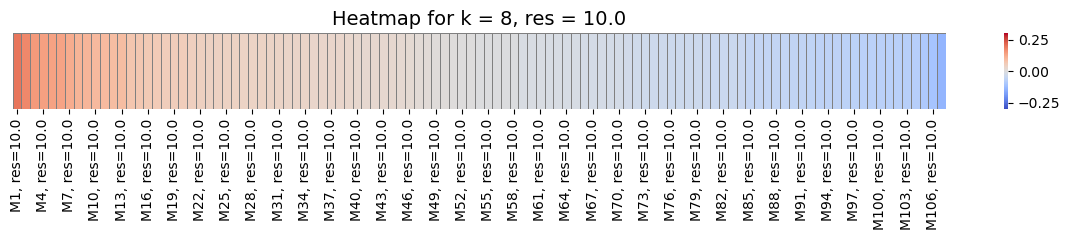

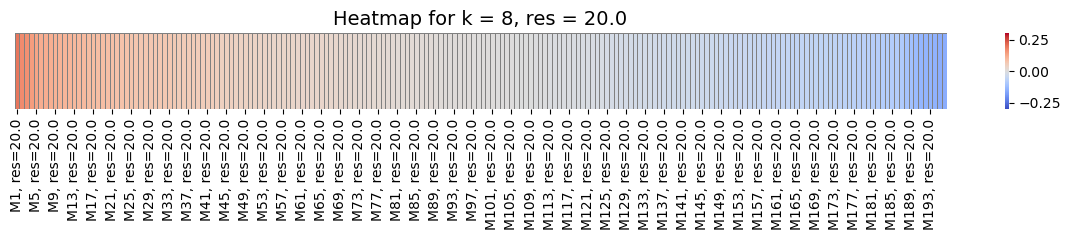

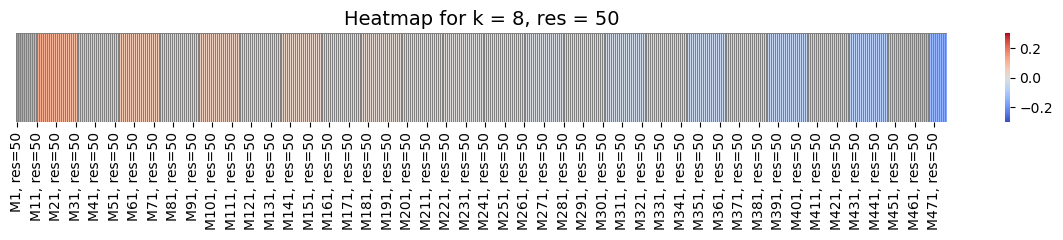

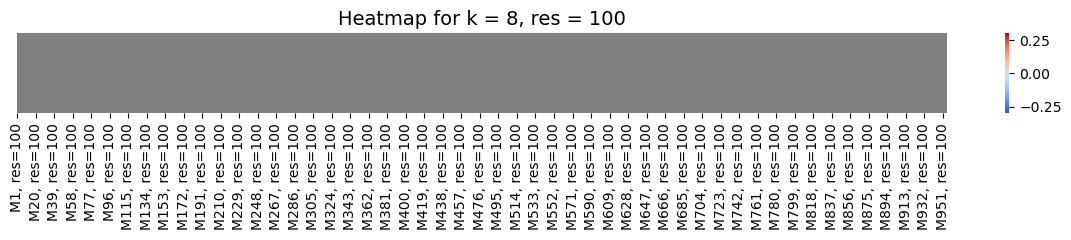

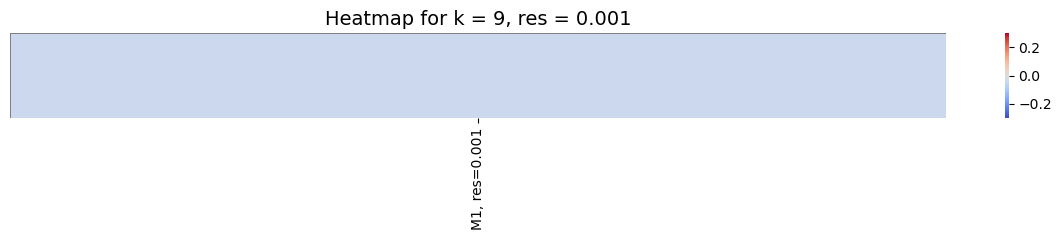

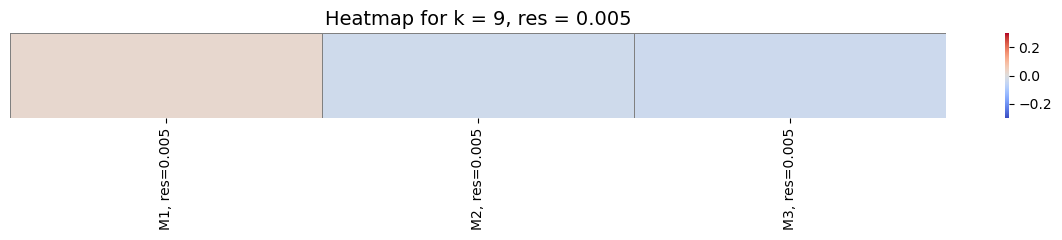

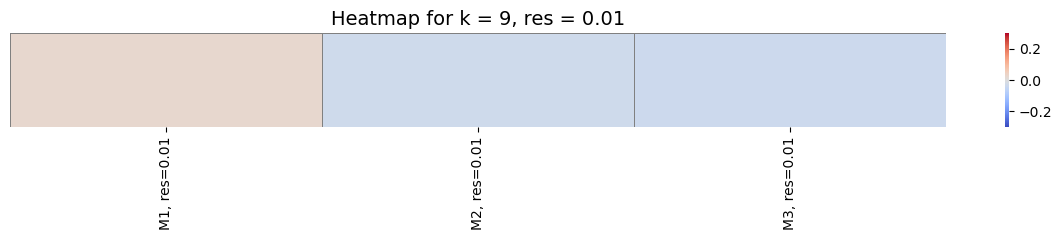

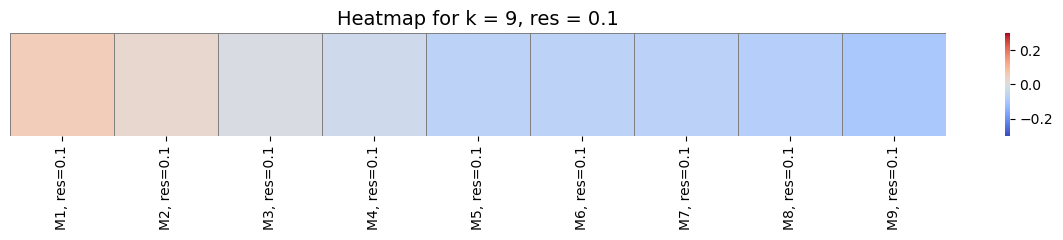

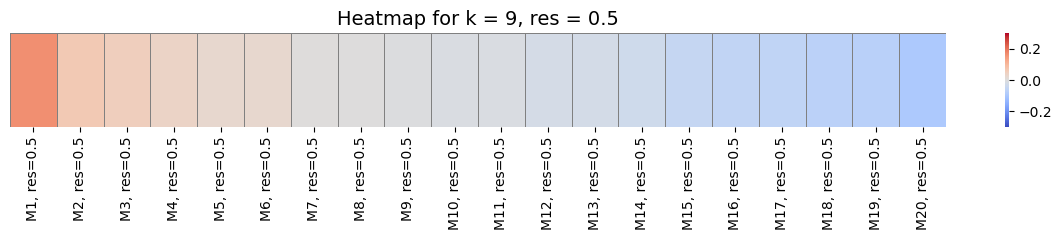

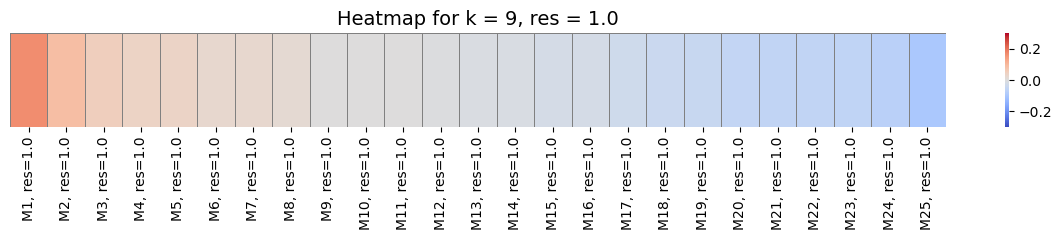

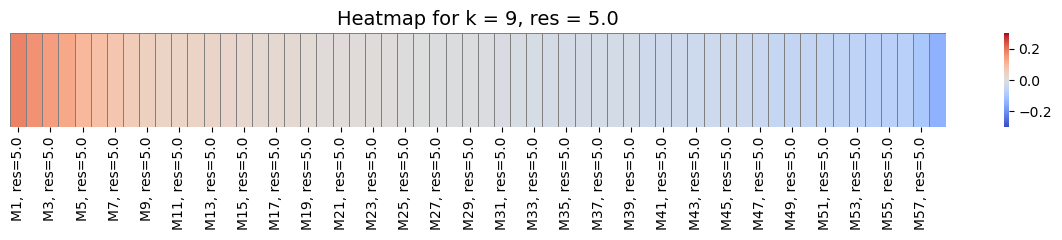

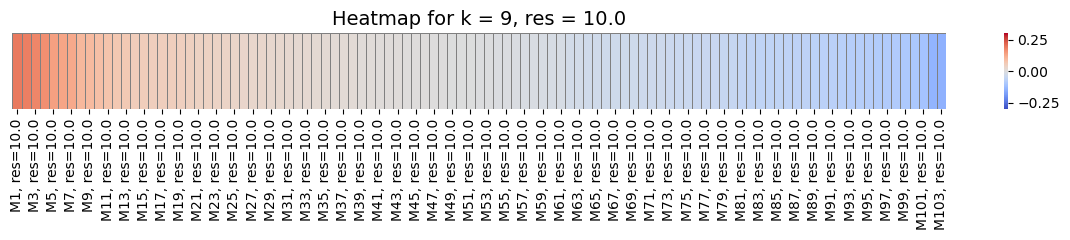

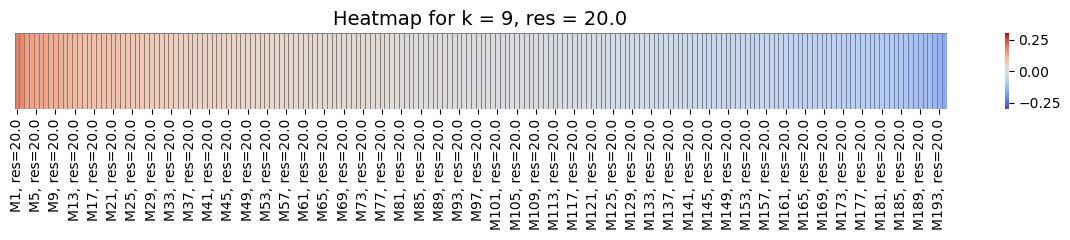

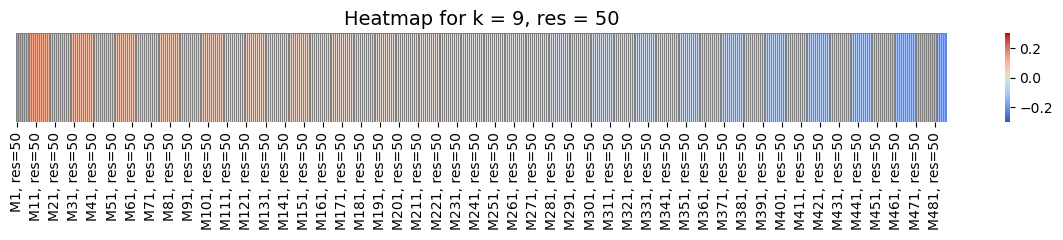

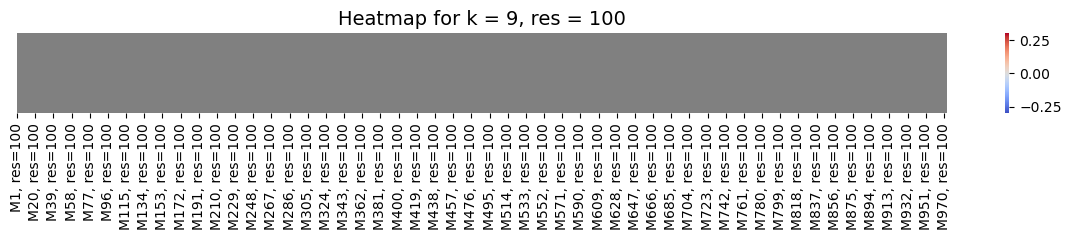

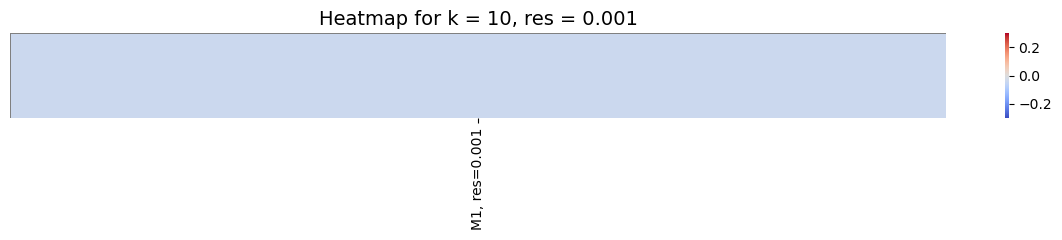

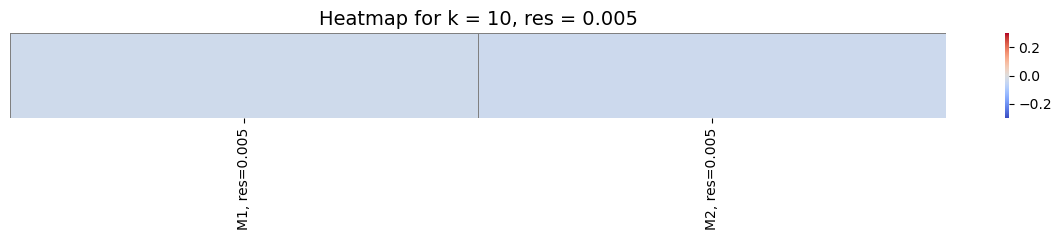

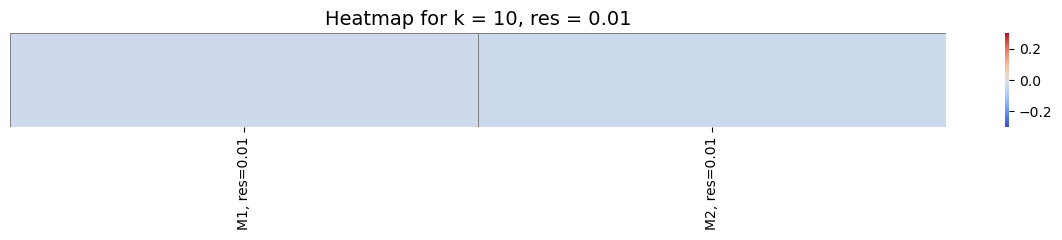

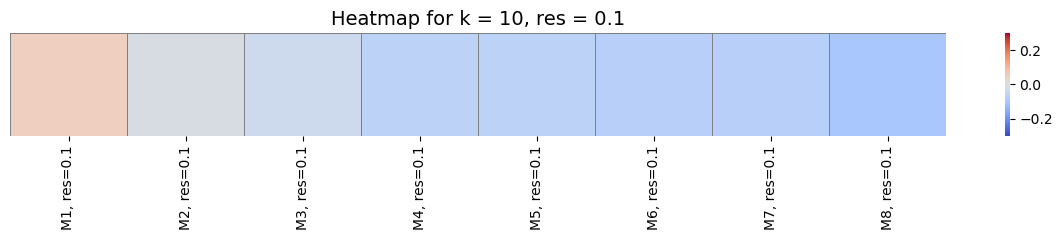

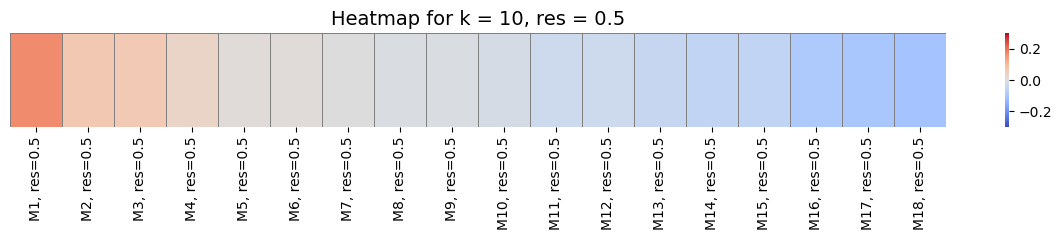

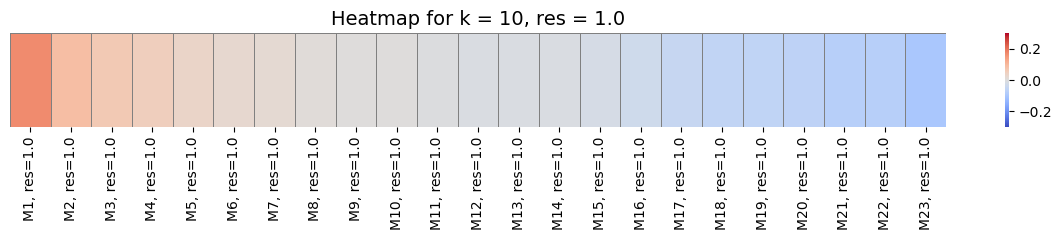

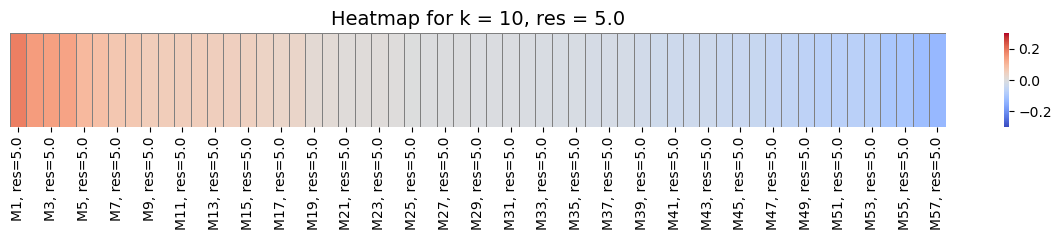

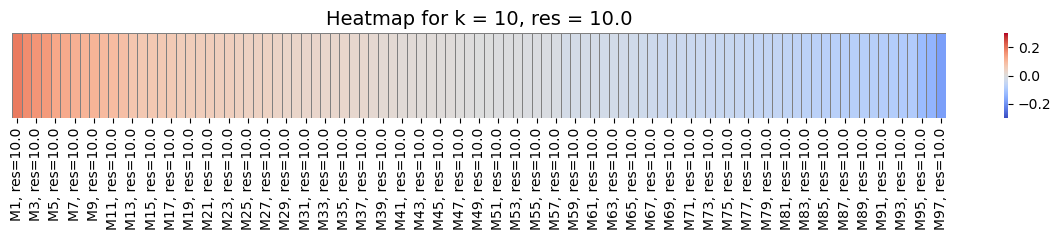

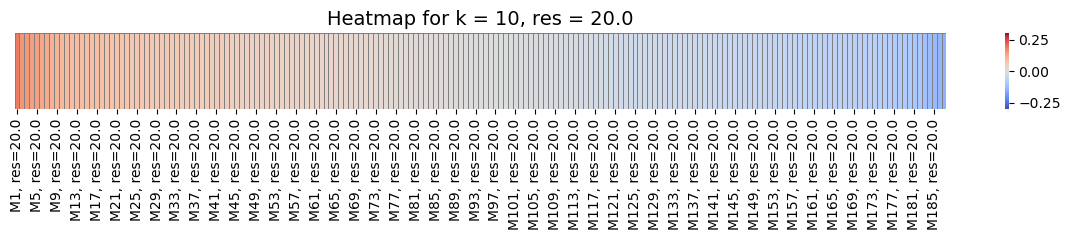

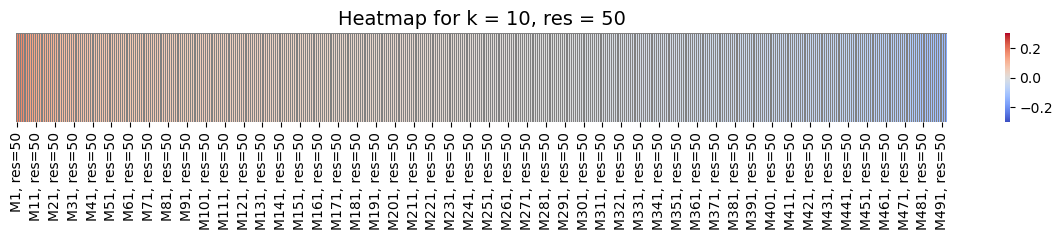

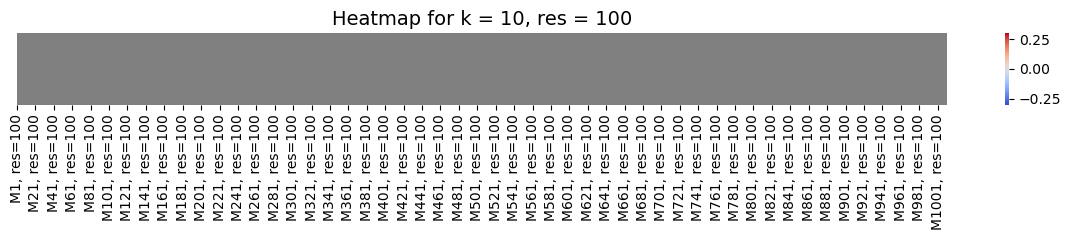

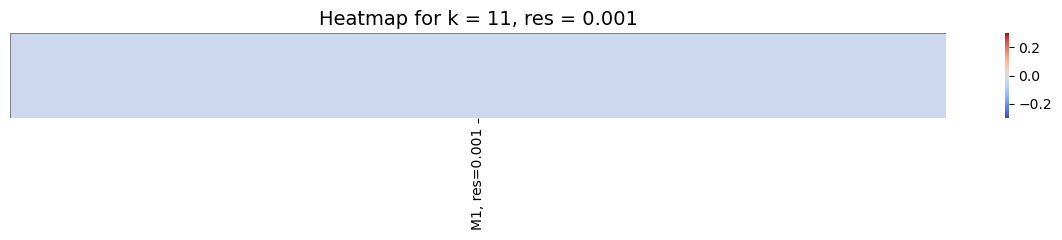

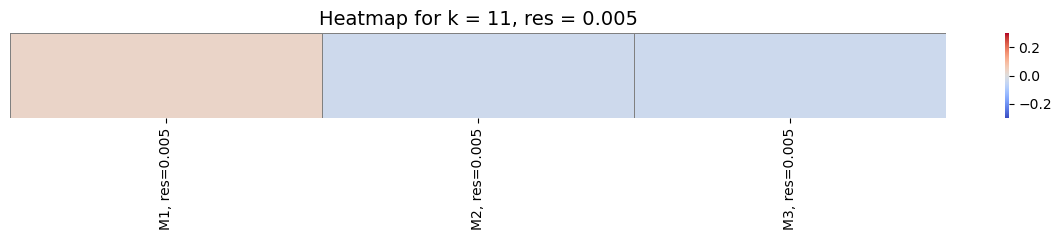

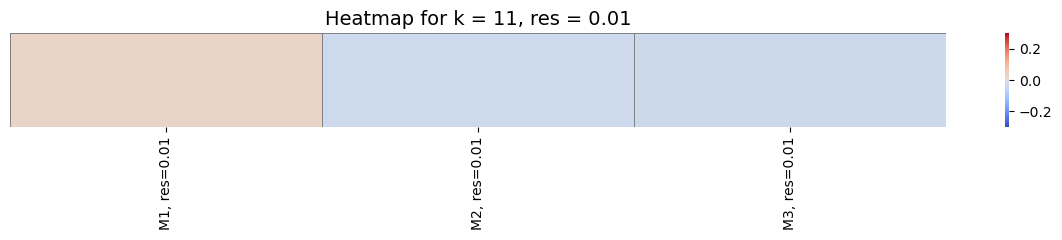

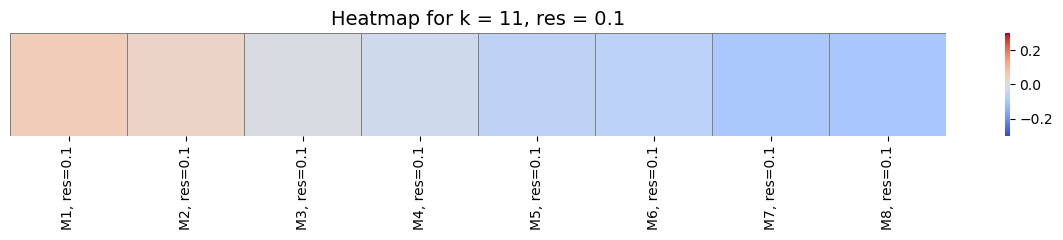

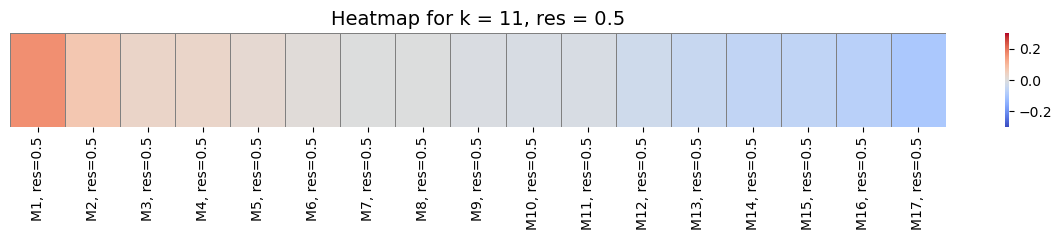

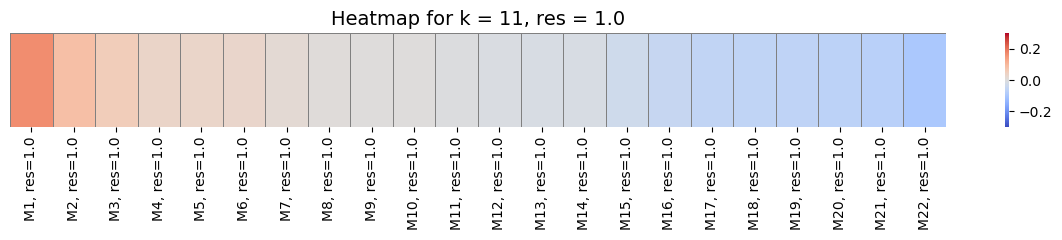

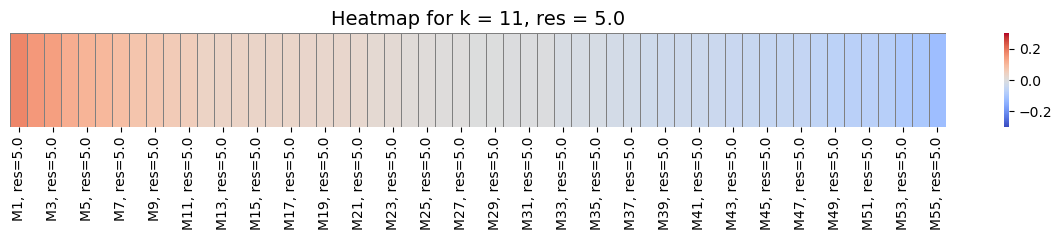

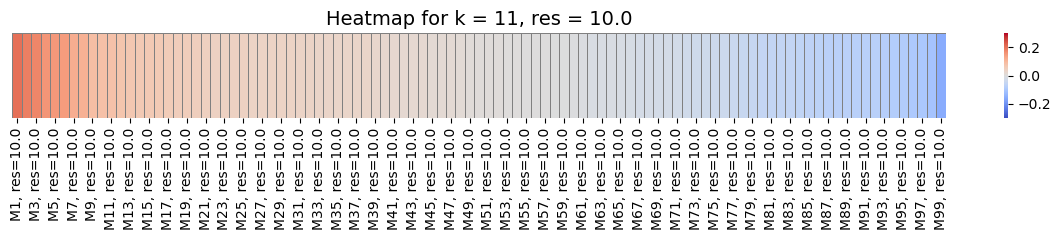

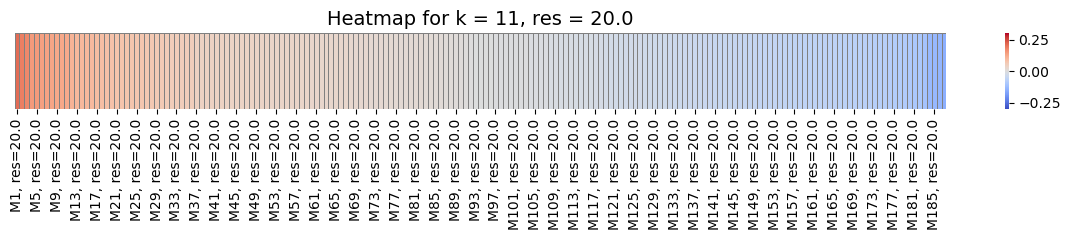

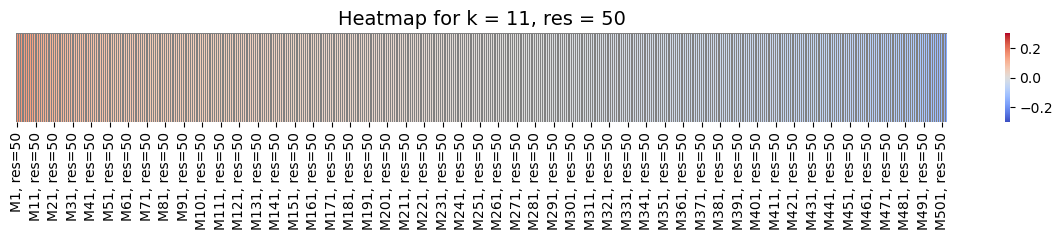

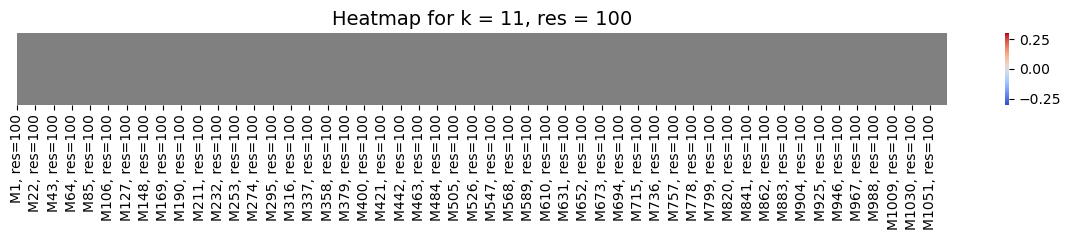

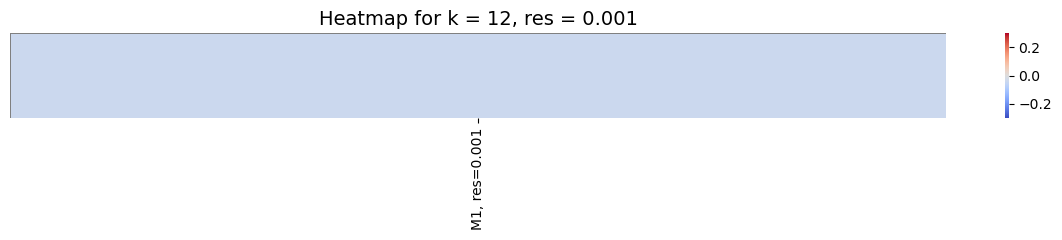

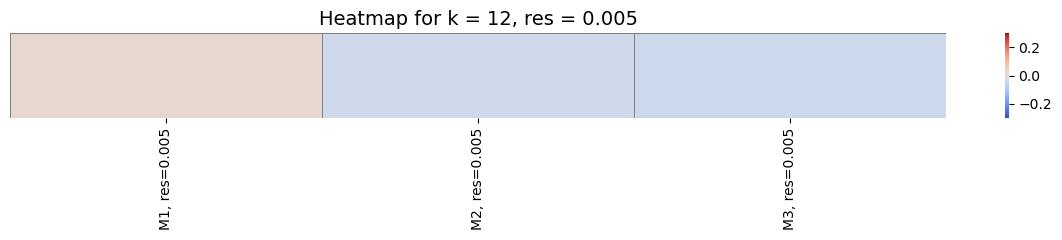

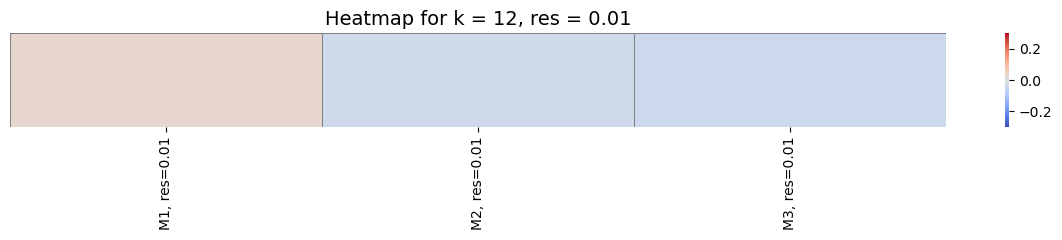

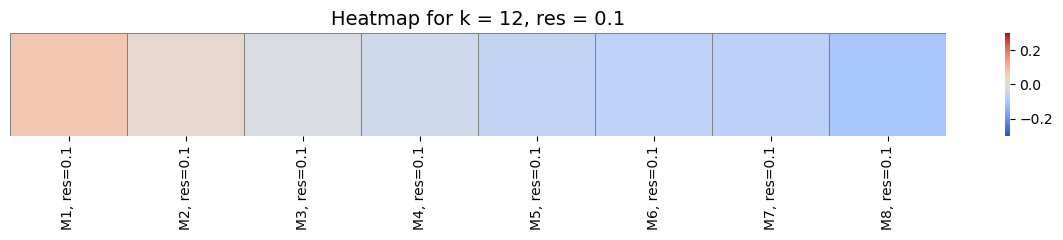

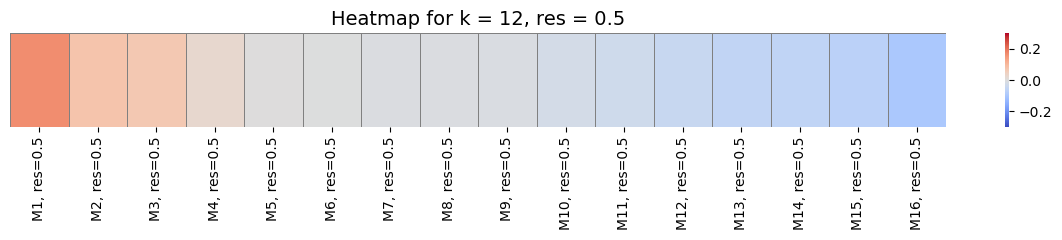

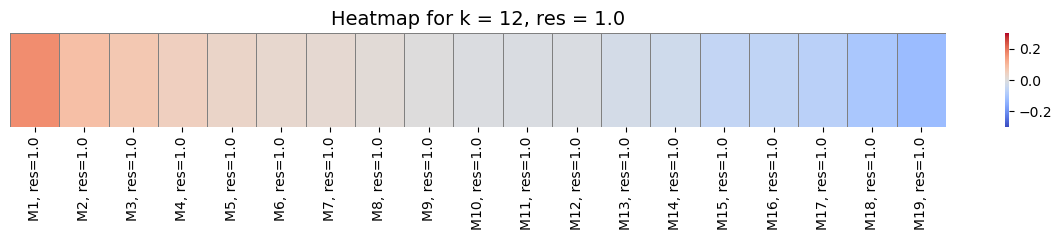

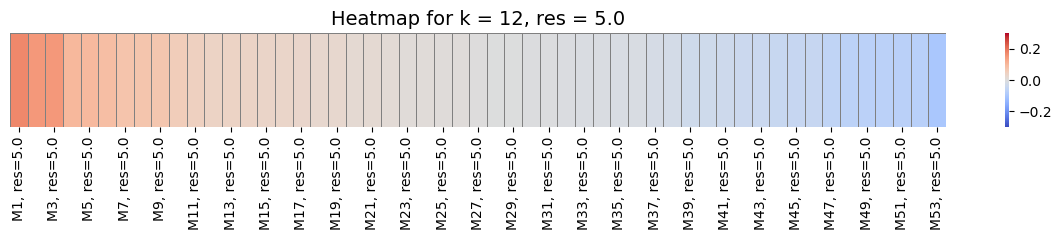

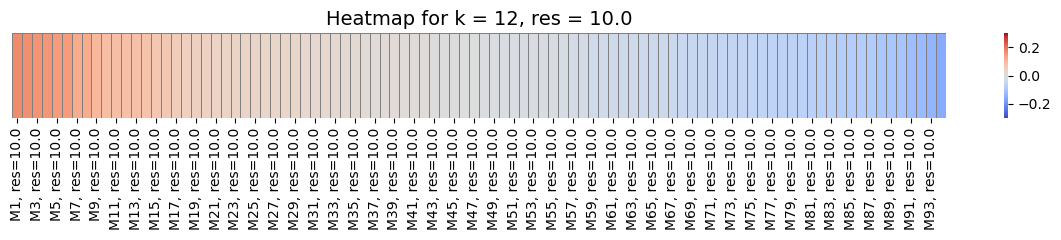

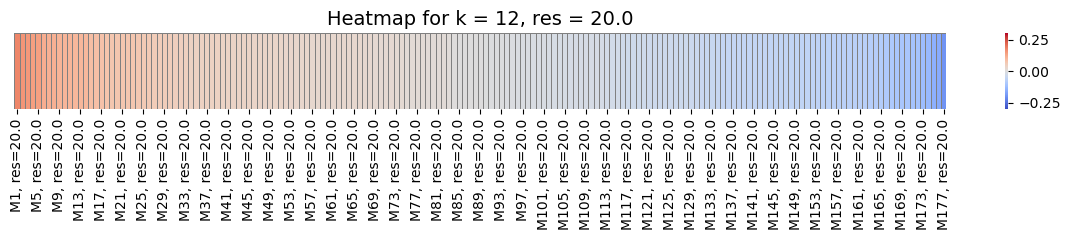

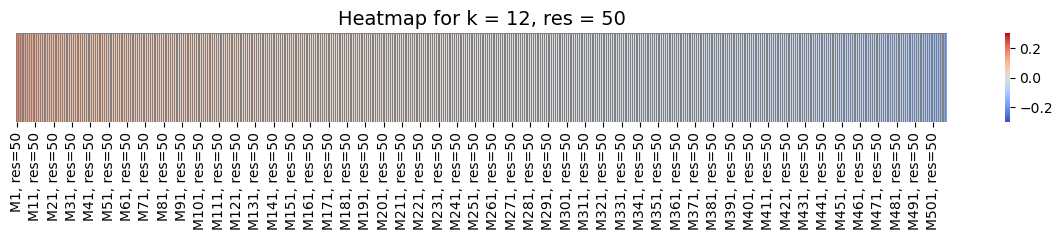

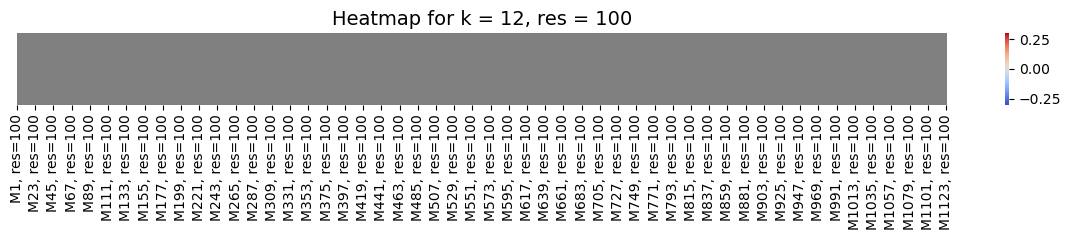

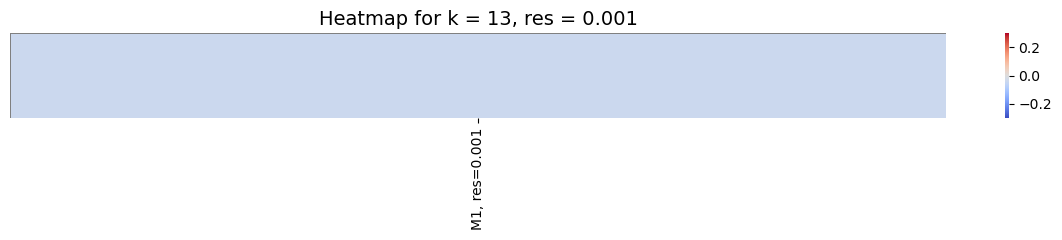

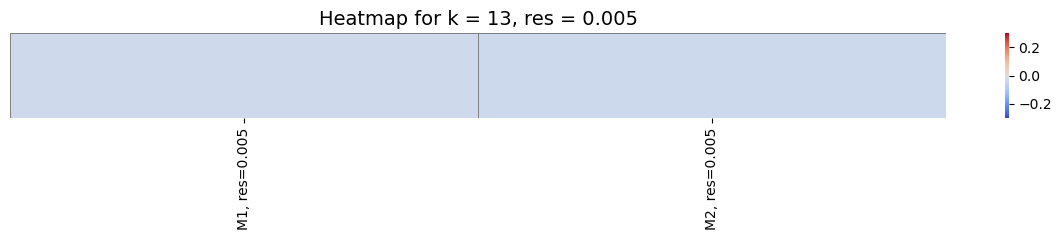

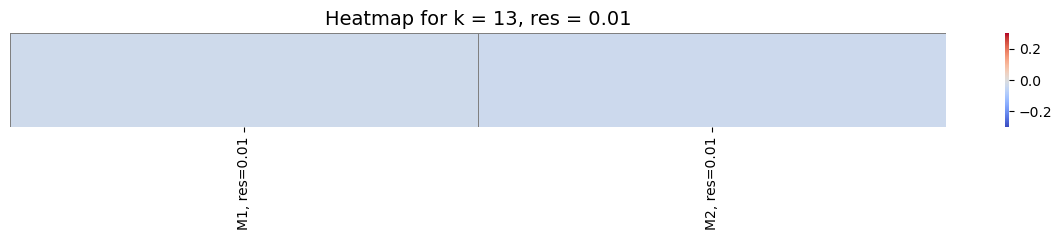

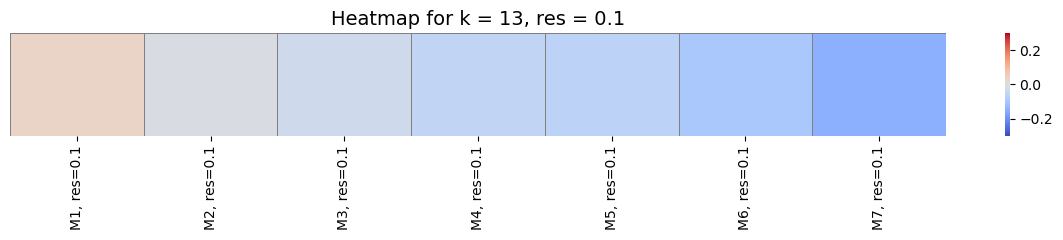

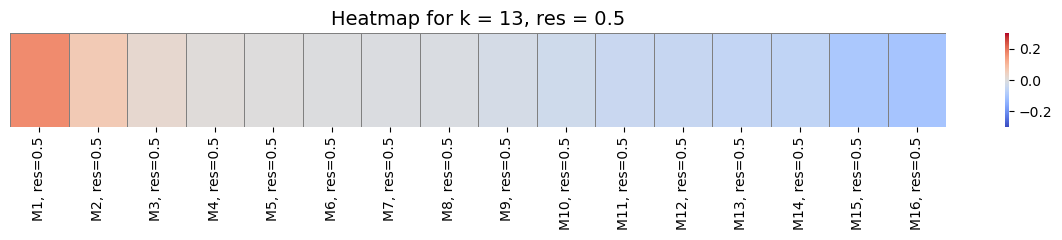

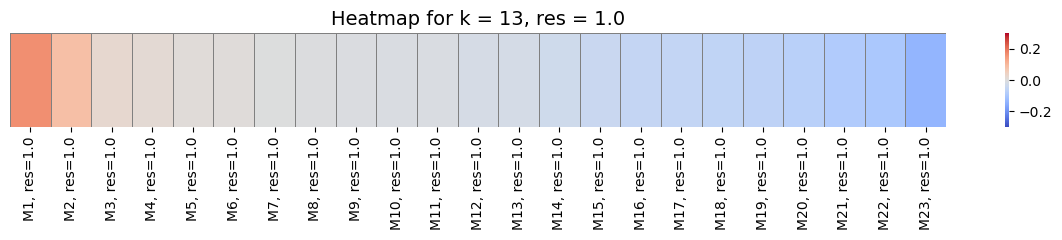

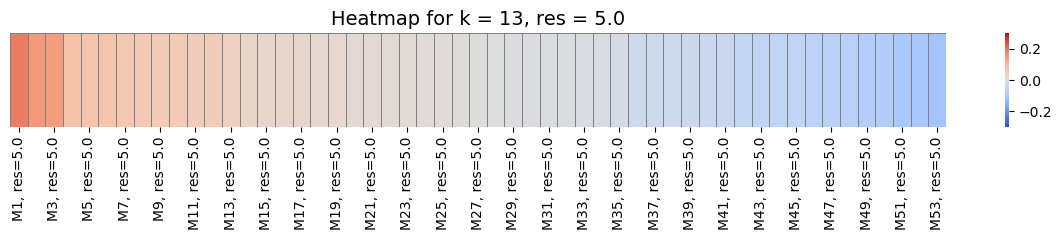

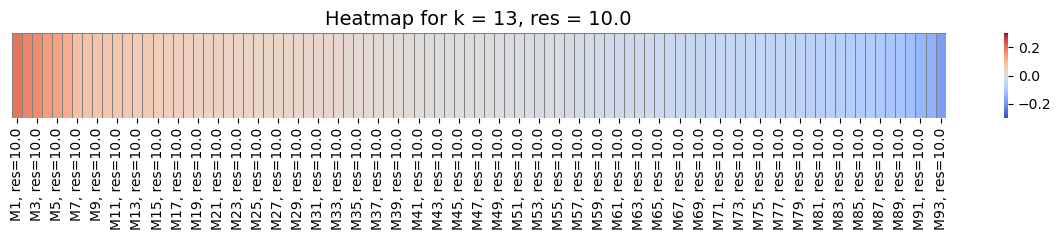

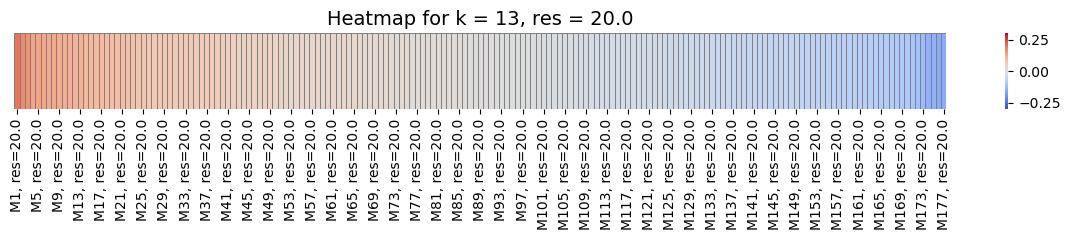

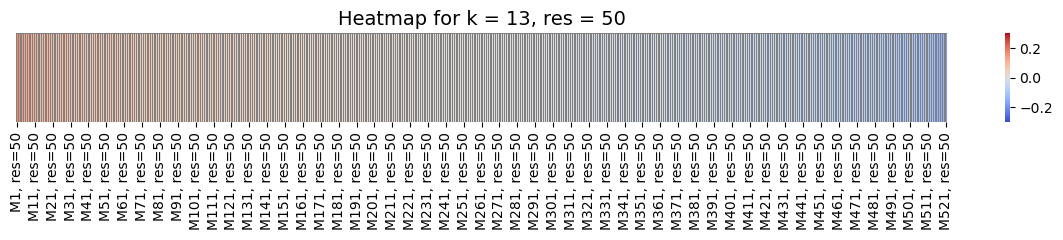

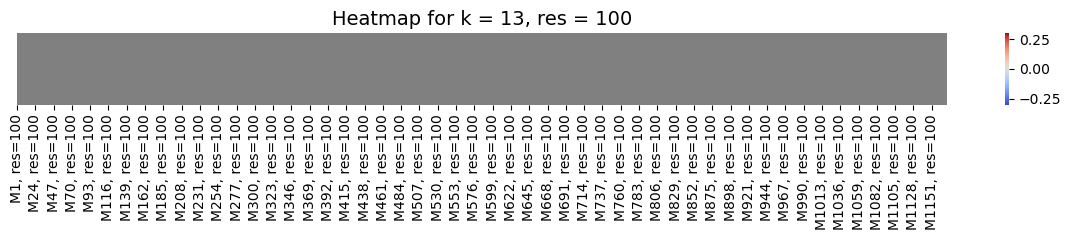

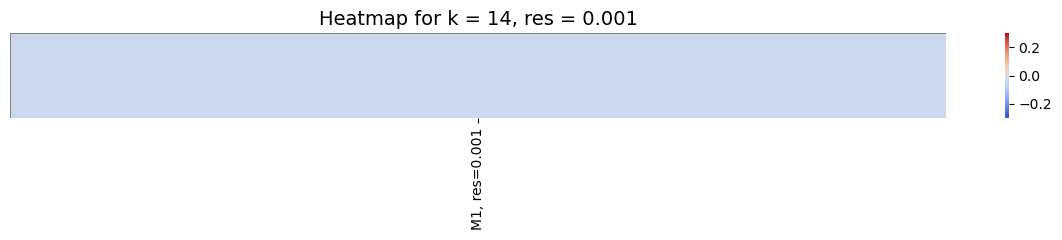

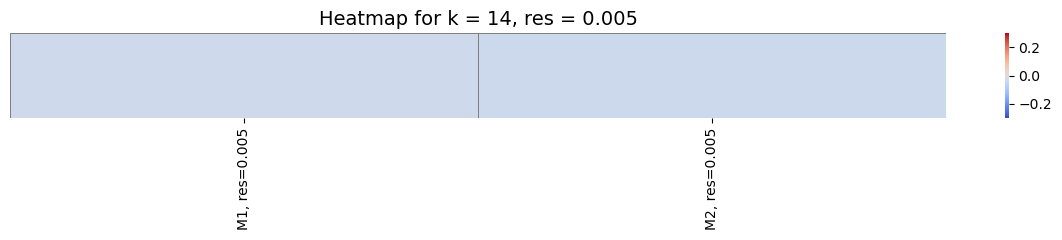

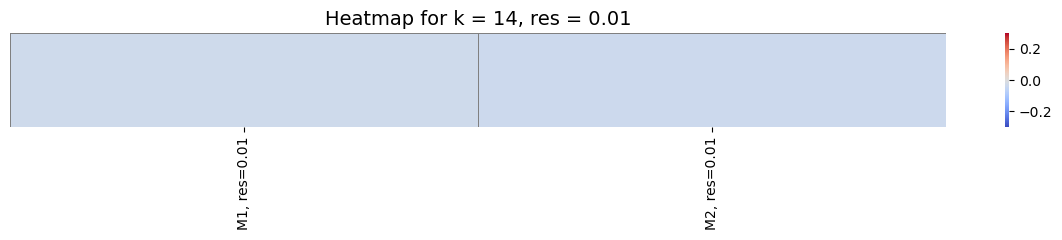

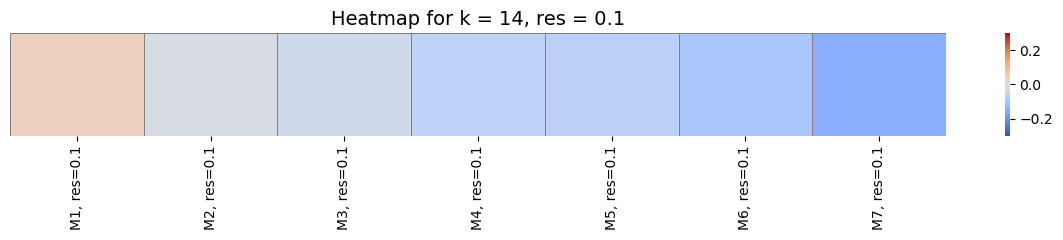

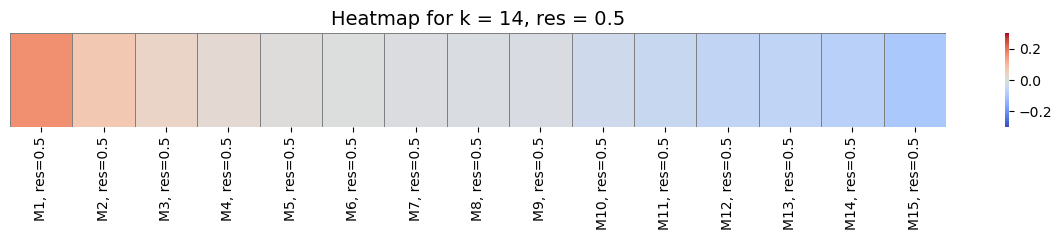

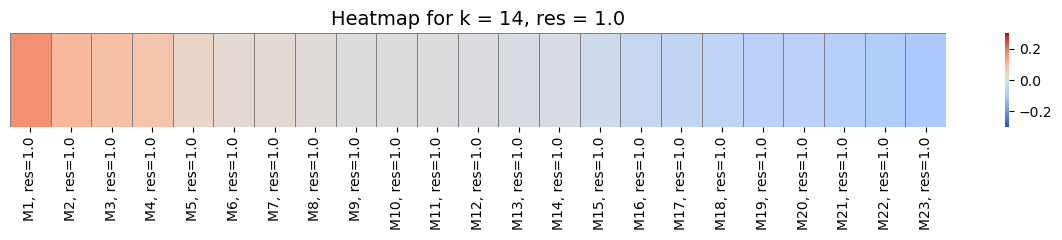

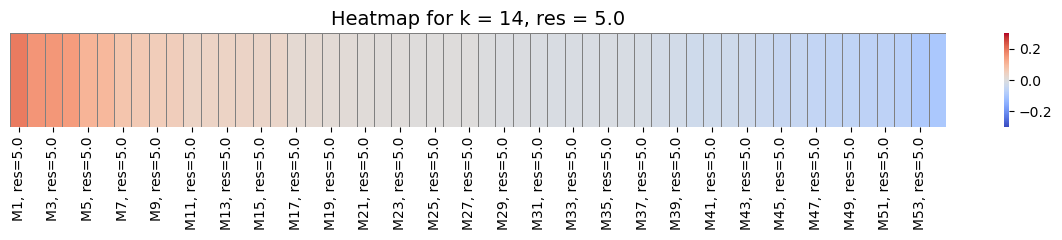

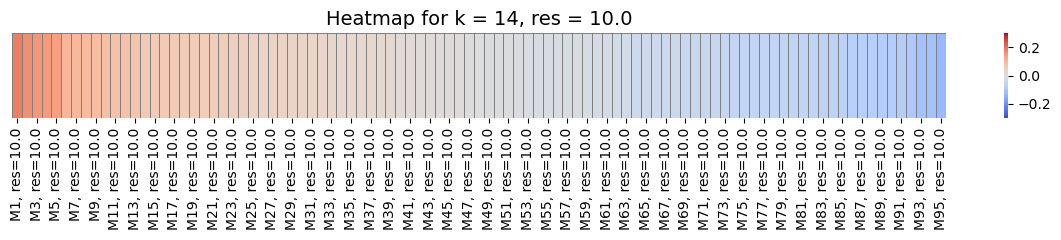

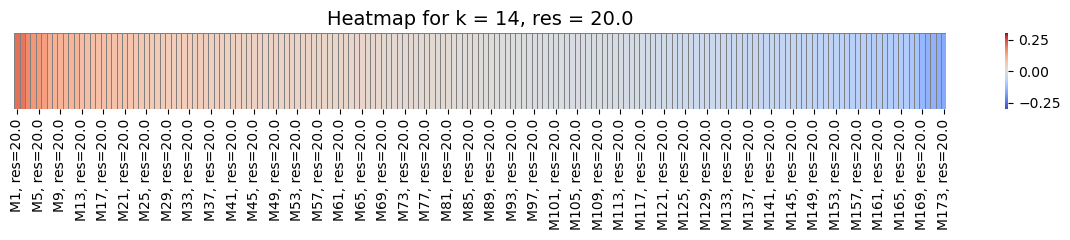

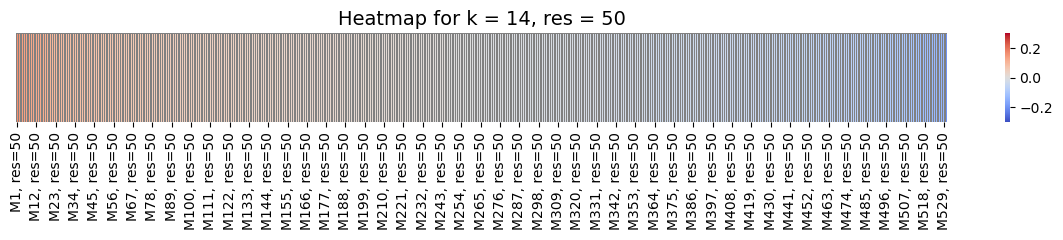

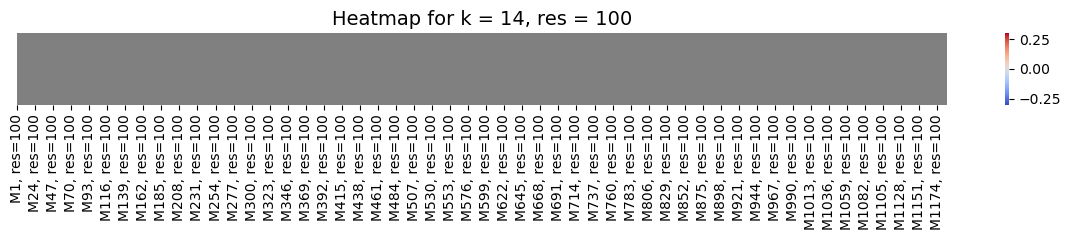

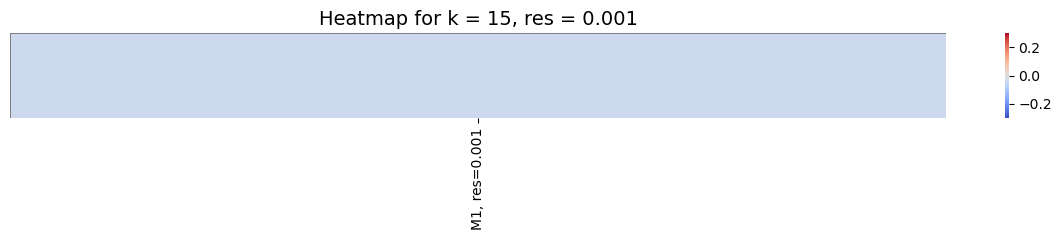

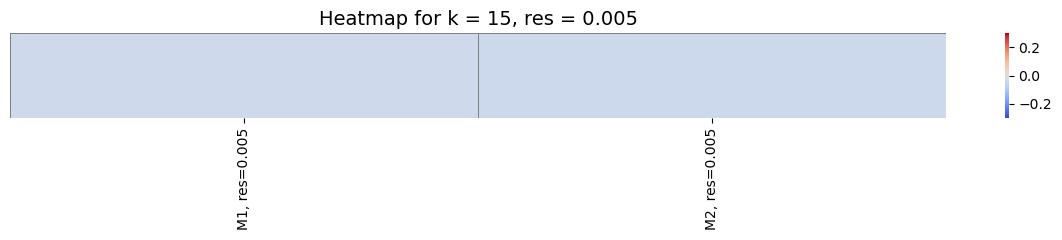

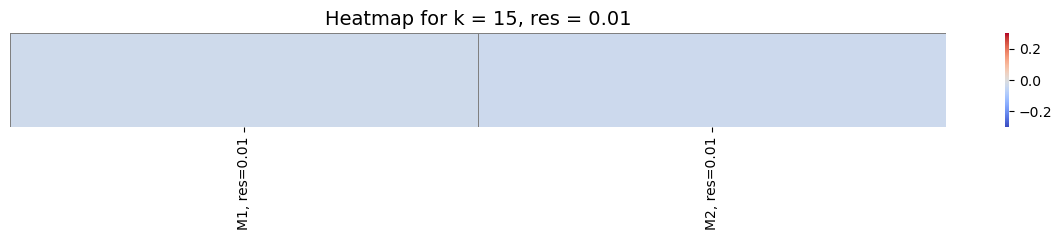

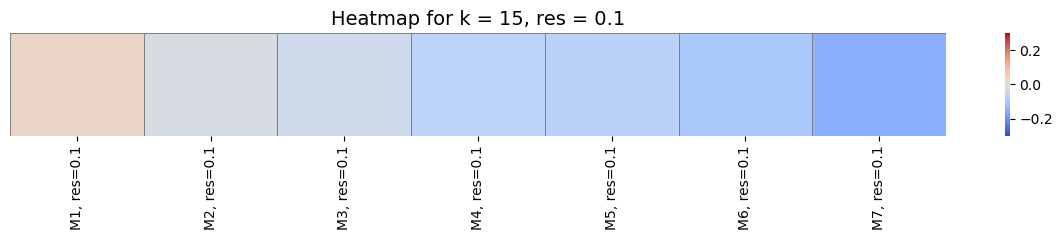

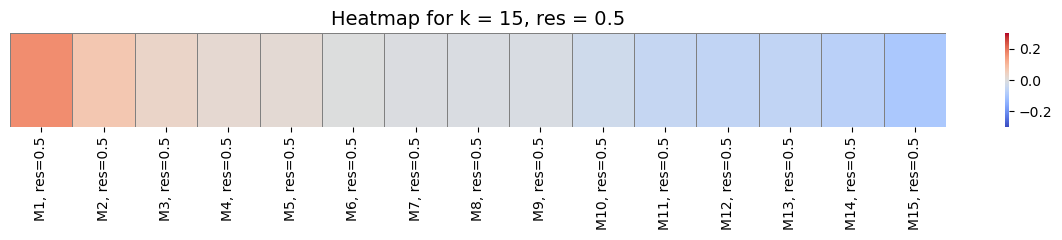

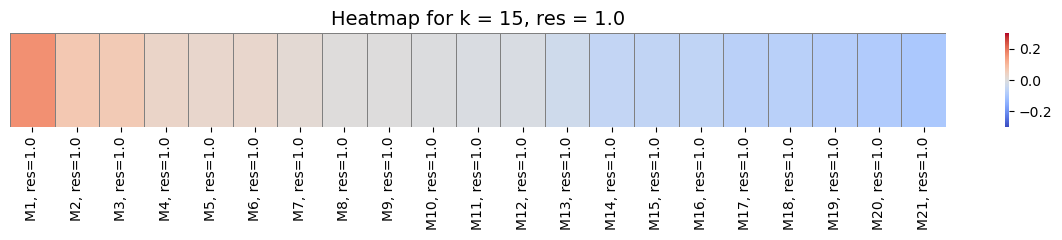

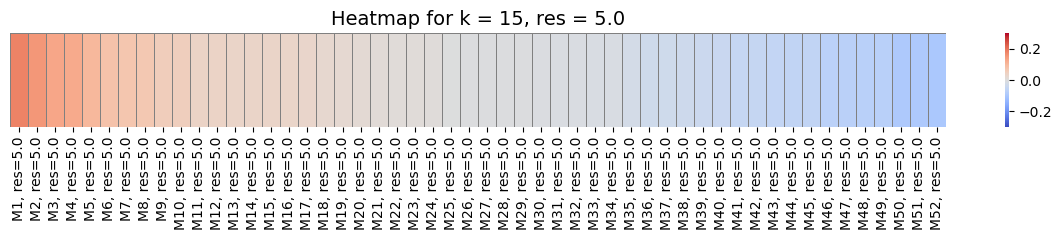

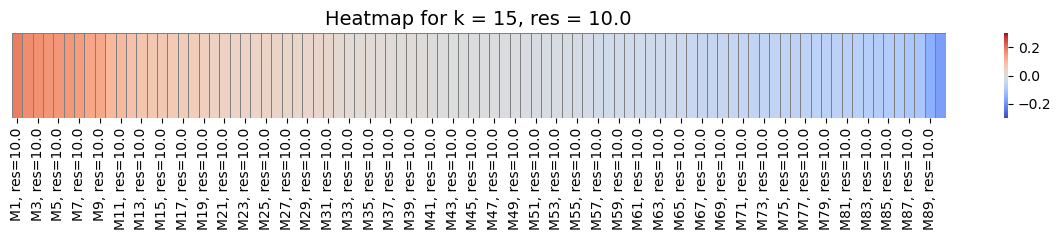

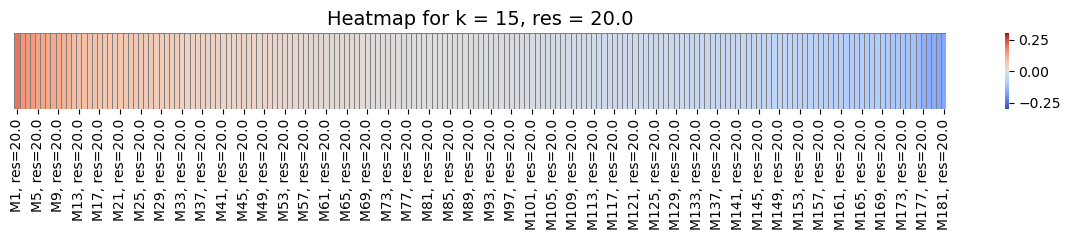

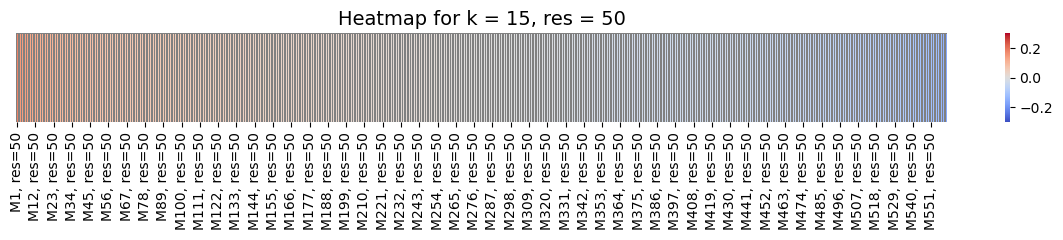

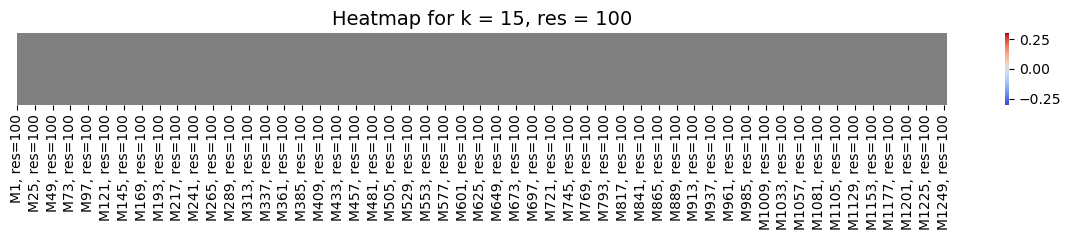

In [54]:
# Load and process the data
df_modules = pd.read_csv('Correlation_results/module_correlations_leiden_all.csv')
df_modules = df_modules.sort_values('correlation', ascending=False)
df_modules['cluster_l'] = df_modules['cluster'].apply(lambda x: ast.literal_eval(x))
df_modules['k'] = df_modules['network'].str.extract(r'knn_(\d+)', expand=False).astype(int)

ks = range(4, 16)
resolutions = [0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 50, 100]

# Loop through each combination and plot
for k in ks:
    for res in resolutions:
        subset = df_modules[
            (df_modules['k'] == k) &
            (df_modules['resolution'] == res) &
            (df_modules['network'] == f'knn_{k}') &
            (df_modules['method'] == 'leiden_weighted')].copy()

        subset = subset.reset_index(drop=True)
        subset['module_name'] = ['M' + str(i + 1) for i in range(len(subset))]
        subset['module_label'] = subset['module_name'] + f', res={res}'

        # Prepare data for heatmap
        plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)

        # Plot
        plt.figure(figsize=(12, 2.5))
        sns.heatmap(plot_df,
            cmap='coolwarm',
            cbar=True,
            vmin=-0.3, vmax=0.3,
            linewidths=0.5,
            linecolor='gray',
            #annot=True,
            #fmt=".2f")
        )

        plt.title(f'Heatmap for k = {k}, res = {res}', fontsize=14)
        plt.yticks([])
        plt.xticks(rotation=90)
        plt.xlabel('')
        plt.tight_layout()
        plt.show()
